E-Commerce: Product Range Analysis

**Task:**

****Analyze the store's product range.

- Carry out exploratory data analysis
- Analyze the product range
- Formulate and test statistical hypotheses

**Description of the data:**

The dataset contains the transaction history of an online store that sells household goods.

The file `ecommerce_dataset_us.csv` contains the following columns:

`InvoiceNo` — order identifier

`StockCode` — item identifier

`Description` — item name

`Quantity`

`InvoiceDate` — order date

`UnitPrice` — price per item

`CustomerID`


   * Who is our internal customer?
project managers who are responsible for the relevance of the product range

   * Why do they need that?
they want to determine which products are included in the main and additional assortment in order to competently offer additional products to buyers and optimize purchases (there is no point in purchasing a lot of additional products when the main product is not available)
Classifying or categorization can be one of the options for that




Submitting the Project:

Your project will have three components:
1. A notebook containing your code (.ipynb)
2. A presentation (.pdf)
3. A link to your dashboard on Tableau Public (dashboard.txt) (optional)

Make sure the solution is complete and check that the code works in Jupyter before submitting it for review. 
Don't be surprised if you're asked to make some improvements.
Upload the archive to Google Drive and copy the shareable link to the beginning of your notebook.
If you're planning to make a dashboard later, tell your team leader when you submit the project for the first time. 
The project will be accepted only after you submit your dashboard.
Good luck!



some of the source link: 
http://brandonrose.org/clustering
http://datanongrata.com/2019/04/27/67/
https://realpython.com/k-means-clustering-python/
http://datanongrata.com/2019/04/27/67/
https://medium.com/ssense-tech/unsupervised-product-clustering-exploring-the-cold-start-problem-8053ef04bac9
https://medium.com/web-mining-is688-spring-2021/using-k-means-to-segment-customers-based-on-rfm-variables-9d4d683688c8
https://towardsdatascience.com/rfm-segmentation-using-quartiles-and-jenks-natural-breaks-924f4d8baee1
https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/
https://www.nextlytics.com/blog/machine-learning-in-customer-segmentation-with-rfm-analysis


# Table of Contents:

<div style="height:10px;"></div>

1. [Data Overview and Preprocessing:](#-Preprocessing)
   * [Download the data, Renaming Column Names, Adding necessary column and Study the general information (using info(), describe..)](#-info)
   * [Check for missing values, duplicated rows and other abnormal data (such as: zero and negative values) and choose appropriate ways to deal with them. Chande data type if needed](#-missing)
   * [Study the distribution and dispertion (outliers)](#-dist)
   * [Trying to find color and size traits out of product names](#-color)


<div style="height:5px;"></div>

2. [Product Description Analysis:](#-Analysis)
   * [Create a corpus out of product descriptions.](#-corpus)
   * [Clean up the corpus and removed stopwords etc,Eliminate grammatical variations via stemming](#-clean)
   * [Create a Term-Frequency Inverse Document Frequency (TF-IDF) matrix.](#-tfidf)
   * [Clculate from the TF-IDF the corpus distance matrix comparing the relative similarity.](#-distance)
   * [Use the distance matrix to build a dendrogram from which the number of clusters will be detrmined](#-dendrogram)
   * [Using Kmean to form the clusters](#-kmeans)
   * [Study the term frequencies for each cluster.](#-terms_freq)
   * [Based on the term frequencies, identify product category keywords for each cluster.](#-keywords)
   * [Categorizing the products in the store differently in order to get result that enable better understanding of product range.](#-categorization)
   * [Calculating monthly revenue and monthly cumulating revenue to detect the trend](#-revenue) 
   * [Splitting products by category and finding: 1. the leading categories regarding the number of items in each category 2. the leading categories in sales](#-split)
   * [Finding the top ten selling products](#-selling)
   * [Examining Refunds: by total amount and by frequency](#-refunds)

   
    
<div style="height:5px;"></div>

3. [Product Bundle(Basket) Analysis and Recommender System:](#-recommender)
   * [Create a basket for each transaction (invoice) and study the popullarity for products to appear (in any transaction/invoice) as well as for their different combinations by using Apriori Algorithm](#-basket)
   * [Calculate other Basket metrics using association_rule method in order to realize how to expand sails in the basket level by recommending additional products](#-additional)
   * [Studying product similarities in order to realize how to mantain and increase profits (in a basket level) by recommanding sustitutional/interchangable products](#-interchangable)


<div style="height:5px;"></div> 

4. [Product Market Values Analysis:](#-market)
   * [Calculate product recency-frequency-monetary (RFM Metrics)](#-rfm)
   * [Study product RFM distributions (in order to determine the segmentation split)](#-split)
   * [Categorize products based on K-MEANS](#-categorize)
   * [Charactarize the product clusters based on R, F and M scores](#-RFM_scores)
 
   
<div style="height:10px;"></div>


5. [Conclusions and Suggestions:](#-conclusions)
 
<div style="height:10px;"></div>

<b id="-Preprocessing">

## Data Overview and Preprocessing:

* Download the data, Renaming Column Names, Adding necessary columns and  Study the general information (using info(), describe..)  
* Check for missing values, duplicated rows and other abnormal data (such as: zero and negative values) and choose appropriate ways to deal with them. Chande data type if needed.
* Study the distribution and dispertion (outliers)
* Trying to find color and size traits out of product names

In [1]:
# Downdload libraries:
# delete dup import: !! 

# get all imports at the top of the project (in one cell) for more comfort and readability
! pip install sidetable
! pip install plotly -U
! pip install altair -U
#! pip install usaddress
! pip install -U kaleido
# ! pip install -m nltk.downloader stopwords
! pip install --user -U nltk

#nltk.download()
! pip install nltk
! pip install apyori
! pip install mlxtend
# rfm
!pip install -U scikit-learn 
# library for machine lerning

# library Roy added because he didn't have them
! pip install seaborn

In [2]:
# import libraries

#from __future__ import division
import re
import os
import codecs
import sys
import sidetable as stb
import numpy as np
import math as mth
import pandas as pd

import datetime as dt
from datetime import datetime,  timedelta

from textwrap import wrap
#import usaddress # ?
#import altair as alt

import plotly.offline as py
import plotly.offline as pyoff
import plotly as py
import plotly.graph_objects as go
from plotly import tools
import plotly.offline as py 
import plotly.express as px

#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # for features in linear regression to be standardized
 # metric for regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Use silhouette coefficient to determine the best number of clusters
from sklearn.metrics import silhouette_score
# RFM-segmentation using K-means
import sklearn.cluster
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage 
from scipy import stats as st
import scipy.stats as stats

#import mpld3

# crating distance matrix : use tf idf for clustering:
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer

from scipy.spatial.distance import pdist, squareform

import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
from pymystem3 import Mystem
from collections import Counter
#from nltk.tokenize import word_tokenize
#libraries for Apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Gome\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
# checking the data for missing values , their rashio ad other possible errors:
def preprocess_df(dataframe: pd.core.frame.DataFrame, title: str):
    print(f'df: {title}')
    # look at a random sample of the data and study the information given:
    display(dataframe.sample(10))
    print()
    dataframe.info(memory_usage='deep')
    print()
    display(dataframe.describe().T)# include ='all'
    display(dataframe.describe(include ='object').T)
    #display(dataframe.describe(include ='all').T)
    print()
    # Using sidetable method to look at the missing values per column, how many there are and their share (presentage).
    display(dataframe.stb.missing(style = True))
    print()
    print(f'There are {dataframe.duplicated().sum()} duplicated rows')
    print('\n'*2)
    for colname in dataframe.columns:
        print(f'column: {colname.upper()}')
        #print(f'The frequencies of unique values of column {colname.upper()} in descending order are:')
        #display(dataframe.stb.freq([colname], style = True, cum_cols = False))
        print(f'The unique values of column {colname.upper()} are:')
        display(dataframe[colname].unique())
        print(f'The number of NULL values in {colname} are:')
        display(dataframe[colname].isnull().sum())
        #print('share of missing values regarding their column' in order to figure out how significant their absence is for their category or column 
        print(f'Null values ratio: {round(dataframe[colname].isnull().sum() * 100 / len(dataframe[colname]),3)} %')
        if dataframe[colname].isnull().sum() > 0 :
            print(f'The rows with the missing values for {colname} column are the following:')
            display(dataframe[dataframe[colname].isnull()])
        display(dataframe[colname].describe(include ='all').to_frame().T)
        print('\n'*3)


<b id="-info"> 

### Download the data, Renaming Column Names, Adding necessary columns and Study the general information:

In [4]:
# read the file at the top of the page
try:
    df = pd.read_csv('ecommerce_dataset_us.csv' ,parse_dates=['InvoiceDate'], sep = '\t').copy() 
except:
    df = pd.read_csv('/datasets/ecommerce_dataset_us.csv', parse_dates=['InvoiceDate'], sep = '\t').copy() 

    
# Replace the column names (make them lowercase and add '_' between the words for a column name that consists more than one word):
df.columns = df.columns.str.replace('No','_no')
df.columns = df.columns.str.replace('Date','_datetime')
df.columns = df.columns.str.replace('Code','_code')
df.columns = df.columns.str.replace('Price','_price')
df.columns = df.columns.str.replace('ID','_id')
# Make all column names lowercase:
df.columns = df.columns.str.lower() 
# Make all description values lowecase
df['description'] = df['description'].str.lower() 

In [5]:
df['invoice_datetime'] = pd.to_datetime(df['invoice_datetime'])
#df['invoice_year_month'] = df['invoice_datetime'].map(lambda date: 100*date.year + date.month)
#df['date'] = df['invoice_datetime'].dt.strftime('%Y-%m')

df['invoice_period']= df['invoice_datetime'].apply(lambda x: x.strftime('%Y-%m'))

# Create seperate columns to date and time:
df['invoice_date']=pd.to_datetime(df['invoice_datetime']).dt.normalize()

# Adding another column for total order price: 
df['tot_order'] = df['quantity']*df['unit_price']

In [6]:
#df.rename(columns={"invoice_date": "invoice_dt"}, inplace = True)
preprocess_df(df, 'Ecommerce')

df: Ecommerce


invoice_no stock_code                          description  quantity  \
486556     577740      22577  wooden heart christmas scandinavian        10   
270758     560584      47566                        party bunting         1   
222353     556419      22595             gingham heart decoration        12   
397284     571158      21901                 key fob , back door          2   
478570     577093      23199                     jumbo bag apples        10   
235628     557644      35653                vintage bead notebook         3   
142182     548558      22957  set 3 paper vintage chick paper egg         6   
354781     567899      21975       pack of 60 dinosaur cake cases        24   
15985      537642        DOT                       dotcom postage         1   
247171     558757      35648             vintage bead pink purse          2   

          invoice_datetime  unit_price  customer_id invoice_period  \
486556 2019-11-19 13:36:00        0.29      17625.0        2019-11   
270758 2019-07-17 15:38:00        4.95      13827.0        2019-07   
222353 2019-06-08 12:30:00        0.85      15411.0        2019-06   
397284 2019-10-12 10:25:00        0.65      14606.0        2019-10   
478570 2019-11-15 16:37:00        2.08      13089.0        2019-11   
235628 2019-06-19 17:06:00        2.46          NaN        2019-06   
142182 2019-03-30 10:05:00        2.95      13626.0        2019-03   
354781 2019-09-20 16:26:00        0.55      14911.0        2019-09   
15985  2018-12-05 15:33:00      448.00          NaN        2018-12   
247171 2019-07-01 12:22:00        0.83      13148.0        2019-07   

       invoice_date  tot_order  
486556   2019-11-19       2.90  
270758   2019-07-17       4.95  
222353   2019-06-08      10.20  
397284   2019-10-12       1.30  
478570   2019-11-15      20.80  
235628   2019-06-19       7.38  
142182   2019-03-30      17.70  
354781   2019-09-20      13.20  
15985    2018-12-05     448.00  
247171   2019-07-01       1.66


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   invoice_no        541909 non-null  object        
 1   stock_code        541909 non-null  object        
 2   description       540455 non-null  object        
 3   quantity          541909 non-null  int64         
 4   invoice_datetime  541909 non-null  datetime64[ns]
 5   unit_price        541909 non-null  float64       
 6   customer_id       406829 non-null  float64       
 7   invoice_period    541909 non-null  object        
 8   invoice_date      541909 non-null  datetime64[ns]
 9   tot_order         541909 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 165.7 MB



count          mean          std        min       25%  \
quantity     541909.0      9.552250   218.081158  -80995.00      1.00   
unit_price   541909.0      4.611114    96.759853  -11062.06      1.25   
customer_id  406829.0  15287.690570  1713.600303   12346.00  13953.00   
tot_order    541909.0     17.987795   378.810824 -168469.60      3.40   

                  50%       75%       max  
quantity         3.00     10.00   80995.0  
unit_price       2.08      4.13   38970.0  
customer_id  15152.00  16791.00   18287.0  
tot_order        9.75     17.40  168469.6

count unique                                 top   freq
invoice_no      541909  25900                              573585   1114
stock_code      541909   4070                              85123A   2313
description     540455   4206  white hanging heart t-light holder   2369
invoice_period  541909     14                             2019-11  86074


There are 5268 duplicated rows



column: INVOICE_NO
The unique values of column INVOICE_NO are:


array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

The number of NULL values in invoice_no are:


0

Null values ratio: 0.0 %


count unique     top  freq
invoice_no  541909  25900  573585  1114





column: STOCK_CODE
The unique values of column STOCK_CODE are:


array(['85123A', '71053', '84406B', ..., '90214U', '47591b', '23843'],
      dtype=object)

The number of NULL values in stock_code are:


0

Null values ratio: 0.0 %


count unique     top  freq
stock_code  541909   4070  85123A  2313





column: DESCRIPTION
The unique values of column DESCRIPTION are:


array(['white hanging heart t-light holder', 'white metal lantern',
       'cream cupid hearts coat hanger', ..., 'lost',
       'cream hanging heart t-light holder',
       'paper craft , little birdie'], dtype=object)

The number of NULL values in description are:


1454

Null values ratio: 0.268 %
The rows with the missing values for description column are the following:


invoice_no stock_code description  quantity    invoice_datetime  \
622        536414      22139         NaN        56 2018-11-29 11:52:00   
1970       536545      21134         NaN         1 2018-11-29 14:32:00   
1971       536546      22145         NaN         1 2018-11-29 14:33:00   
1972       536547      37509         NaN         1 2018-11-29 14:33:00   
1987       536549     85226A         NaN         1 2018-11-29 14:34:00   
...           ...        ...         ...       ...                 ...   
535322     581199      84581         NaN        -2 2019-12-05 18:26:00   
535326     581203      23406         NaN        15 2019-12-05 18:31:00   
535332     581209      21620         NaN         6 2019-12-05 18:35:00   
536981     581234      72817         NaN        27 2019-12-06 10:33:00   
538554     581408      85175         NaN        20 2019-12-06 14:06:00   

        unit_price  customer_id invoice_period invoice_date  tot_order  
622            0.0          NaN        2018-11   2018-11-29        0.0  
1970           0.0          NaN        2018-11   2018-11-29        0.0  
1971           0.0          NaN        2018-11   2018-11-29        0.0  
1972           0.0          NaN        2018-11   2018-11-29        0.0  
1987           0.0          NaN        2018-11   2018-11-29        0.0  
...            ...          ...            ...          ...        ...  
535322         0.0          NaN        2019-12   2019-12-05       -0.0  
535326         0.0          NaN        2019-12   2019-12-05        0.0  
535332         0.0          NaN        2019-12   2019-12-05        0.0  
536981         0.0          NaN        2019-12   2019-12-06        0.0  
538554         0.0          NaN        2019-12   2019-12-06        0.0  

[1454 rows x 10 columns]

count unique                                 top  freq
description  540455   4206  white hanging heart t-light holder  2369





column: QUANTITY
The unique values of column QUANTITY are:


array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

The number of NULL values in quantity are:


0

Null values ratio: 0.0 %


count     mean         std      min  25%  50%   75%      max
quantity  541909.0  9.55225  218.081158 -80995.0  1.0  3.0  10.0  80995.0





column: INVOICE_DATETIME
The unique values of column INVOICE_DATETIME are:


array(['2018-11-29T08:26:00.000000000', '2018-11-29T08:28:00.000000000',
       '2018-11-29T08:34:00.000000000', ...,
       '2019-12-07T12:31:00.000000000', '2019-12-07T12:49:00.000000000',
       '2019-12-07T12:50:00.000000000'], dtype='datetime64[ns]')

The number of NULL values in invoice_datetime are:


0

Null values ratio: 0.0 %


count unique                 top  freq               first  \
invoice_datetime  541909  23260 2019-10-29 14:41:00  1114 2018-11-29 08:26:00   

                                last  
invoice_datetime 2019-12-07 12:50:00





column: UNIT_PRICE
The unique values of column UNIT_PRICE are:


array([   2.55,    3.39,    2.75, ...,  933.17, 1714.17,  224.69])

The number of NULL values in unit_price are:


0

Null values ratio: 0.0 %


count      mean        std       min   25%   50%   75%      max
unit_price  541909.0  4.611114  96.759853 -11062.06  1.25  2.08  4.13  38970.0





column: CUSTOMER_ID
The unique values of column CUSTOMER_ID are:


array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

The number of NULL values in customer_id are:


135080

Null values ratio: 24.927 %
The rows with the missing values for customer_id column are the following:


invoice_no stock_code                      description  quantity  \
622        536414      22139                              NaN        56   
1443       536544      21773  decorative rose bathroom bottle         1   
1444       536544      21774  decorative cats bathroom bottle         2   
1445       536544      21786               polkadot rain hat          4   
1446       536544      21787            rain poncho retrospot         2   
...           ...        ...                              ...       ...   
541536     581498     85099B          jumbo bag red retrospot         5   
541537     581498     85099C   jumbo  bag baroque black white         4   
541538     581498      85150    ladies & gentlemen metal sign         1   
541539     581498      85174                s/4 cacti candles         1   
541540     581498        DOT                   dotcom postage         1   

          invoice_datetime  unit_price  customer_id invoice_period  \
622    2018-11-29 11:52:00        0.00          NaN        2018-11   
1443   2018-11-29 14:32:00        2.51          NaN        2018-11   
1444   2018-11-29 14:32:00        2.51          NaN        2018-11   
1445   2018-11-29 14:32:00        0.85          NaN        2018-11   
1446   2018-11-29 14:32:00        1.66          NaN        2018-11   
...                    ...         ...          ...            ...   
541536 2019-12-07 10:26:00        4.13          NaN        2019-12   
541537 2019-12-07 10:26:00        4.13          NaN        2019-12   
541538 2019-12-07 10:26:00        4.96          NaN        2019-12   
541539 2019-12-07 10:26:00       10.79          NaN        2019-12   
541540 2019-12-07 10:26:00     1714.17          NaN        2019-12   

       invoice_date  tot_order  
622      2018-11-29       0.00  
1443     2018-11-29       2.51  
1444     2018-11-29       5.02  
1445     2018-11-29       3.40  
1446     2018-11-29       3.32  
...             ...        ...  
541536   2019-12-07      20.65  
541537   2019-12-07      16.52  
541538   2019-12-07       4.96  
541539   2019-12-07      10.79  
541540   2019-12-07    1714.17  

[135080 rows x 10 columns]

count         mean          std      min      25%      50%  \
customer_id  406829.0  15287.69057  1713.600303  12346.0  13953.0  15152.0   

                 75%      max  
customer_id  16791.0  18287.0





column: INVOICE_PERIOD
The unique values of column INVOICE_PERIOD are:


array(['2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04',
       '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10',
       '2019-11', '2019-12'], dtype=object)

The number of NULL values in invoice_period are:


0

Null values ratio: 0.0 %


count unique      top   freq
invoice_period  541909     14  2019-11  86074





column: INVOICE_DATE
The unique values of column INVOICE_DATE are:


array(['2018-11-29T00:00:00.000000000', '2018-11-30T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-03T00:00:00.000000000',
       '2018-12-04T00:00:00.000000000', '2018-12-05T00:00:00.000000000',
       '2018-12-06T00:00:00.000000000', '2018-12-07T00:00:00.000000000',
       '2018-12-08T00:00:00.000000000', '2018-12-10T00:00:00.000000000',
       '2018-12-11T00:00:00.000000000', '2018-12-12T00:00:00.000000000',
       '2018-12-13T00:00:00.000000000', '2018-12-14T00:00:00.000000000',
       '2018-12-15T00:00:00.000000000', '2018-12-17T00:00:00.000000000',
       '2018-12-18T00:00:00.000000000', '2018-12-19T00:00:00.000000000',
       '2018-12-20T00:00:00.000000000', '2018-12-21T00:00:00.000000000',
       '2019-01-02T00:00:00.000000000', '2019-01-03T00:00:00.000000000',
       '2019-01-04T00:00:00.000000000', '2019-01-05T00:00:00.000000000',
       '2019-01-07T00:00:00.000000000', '2019-01-08T00:00:00.000000000',
       '2019-01-09T00:00:00.000000000', '2019-01-10

The number of NULL values in invoice_date are:


0

Null values ratio: 0.0 %


count unique        top  freq      first       last
invoice_date  541909    305 2019-12-03  5331 2018-11-29 2019-12-07





column: TOT_ORDER
The unique values of column TOT_ORDER are:


array([ 15.3 ,  20.34,  22.  , ...,  25.08, 469.44,  66.36])

The number of NULL values in tot_order are:


0

Null values ratio: 0.0 %


count       mean         std       min  25%   50%   75%  \
tot_order  541909.0  17.987795  378.810824 -168469.6  3.4  9.75  17.4   

                max  
tot_order  168469.6

Conclusions:

From the info() method it's turned out that 541,909 rows and 7 columns.
There are 135,080 missing values in 'CustomerID' column, which representing 24.93% of the data and 1,454 missing values in 'Description' column representing 0.27% of the data. 
There are none missing values in other columns. 


Note: As for this project, regarging product analysis the information about 'customer_id' is irrelevant (due to thr fact that the products and not the customers are under examination. 
That's why , while it is indeed important to inform the managers in charge (and the stuff) about it in order to figure out its source, it can be ignored. There is no reason to delete those rows or think of the probber technique how to deal whith them.
As for the missing values in 'description' column - they can be omitted (deleted) since their share is minor. (0.27%)

There are 5268 duplicated rows. 


Data Types:
invoice_no, stock_code and description are of object type, unit_price and customer_id are floats, invoice_datetime is datetime and quantity is an int.  

       
The file columns contain the following information:
   * 'invoice_no' — order identifier
   * 'stock_code' — item identifier
   * 'description' — item name 
   * 'quantity' — 
   * 'invoice_datetime' — order date
   * 'unit_price' - price per item
   * 'customer_id' - customer identifier


Appearantly, 'white hanging heart t-light holder' is the most popular product among 4206 unique ones, with frequency of 2369 units. 

Quantity has negative and extreme (low and high) values that will be considered later on. unit_price also has the similar problem and will be treated as well. 

Invoice datetime lasts from 2018-11-29 untill 2019-12-07 so that invoice period includes 14 month, meaning one year and two months from 2019-11	86074.

<b id="-missing">

### Check for missing values, duplicated rows and other abnormal data  and choose appropriate ways to deal with them. Change data type if needed.

In [7]:
# To conclude: 
# Missing Values:
display(df.stb.missing(style = True))

In [8]:
# looking for duplicates:
dup_no = df.duplicated().sum()
if dup_no > 0:
    display(dup_no)
    dup_ratio = round(df.duplicated().sum() * 100 / len(df),2)
    print(f'Duplicated rows ratio: {dup_ratio} %')
    display(df[df.duplicated()])
    print()
    # duplicated rows can point out problems in the products and data. That's why it's important to check where exactly we have problems. 
    # I would also check when the duplicates appeared? Maybe it was a certain date. I had a problem like that

    # if there are dup - something happenrd in the logging process ('gilch')- the  problem in the server
    # what to de with it: -check when and where (what columns, for what users, what groups have dup)it occurs
    # if it happen only begginning of test ,for 2 hours for 20 users we can delete them
    # but here, to all event , for 237, the whole week in three groups. --> go to programmers and engeneers  ask what happened ,is the data is ..was the glich i the database(some disconnection to the database. so the server tried to send same info again) side or the server
    # in that case - no biggie . cause te data is safe -remove the dup. otherwise - the time icorrect or.. -then maybe the data cannot be trusted/ 
    # dup can influence the integrity of the overall data and test

for i in df[df.duplicated()].columns:
    print(i,':', df[df.duplicated()][i].nunique())

    # Let's figure out maybe all duplicates were created on the same problematic day or maybe two (since 'invoice_date' include both time  and date, the fact that there are 352 uniques doesn't mean that it's impossible that all of them occur on the same date)
    display(df[df.duplicated()]['invoice_date'].dt.date.unique())

    # Unfortunately, the duplicates creation date is absolutely random !


# Drop duplicated rows : (less then 1% )
df = df[~(df.duplicated())].reset_index(drop=True)
display(df.duplicated().sum())

# preprocess_df(df, 'Ecommerce')

5268

Duplicated rows ratio: 0.97 %


invoice_no stock_code                        description  quantity  \
517        536409      21866        union jack flag luggage tag         1   
527        536409      22866      hand warmer scotty dog design         1   
537        536409      22900    set 2 tea towels i love london          1   
539        536409      22111       scottie dog hot water bottle         1   
555        536412      22327  round snack boxes set of 4 skulls         1   
...           ...        ...                                ...       ...   
541675     581538      22068        black pirate treasure chest         1   
541689     581538      23318     box of 6 mini vintage crackers         1   
541692     581538      22992             revolver wooden ruler          1   
541699     581538      22694                       wicker star          1   
541701     581538      23343       jumbo bag vintage christmas          1   

          invoice_datetime  unit_price  customer_id invoice_period  \
517    2018-11-29 11:45:00        1.25      17908.0        2018-11   
527    2018-11-29 11:45:00        2.10      17908.0        2018-11   
537    2018-11-29 11:45:00        2.95      17908.0        2018-11   
539    2018-11-29 11:45:00        4.95      17908.0        2018-11   
555    2018-11-29 11:49:00        2.95      17920.0        2018-11   
...                    ...         ...          ...            ...   
541675 2019-12-07 11:34:00        0.39      14446.0        2019-12   
541689 2019-12-07 11:34:00        2.49      14446.0        2019-12   
541692 2019-12-07 11:34:00        1.95      14446.0        2019-12   
541699 2019-12-07 11:34:00        2.10      14446.0        2019-12   
541701 2019-12-07 11:34:00        2.08      14446.0        2019-12   

       invoice_date  tot_order  
517      2018-11-29       1.25  
527      2018-11-29       2.10  
537      2018-11-29       2.95  
539      2018-11-29       4.95  
555      2018-11-29       2.95  
...             ...        ...  
541675   2019-12-07       0.39  
541689   2019-12-07       2.49  
541692   2019-12-07       1.95  
541699   2019-12-07       2.10  
541701   2019-12-07       2.08  

[5268 rows x 10 columns]


invoice_no : 1933


array([datetime.date(2018, 11, 29), datetime.date(2018, 11, 30),
       datetime.date(2018, 12, 1), datetime.date(2018, 12, 3),
       datetime.date(2018, 12, 4), datetime.date(2018, 12, 5),
       datetime.date(2018, 12, 6), datetime.date(2018, 12, 7),
       datetime.date(2018, 12, 8), datetime.date(2018, 12, 10),
       datetime.date(2018, 12, 11), datetime.date(2018, 12, 12),
       datetime.date(2018, 12, 13), datetime.date(2018, 12, 14),
       datetime.date(2018, 12, 15), datetime.date(2018, 12, 17),
       datetime.date(2018, 12, 18), datetime.date(2018, 12, 19),
       datetime.date(2018, 12, 20), datetime.date(2018, 12, 21),
       datetime.date(2019, 1, 2), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 4), datetime.date(2019, 1, 7),
       datetime.date(2019, 1, 8), datetime.date(2019, 1, 9),
       datetime.date(2019, 1, 10), datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date

stock_code : 1706


array([datetime.date(2018, 11, 29), datetime.date(2018, 11, 30),
       datetime.date(2018, 12, 1), datetime.date(2018, 12, 3),
       datetime.date(2018, 12, 4), datetime.date(2018, 12, 5),
       datetime.date(2018, 12, 6), datetime.date(2018, 12, 7),
       datetime.date(2018, 12, 8), datetime.date(2018, 12, 10),
       datetime.date(2018, 12, 11), datetime.date(2018, 12, 12),
       datetime.date(2018, 12, 13), datetime.date(2018, 12, 14),
       datetime.date(2018, 12, 15), datetime.date(2018, 12, 17),
       datetime.date(2018, 12, 18), datetime.date(2018, 12, 19),
       datetime.date(2018, 12, 20), datetime.date(2018, 12, 21),
       datetime.date(2019, 1, 2), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 4), datetime.date(2019, 1, 7),
       datetime.date(2019, 1, 8), datetime.date(2019, 1, 9),
       datetime.date(2019, 1, 10), datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date

description : 1732


array([datetime.date(2018, 11, 29), datetime.date(2018, 11, 30),
       datetime.date(2018, 12, 1), datetime.date(2018, 12, 3),
       datetime.date(2018, 12, 4), datetime.date(2018, 12, 5),
       datetime.date(2018, 12, 6), datetime.date(2018, 12, 7),
       datetime.date(2018, 12, 8), datetime.date(2018, 12, 10),
       datetime.date(2018, 12, 11), datetime.date(2018, 12, 12),
       datetime.date(2018, 12, 13), datetime.date(2018, 12, 14),
       datetime.date(2018, 12, 15), datetime.date(2018, 12, 17),
       datetime.date(2018, 12, 18), datetime.date(2018, 12, 19),
       datetime.date(2018, 12, 20), datetime.date(2018, 12, 21),
       datetime.date(2019, 1, 2), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 4), datetime.date(2019, 1, 7),
       datetime.date(2019, 1, 8), datetime.date(2019, 1, 9),
       datetime.date(2019, 1, 10), datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date

quantity : 35


array([datetime.date(2018, 11, 29), datetime.date(2018, 11, 30),
       datetime.date(2018, 12, 1), datetime.date(2018, 12, 3),
       datetime.date(2018, 12, 4), datetime.date(2018, 12, 5),
       datetime.date(2018, 12, 6), datetime.date(2018, 12, 7),
       datetime.date(2018, 12, 8), datetime.date(2018, 12, 10),
       datetime.date(2018, 12, 11), datetime.date(2018, 12, 12),
       datetime.date(2018, 12, 13), datetime.date(2018, 12, 14),
       datetime.date(2018, 12, 15), datetime.date(2018, 12, 17),
       datetime.date(2018, 12, 18), datetime.date(2018, 12, 19),
       datetime.date(2018, 12, 20), datetime.date(2018, 12, 21),
       datetime.date(2019, 1, 2), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 4), datetime.date(2019, 1, 7),
       datetime.date(2019, 1, 8), datetime.date(2019, 1, 9),
       datetime.date(2019, 1, 10), datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date

invoice_datetime : 1914


array([datetime.date(2018, 11, 29), datetime.date(2018, 11, 30),
       datetime.date(2018, 12, 1), datetime.date(2018, 12, 3),
       datetime.date(2018, 12, 4), datetime.date(2018, 12, 5),
       datetime.date(2018, 12, 6), datetime.date(2018, 12, 7),
       datetime.date(2018, 12, 8), datetime.date(2018, 12, 10),
       datetime.date(2018, 12, 11), datetime.date(2018, 12, 12),
       datetime.date(2018, 12, 13), datetime.date(2018, 12, 14),
       datetime.date(2018, 12, 15), datetime.date(2018, 12, 17),
       datetime.date(2018, 12, 18), datetime.date(2018, 12, 19),
       datetime.date(2018, 12, 20), datetime.date(2018, 12, 21),
       datetime.date(2019, 1, 2), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 4), datetime.date(2019, 1, 7),
       datetime.date(2019, 1, 8), datetime.date(2019, 1, 9),
       datetime.date(2019, 1, 10), datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date

unit_price : 80


array([datetime.date(2018, 11, 29), datetime.date(2018, 11, 30),
       datetime.date(2018, 12, 1), datetime.date(2018, 12, 3),
       datetime.date(2018, 12, 4), datetime.date(2018, 12, 5),
       datetime.date(2018, 12, 6), datetime.date(2018, 12, 7),
       datetime.date(2018, 12, 8), datetime.date(2018, 12, 10),
       datetime.date(2018, 12, 11), datetime.date(2018, 12, 12),
       datetime.date(2018, 12, 13), datetime.date(2018, 12, 14),
       datetime.date(2018, 12, 15), datetime.date(2018, 12, 17),
       datetime.date(2018, 12, 18), datetime.date(2018, 12, 19),
       datetime.date(2018, 12, 20), datetime.date(2018, 12, 21),
       datetime.date(2019, 1, 2), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 4), datetime.date(2019, 1, 7),
       datetime.date(2019, 1, 8), datetime.date(2019, 1, 9),
       datetime.date(2019, 1, 10), datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date

customer_id : 960


array([datetime.date(2018, 11, 29), datetime.date(2018, 11, 30),
       datetime.date(2018, 12, 1), datetime.date(2018, 12, 3),
       datetime.date(2018, 12, 4), datetime.date(2018, 12, 5),
       datetime.date(2018, 12, 6), datetime.date(2018, 12, 7),
       datetime.date(2018, 12, 8), datetime.date(2018, 12, 10),
       datetime.date(2018, 12, 11), datetime.date(2018, 12, 12),
       datetime.date(2018, 12, 13), datetime.date(2018, 12, 14),
       datetime.date(2018, 12, 15), datetime.date(2018, 12, 17),
       datetime.date(2018, 12, 18), datetime.date(2018, 12, 19),
       datetime.date(2018, 12, 20), datetime.date(2018, 12, 21),
       datetime.date(2019, 1, 2), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 4), datetime.date(2019, 1, 7),
       datetime.date(2019, 1, 8), datetime.date(2019, 1, 9),
       datetime.date(2019, 1, 10), datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date

invoice_period : 14


array([datetime.date(2018, 11, 29), datetime.date(2018, 11, 30),
       datetime.date(2018, 12, 1), datetime.date(2018, 12, 3),
       datetime.date(2018, 12, 4), datetime.date(2018, 12, 5),
       datetime.date(2018, 12, 6), datetime.date(2018, 12, 7),
       datetime.date(2018, 12, 8), datetime.date(2018, 12, 10),
       datetime.date(2018, 12, 11), datetime.date(2018, 12, 12),
       datetime.date(2018, 12, 13), datetime.date(2018, 12, 14),
       datetime.date(2018, 12, 15), datetime.date(2018, 12, 17),
       datetime.date(2018, 12, 18), datetime.date(2018, 12, 19),
       datetime.date(2018, 12, 20), datetime.date(2018, 12, 21),
       datetime.date(2019, 1, 2), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 4), datetime.date(2019, 1, 7),
       datetime.date(2019, 1, 8), datetime.date(2019, 1, 9),
       datetime.date(2019, 1, 10), datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date

invoice_date : 298


array([datetime.date(2018, 11, 29), datetime.date(2018, 11, 30),
       datetime.date(2018, 12, 1), datetime.date(2018, 12, 3),
       datetime.date(2018, 12, 4), datetime.date(2018, 12, 5),
       datetime.date(2018, 12, 6), datetime.date(2018, 12, 7),
       datetime.date(2018, 12, 8), datetime.date(2018, 12, 10),
       datetime.date(2018, 12, 11), datetime.date(2018, 12, 12),
       datetime.date(2018, 12, 13), datetime.date(2018, 12, 14),
       datetime.date(2018, 12, 15), datetime.date(2018, 12, 17),
       datetime.date(2018, 12, 18), datetime.date(2018, 12, 19),
       datetime.date(2018, 12, 20), datetime.date(2018, 12, 21),
       datetime.date(2019, 1, 2), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 4), datetime.date(2019, 1, 7),
       datetime.date(2019, 1, 8), datetime.date(2019, 1, 9),
       datetime.date(2019, 1, 10), datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date

tot_order : 290


array([datetime.date(2018, 11, 29), datetime.date(2018, 11, 30),
       datetime.date(2018, 12, 1), datetime.date(2018, 12, 3),
       datetime.date(2018, 12, 4), datetime.date(2018, 12, 5),
       datetime.date(2018, 12, 6), datetime.date(2018, 12, 7),
       datetime.date(2018, 12, 8), datetime.date(2018, 12, 10),
       datetime.date(2018, 12, 11), datetime.date(2018, 12, 12),
       datetime.date(2018, 12, 13), datetime.date(2018, 12, 14),
       datetime.date(2018, 12, 15), datetime.date(2018, 12, 17),
       datetime.date(2018, 12, 18), datetime.date(2018, 12, 19),
       datetime.date(2018, 12, 20), datetime.date(2018, 12, 21),
       datetime.date(2019, 1, 2), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 4), datetime.date(2019, 1, 7),
       datetime.date(2019, 1, 8), datetime.date(2019, 1, 9),
       datetime.date(2019, 1, 10), datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date

0

Conclusion:

There are 5268 duoplicated rows. 
Duplicated rows ratio is:  0.97 %, a minor share of the data , so it can be deleted especialy since after examining the dates it does not seemed to occur in some "proplematic" date so it might be routine malfunction (technical). 

In [9]:
# dropping all rows with null in descriprion. it's only 0.2% and ..:
df = df[df['description'].notna()]

In [10]:
print('negative quantity:') # 9762  neg
neg_quantity_df = df.query('quantity < 0')
display(neg_quantity_df)# 9725 neg
#display(list(neg_quantity_df['description'].unique()))
#print()
#print('negative quantity description:')
#display(df.query('quantity < 0').describe().T)# min: -80995.0, max:-1. (weired desc: discount, manual)
print('zero quantity:')
display(df.query('quantity == 0'))# no zero quantity 
#print('zero quantity description::')
#display(df.query('quantity == 0').describe().T)
print()

print('descriptions of negative/zero price :')
neg_zero_unit_price_df = df.query('unit_price < 0 or unit_price ==0') # only 414 rows - zero unit price
display(neg_zero_unit_price_df)
#display(list(neg_zero_unit_price_df['description'].unique()))


# no more quantity zero or netative!!!!!!!!!!!!

negative quantity:


invoice_no stock_code                       description  quantity  \
141       C536379          D                          discount        -1   
154       C536383     35004C   set of 3 coloured  flying ducks        -1   
235       C536391      22556    plasters in tin circus parade        -12   
236       C536391      21984  pack of 12 pink paisley tissues        -24   
237       C536391      21983  pack of 12 blue paisley tissues        -24   
...           ...        ...                               ...       ...   
535188    C581490      23144   zinc t-light holder stars small       -11   
536280    C581499          M                            manual        -1   
536447    C581568      21258        victorian sewing box large        -5   
536448    C581569      84978  hanging heart jar t-light holder        -1   
536449    C581569      20979     36 pencils tube red retrospot        -5   

          invoice_datetime  unit_price  customer_id invoice_period  \
141    2018-11-29 09:41:00       27.50      14527.0        2018-11   
154    2018-11-29 09:49:00        4.65      15311.0        2018-11   
235    2018-11-29 10:24:00        1.65      17548.0        2018-11   
236    2018-11-29 10:24:00        0.29      17548.0        2018-11   
237    2018-11-29 10:24:00        0.29      17548.0        2018-11   
...                    ...         ...          ...            ...   
535188 2019-12-07 09:57:00        0.83      14397.0        2019-12   
536280 2019-12-07 10:28:00      224.69      15498.0        2019-12   
536447 2019-12-07 11:57:00       10.95      15311.0        2019-12   
536448 2019-12-07 11:58:00        1.25      17315.0        2019-12   
536449 2019-12-07 11:58:00        1.25      17315.0        2019-12   

       invoice_date  tot_order  
141      2018-11-29     -27.50  
154      2018-11-29      -4.65  
235      2018-11-29     -19.80  
236      2018-11-29      -6.96  
237      2018-11-29      -6.96  
...             ...        ...  
535188   2019-12-07      -9.13  
536280   2019-12-07    -224.69  
536447   2019-12-07     -54.75  
536448   2019-12-07      -1.25  
536449   2019-12-07      -6.25  

[9725 rows x 10 columns]

zero quantity:


Empty DataFrame
Columns: [invoice_no, stock_code, description, quantity, invoice_datetime, unit_price, customer_id, invoice_period, invoice_date, tot_order]
Index: []


descriptions of negative/zero price :


invoice_no stock_code                   description  quantity  \
6294       536941      22734                        amazon        20   
6295       536942      22139                        amazon        15   
7211       537032      21275                             ?       -30   
9132       537197      22841  round cake tin vintage green         1   
12963      537425     84968F                         check       -20   
...           ...        ...                           ...       ...   
530108     581213      22576                         check       -30   
531680     581226      23090                       missing      -338   
533259     581406     46000M  polyester filler pad 45x45cm       240   
533260     581406     46000S  polyester filler pad 40x40cm       300   
533665     581422      23169                       smashed      -235   

          invoice_datetime  unit_price  customer_id invoice_period  \
6294   2018-12-01 12:08:00         0.0          NaN        2018-12   
6295   2018-12-01 12:08:00         0.0          NaN        2018-12   
7211   2018-12-01 16:50:00         0.0          NaN        2018-12   
9132   2018-12-03 14:02:00         0.0      12647.0        2018-12   
12963  2018-12-04 15:35:00         0.0          NaN        2018-12   
...                    ...         ...          ...            ...   
530108 2019-12-05 18:38:00         0.0          NaN        2019-12   
531680 2019-12-06 09:56:00         0.0          NaN        2019-12   
533259 2019-12-06 13:58:00         0.0          NaN        2019-12   
533260 2019-12-06 13:58:00         0.0          NaN        2019-12   
533665 2019-12-06 15:24:00         0.0          NaN        2019-12   

       invoice_date  tot_order  
6294     2018-12-01        0.0  
6295     2018-12-01        0.0  
7211     2018-12-01       -0.0  
9132     2018-12-03        0.0  
12963    2018-12-04       -0.0  
...             ...        ...  
530108   2019-12-05       -0.0  
531680   2019-12-06       -0.0  
533259   2019-12-06        0.0  
533260   2019-12-06        0.0  
533665   2019-12-06       -0.0  

[1058 rows x 10 columns]

Conclusion:

There are 9,725 negative values in 'quantity' column and no zero values. 

As for 'unit_price column', there are  1,058 values wiyh negative or zero values. Those rows also share descriptions that imdicate the invoice does not represent sales.

<b id="-dist">

### Study the distribution and dispertion (outliers):

Text(0.5, 1.0, 'Quantity Distribution:')

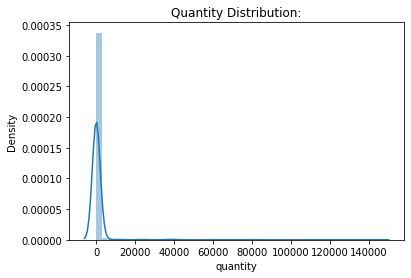

In [11]:
# How about outliers in the data? Are there abnormally large order amounts?..

#A look at the distribution for quantity and unit price show that the majority of values are in single digits. 
# There however seems to be outliers of up to 80,995 for order quantity and 38,970 for unit price.

plt = sns.distplot(df['quantity'].value_counts(), kde = True)
plt.set_title('Quantity Distribution:')

Conclusion:

Seems like most of Quantity records are concentrated around the pretty low values to the right of zero, but the distribution is skewed to the right.. 

Text(0.5, 1.0, 'Unit Price Distribution:')

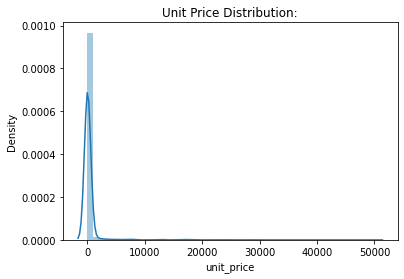

In [12]:
plt = sns.distplot(df['unit_price'].value_counts(), kde = True)
plt.set_title('Unit Price Distribution:')


Conclusion:
    
Seems like most of Unit Price records are concentrated in low values to the right of zero, but the distribution is skewed to the right.. 

Conclusion:

Seems like most of Unit Price records are concentrated in low values to the right of zero, but the distribution is skewed to the right.. 

Text(0.5, 1.0, 'Total Order Distribution:')

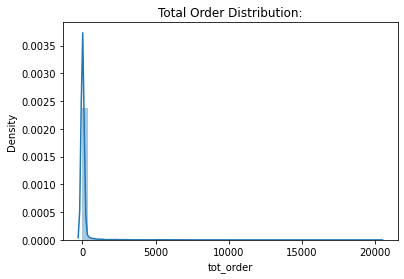

In [13]:
plt = sns.distplot(df['tot_order'].value_counts(), kde = True)
plt.set_title('Total Order Distribution:')

Conclusion:
    
Seems like most of Total Orer records are concentrated in low values to the right of zero, but the distribution is skewed to the right.. 

In [14]:
display(df[['quantity', 'unit_price', 'tot_order']].describe().T)
print()

# outliers: 
print('unit_price destribution')
display(df.stb.freq(['unit_price'], style = True, cum_cols = False))# cum_cols=false otherwiseit sum up the persentages
print('quantity destribution')
display(df.stb.freq(['quantity'], style = True, cum_cols = False))# cum_cols=false otherwiseit sum up the persentages


count       mean         std        min   25%   50%    75%  \
quantity    535187.0   9.671593  219.059056  -80995.00  1.00  3.00  10.00   
unit_price  535187.0   4.645242   97.364810  -11062.06  1.25  2.08   4.13   
tot_order   535187.0  18.173100  381.171824 -168469.60  3.75  9.90  17.40   

                 max  
quantity     80995.0  
unit_price   38970.0  
tot_order   168469.6


unit_price destribution


quantity destribution


Conclusion:

- There are records with UnitPrice<0 and Quantity<0. We need to remove them from the analysis.
- The min and max value for Quantity is 80995, this could represent cancelled or returned orders.
- The UnitPrice also have few negative values which are uncommon, these transactions could represent cancelled orders by customers or bad debt incurred by the business.


In [15]:
# Lets run a quick filter for quantity-total_order outliers: 
print("quantity-total_order outliers(quantity > 1,000 and total order > 5,000):")
display(df[(df['quantity'] > 1000) & (df['tot_order'] > 5000)])

print("Looking for a specific outlier with total order of -168469.600000")
display(df[df['tot_order'] == -168469.600000] )# 2 only

# What about the unit price outliers? A look at the highest mean values bring up some suspect "products":
# DOTCOM POSTAGE
# CRUK Commission
# Manual
# Discount

df.groupby('description').mean()['unit_price'].nlargest()

# Let's examine postage related data in particular: 
# Creating a list of dotcome postage(/amazon) fee :
postage_dotcome_amazon_list = [
'dotcom sales','dotcom sold sets', 'postage', 'dotcom set', 'dotcom postage','sold as set/6 by dotcom','sold as set on dotcom','sold as set on dotcom and amazon',
'dotcome sales','sold as set on dotcom', 'sold as set on dotcom and amazon', 'sold as set by dotcom','sold as 1 on dotcom', 'dotcom adjust','allocate stock for dotcom orders ta',
'dotcom set','sold as set on dotcom','amazon sold sets','dotcom sold sets', 'sold as 1 on dotcom', 'dotcom sold sets',"dotcom sold in 6's", 're dotcom quick fix.',
'dotcomstock','dotcom adjust','rcvd be air temp fix for dotcom sit', 'amazon sold sets','amazon fee','amazon sales','amazon','amazon sold sets','amazon adjust', 
'amazon adjustment','sold as set on dotcom and amazon','sold as set on dotcom and amazon', 'ebay', 're dotcom quick fix.'
]
# Subseting df with those descriptions:
postage_dotcome_amazon_descriptions_df = df[df['description'].isin(postage_dotcome_amazon_list)]
print('Dotcome Postage/Amazon Fee related df rows:')
display(postage_dotcome_amazon_descriptions_df)
print("Quantity values of Dotcome Postage/Amazon Fee related df:")
display(postage_dotcome_amazon_descriptions_df['quantity'])
print("Unit Price values of Dotcome Postage/Amazon Fee related df:")
display(df[df['description'] == 'dotcom postage']['unit_price'].describe())

# filter postage related descritions:  
df = df[~df['description'].isin(postage_dotcome_amazon_descriptions_df)]

# Now, let's examine 'CRUK Commission' - charity related data in particular: 
print('CRUK Commission -Charity related df rows:')
display(df[df['description'] == 'cruk commission'])

# Now, let's examine 'Manual' data in particular: 

# Creating list with manual related descriptions:

manual_damaged_products_related_list = [
                 'dotcom postage','thrown away-rusty','party bunting','wet/rusty','damages/dotcom?','on cargo order','smashed','wet damaged',
                 'water damaged','printing smudges/thrown away','to push order througha s stock was ','found some more on shelf','show samples',
                 'mix up with c', 'wrongly marked. 23343 in box','alan hodge cant mamage this section','fba','stock creditted wrongly','incorrectly put back into stock',
                 'manual','damages/samples','sold as 1 on dotcom','key fob , shed','key fob , back door ','code mix up? 84930','?display?','sold as 1',
                 '?missing','crushed ctn','test','temp adjustment','taig adjust','allocate stock for dotcom orders ta', '??','add stock to allocate online orders',
                 'for online retail orders','found box','oops ! adjustment','found in w/hse','website fixed','dagamed','historic computer difference?....se','incorrect stock entry.',
                 'michel oops', 'wrongly coded 20713','wrongly coded-23343','stock check','crushed boxes','wet/mouldy','wet/rusty','mailout',"can't find",'mouldy','wet pallet-thrown away',
                 'had been put aside.','sale error','wrongly marked 23343','20713 wrongly marked','re-adjustment','breakages','marked as 23343','20713',
                 'wrongly coded 23343','found by jackie','unsaleable, destroyed.','wrongly marked','had been put aside','damages wax',
                 'wrongly mrked had 85123a in box','wrongly marked carton 22804','missing?', 'wet rusty', '?lost', '?lost?', 'lost?',
                 'rusty thrown away','check?', '?? missing','wet pallet','????missing','lost in space','wet?', 'lost??','???','wet boxes',
                  '????damages????','mixed up','lost','given away','label mix up','samples/damages','thrown away','adjustment','wrongly sold as sets','wrongly sold sets',
                  '? sold as sets?', '?sold as sets?', 'thrown away.','damages/display',
                  'damaged stock','broken','throw away','wrong barcode (22467)','wrongly sold (22719) barcode','wrong barcode', 'barcode problem',
                  '?lost','found','faulty','?','check','damages','cracked','sold as 22467','sold in set?','damages?', 'key fob , front  door ',
                  'damages/display','damaged stock','broken','throw away','wrongly sold sets','? sold as sets?','?sold as sets?', 'wrongly sold as sets',
                  'amazon sold sets','samples/damages',  'label mix up', 'faulty','manual','amazon fee',
                  'bank charges','check', 'damages','samples', '?','discount','damages/showroom etc','adjust', 'crushed','returned','display',
                  'cracked','sold as 22467','incorrectly made-thrown away.', "thrown away-can't sell.", "thrown away-can't sell",
                  'wrongly sold sets','? sold as sets?','?sold as sets?', 'found','counted', 'returned', '???missing','mouldy, thrown away.', 'damaged' ,
                  'wet','missing','reverse 21/5/10 adjustment','damaged','reverse 21/5/10 adjustment',
                  'mouldy, thrown away.','showroom','mia','mystery! only ever imported 1800','merchant chandler credit error, sto','possible damages or lost?',
                  'display', 'missing','wrong code?','wrong code','damages/credits from asos.','reverse previous adjustment','incorrectly credited c550456 see 47',
                  'mouldy, unsaleable.','taig adjust no stock','???lost','sold with wrong barcode','rusty throw away','adjust bad debt','did  a credit  and did not tick ret',
                  'mailout ','dotcomstock','rcvd be air temp fix for dotcom sit'
]


# Subseting df with those descriptions:
manual_related_descriptions_df = df[df['description'].isin(manual_damaged_products_related_list)]
print('Dotcome Postage/Amazon Fee related df rows:')
display(manual_related_descriptions_df)
print ("Unit Price Manual related df")
display(manual_related_descriptions_df['unit_price'].describe())
print()
print("Manual related df rows with manual description and tot order above 3000")
display(manual_related_descriptions_df[manual_related_descriptions_df['tot_order'] > 3000])
print()

# filter manual related descritions:  
df = df[~df['description'].isin(manual_damaged_products_related_list)]

#  Delete all descriptions with '?':
bool_vec = ~df['description'].str.contains('?',na=False,regex=False)
display(bool_vec)
display(df.loc[bool_vec])
df = df.loc[bool_vec]

print ("Unit Price Discount related df")
display(df[df['description'] == 'discount']['unit_price'].describe())
print()

print("Discount related df rows:")
display(df[df['description'] == 'discount'])
print()

print("removed categories")
removed_cats = ['dotcom postage related', 'cruk commission', 'manual related']
display(removed_cats)
print()

quantity-total_order outliers(quantity > 1,000 and total order > 5,000):


invoice_no stock_code                          description  quantity  \
52169      540815      21108   fairy cake flannel assorted colour      3114   
61006      541431      23166       medium ceramic top storage jar     74215   
159101     550461      21108   fairy cake flannel assorted colour      3114   
345627     567423      23243  set of tea coffee sugar tins pantry      1412   
535160     581483      23843          paper craft , little birdie     80995   

          invoice_datetime  unit_price  customer_id invoice_period  \
52169  2019-01-09 12:55:00        2.10      15749.0        2019-01   
61006  2019-01-16 10:01:00        1.04      12346.0        2019-01   
159101 2019-04-16 13:20:00        2.10      15749.0        2019-04   
345627 2019-09-18 11:05:00        5.06      17450.0        2019-09   
535160 2019-12-07 09:15:00        2.08      16446.0        2019-12   

       invoice_date  tot_order  
52169    2019-01-09    6539.40  
61006    2019-01-16   77183.60  
159101   2019-04-16    6539.40  
345627   2019-09-18    7144.72  
535160   2019-12-07  168469.60

Looking for a specific outlier with total order of -168469.600000


invoice_no stock_code                  description  quantity  \
535161    C581484      23843  paper craft , little birdie    -80995   

          invoice_datetime  unit_price  customer_id invoice_period  \
535161 2019-12-07 09:27:00        2.08      16446.0        2019-12   

       invoice_date  tot_order  
535161   2019-12-07  -168469.6

Dotcome Postage/Amazon Fee related df rows:


invoice_no stock_code     description  quantity    invoice_datetime  \
45         536370       POST         postage         3 2018-11-29 08:45:00   
386        536403       POST         postage         1 2018-11-29 11:27:00   
1098       536527       POST         postage         1 2018-11-29 13:04:00   
1778       536544        DOT  dotcom postage         1 2018-11-29 14:32:00   
2997       536592        DOT  dotcom postage         1 2018-11-29 17:06:00   
...           ...        ...             ...       ...                 ...   
535955     581494       POST         postage         2 2019-12-07 10:13:00   
536279     581498        DOT  dotcom postage         1 2019-12-07 10:26:00   
536462     581570       POST         postage         1 2019-12-07 11:59:00   
536499     581574       POST         postage         2 2019-12-07 12:09:00   
536500     581578       POST         postage         3 2019-12-07 12:16:00   

        unit_price  customer_id invoice_period invoice_date  tot_order  
45           18.00      12583.0        2018-11   2018-11-29      54.00  
386          15.00      12791.0        2018-11   2018-11-29      15.00  
1098         18.00      12662.0        2018-11   2018-11-29      18.00  
1778        569.77          NaN        2018-11   2018-11-29     569.77  
2997        607.49          NaN        2018-11   2018-11-29     607.49  
...            ...          ...            ...          ...        ...  
535955       18.00      12518.0        2019-12   2019-12-07      36.00  
536279     1714.17          NaN        2019-12   2019-12-07    1714.17  
536462       18.00      12662.0        2019-12   2019-12-07      18.00  
536499       18.00      12526.0        2019-12   2019-12-07      36.00  
536500       18.00      12713.0        2019-12   2019-12-07      54.00  

[2057 rows x 10 columns]

Quantity values of Dotcome Postage/Amazon Fee related df:


45        3
386       1
1098      1
1778      1
2997      1
         ..
535955    2
536279    1
536462    1
536499    2
536500    3
Name: quantity, Length: 2057, dtype: int64

Unit Price values of Dotcome Postage/Amazon Fee related df:


count     709.000000
mean      290.905585
std       355.475166
min         0.000000
25%       131.420000
50%       184.960000
75%       264.650000
max      4505.170000
Name: unit_price, dtype: float64

CRUK Commission -Charity related df rows:


invoice_no stock_code      description  quantity    invoice_datetime  \
315033    C564763       CRUK  cruk commission        -1 2019-08-28 10:49:00   
321525    C565382       CRUK  cruk commission        -1 2019-08-31 15:45:00   
331207    C566216       CRUK  cruk commission        -1 2019-09-07 15:17:00   
336196    C566565       CRUK  cruk commission        -1 2019-09-11 12:32:00   
348282    C567655       CRUK  cruk commission        -1 2019-09-19 14:40:00   
358797    C568345       CRUK  cruk commission        -1 2019-09-24 15:28:00   
369907    C569245       CRUK  cruk commission        -1 2019-10-01 09:57:00   
386875    C570487       CRUK  cruk commission        -1 2019-10-08 17:12:00   
398522    C571440       CRUK  cruk commission        -1 2019-10-15 13:31:00   
413019    C572551       CRUK  cruk commission        -1 2019-10-22 17:07:00   
426375    C573575       CRUK  cruk commission        -1 2019-10-29 14:09:00   
451291    C575606       CRUK  cruk commission        -1 2019-11-08 12:37:00   
463273    C576338       CRUK  cruk commission        -1 2019-11-12 15:27:00   
490139    C578269       CRUK  cruk commission        -1 2019-11-21 13:39:00   
503664    C579195       CRUK  cruk commission        -1 2019-11-26 15:54:00   
522945    C580726       CRUK  cruk commission        -1 2019-12-03 17:17:00   

        unit_price  customer_id invoice_period invoice_date  tot_order  
315033        1.60      14096.0        2019-08   2019-08-28      -1.60  
321525       13.01      14096.0        2019-08   2019-08-31     -13.01  
331207       15.96      14096.0        2019-09   2019-09-07     -15.96  
336196       52.24      14096.0        2019-09   2019-09-11     -52.24  
348282      608.66      14096.0        2019-09   2019-09-19    -608.66  
358797      447.56      14096.0        2019-09   2019-09-24    -447.56  
369907      361.59      14096.0        2019-10   2019-10-01    -361.59  
386875      411.92      14096.0        2019-10   2019-10-08    -411.92  
398522      495.98      14096.0        2019-10   2019-10-15    -495.98  
413019      425.14      14096.0        2019-10   2019-10-22    -425.14  
426375      606.00      14096.0        2019-10   2019-10-29    -606.00  
451291      517.51      14096.0        2019-11   2019-11-08    -517.51  
463273     1038.75      14096.0        2019-11   2019-11-12   -1038.75  
490139      849.93      14096.0        2019-11   2019-11-21    -849.93  
503664      987.14      14096.0        2019-11   2019-11-26    -987.14  
522945     1100.44      14096.0        2019-12   2019-12-03   -1100.44

Dotcome Postage/Amazon Fee related df rows:


invoice_no stock_code             description  quantity  \
141       C536379          D                discount        -1   
1778       536544        DOT          dotcom postage         1   
2195       536569          M                  manual         1   
2206       536569          M                  manual         1   
2997       536592        DOT          dotcom postage         1   
...           ...        ...                     ...       ...   
535421     581492      21902  key fob , front  door          1   
535647     581492        DOT          dotcom postage         1   
536057     581497      47566           party bunting         5   
536279     581498        DOT          dotcom postage         1   
536280    C581499          M                  manual        -1   

          invoice_datetime  unit_price  customer_id invoice_period  \
141    2018-11-29 09:41:00       27.50      14527.0        2018-11   
1778   2018-11-29 14:32:00      569.77          NaN        2018-11   
2195   2018-11-29 15:35:00        1.25      16274.0        2018-11   
2206   2018-11-29 15:35:00       18.95      16274.0        2018-11   
2997   2018-11-29 17:06:00      607.49          NaN        2018-11   
...                    ...         ...          ...            ...   
535421 2019-12-07 10:03:00        1.63          NaN        2019-12   
535647 2019-12-07 10:03:00      933.17          NaN        2019-12   
536057 2019-12-07 10:23:00       10.79          NaN        2019-12   
536279 2019-12-07 10:26:00     1714.17          NaN        2019-12   
536280 2019-12-07 10:28:00      224.69      15498.0        2019-12   

       invoice_date  tot_order  
141      2018-11-29     -27.50  
1778     2018-11-29     569.77  
2195     2018-11-29       1.25  
2206     2018-11-29      18.95  
2997     2018-11-29     607.49  
...             ...        ...  
535421   2019-12-07       1.63  
535647   2019-12-07     933.17  
536057   2019-12-07      53.95  
536279   2019-12-07    1714.17  
536280   2019-12-07    -224.69  

[4687 rows x 10 columns]

Unit Price Manual related df


count     4687.000000
mean       146.298771
std       1014.906516
min     -11062.060000
25%          0.650000
50%          4.950000
75%         10.790000
max      38970.000000
Name: unit_price, dtype: float64


Manual related df rows with manual description and tot order above 3000


invoice_no stock_code      description  quantity    invoice_datetime  \
14757      537632  AMAZONFEE       amazon fee         1 2018-12-05 15:08:00   
265857     560373          M           manual         1 2019-07-16 12:30:00   
295392     562955        DOT   dotcom postage         1 2019-08-09 10:14:00   
297645    A563185          B  adjust bad debt         1 2019-08-10 14:50:00   
371642     569382          M           manual         1 2019-10-01 16:44:00   
403134     571751          M           manual         1 2019-10-17 11:18:00   
418831     573077          M           manual         1 2019-10-25 14:13:00   
418856     573080          M           manual         1 2019-10-25 14:20:00   

        unit_price  customer_id invoice_period invoice_date  tot_order  
14757     13541.33          NaN        2018-12   2018-12-05   13541.33  
265857     4287.63          NaN        2019-07   2019-07-16    4287.63  
295392     4505.17          NaN        2019-08   2019-08-09    4505.17  
297645    11062.06          NaN        2019-08   2019-08-10   11062.06  
371642     3155.95      15502.0        2019-10   2019-10-01    3155.95  
403134     3949.32      12744.0        2019-10   2019-10-17    3949.32  
418831     4161.06      12536.0        2019-10   2019-10-25    4161.06  
418856     4161.06      12536.0        2019-10   2019-10-25    4161.06

0         True
1         True
2         True
3         True
4         True
          ... 
536636    True
536637    True
536638    True
536639    True
536640    True
Name: description, Length: 530500, dtype: bool

invoice_no stock_code                          description  quantity  \
0          536365     85123A   white hanging heart t-light holder         6   
1          536365      71053                  white metal lantern         6   
2          536365     84406B       cream cupid hearts coat hanger         8   
3          536365     84029G  knitted union flag hot water bottle         6   
4          536365     84029E       red woolly hottie white heart.         6   
...           ...        ...                                  ...       ...   
536636     581587      22613          pack of 20 spaceboy napkins        12   
536637     581587      22899         children's apron dolly girl          6   
536638     581587      23254        childrens cutlery dolly girl          4   
536639     581587      23255      childrens cutlery circus parade         4   
536640     581587      22138        baking set 9 piece retrospot          3   

          invoice_datetime  unit_price  customer_id invoice_period  \
0      2018-11-29 08:26:00        2.55      17850.0        2018-11   
1      2018-11-29 08:26:00        3.39      17850.0        2018-11   
2      2018-11-29 08:26:00        2.75      17850.0        2018-11   
3      2018-11-29 08:26:00        3.39      17850.0        2018-11   
4      2018-11-29 08:26:00        3.39      17850.0        2018-11   
...                    ...         ...          ...            ...   
536636 2019-12-07 12:50:00        0.85      12680.0        2019-12   
536637 2019-12-07 12:50:00        2.10      12680.0        2019-12   
536638 2019-12-07 12:50:00        4.15      12680.0        2019-12   
536639 2019-12-07 12:50:00        4.15      12680.0        2019-12   
536640 2019-12-07 12:50:00        4.95      12680.0        2019-12   

       invoice_date  tot_order  
0        2018-11-29      15.30  
1        2018-11-29      20.34  
2        2018-11-29      22.00  
3        2018-11-29      20.34  
4        2018-11-29      20.34  
...             ...        ...  
536636   2019-12-07      10.20  
536637   2019-12-07      12.60  
536638   2019-12-07      16.60  
536639   2019-12-07      16.60  
536640   2019-12-07      14.85  

[530500 rows x 10 columns]

Unit Price Discount related df


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: unit_price, dtype: float64


Discount related df rows:


Empty DataFrame
Columns: [invoice_no, stock_code, description, quantity, invoice_datetime, unit_price, customer_id, invoice_period, invoice_date, tot_order]
Index: []


removed categories


['dotcom postage related', 'cruk commission', 'manual related']

Conclusion:

Outliers: 
Some outliers have been detected in unit_price and quantity columns that should be treated to prevent any destortion in the analysis results later on. 

By running a quick filter, we see that the outliers (5 only) mostly lie in small ticket items that cost around 1-2 pounds each. 
The most obvious outlier would be invoice number 581483. 
It seems that someone really really likes crafted paper birdies. Or... after looking for the same negative value for total order and the same (but negative) quantity of the same stock_code with 'paper craft , little birdie' was indeed detected. 

Judging by this cancellation, maybe not so much ...

There doesn't seem to be any other entries within the outliers to suggest skewing the sales history especially when some of the largest tickets were all cancelled.

 - 'DOTCOM POSTAGE'/'DOTCOME','AMAZON' related descriptions seems to indicate the amount spent by the customer on postage. With an average of 709, this is over 200 times the average unit price of all products. 
   Furthermore, postage isn't a direct indicator of sales and might skew the amount spent across cohorts. (There also seems to be a similar label containg 'POSTAGE' or wlse which we will remove as well.)

 - 'CRUK Commission' sounded like a fee paid out to an external organization and a quick google search turned up related results at Cancer Research UK. 
    This might be part of an initiative to pay out some proceeds to the cancer research effort. As this isn't directly related to sales, we should drop 'CRUK Commission' rows.
    (Looking up on line I figure that 'Cancer Research UK' (CRUK) is the world's largest independent cancer research organization. It is registered as a charity in the United Kingdom.)
    
 - 'Manual' is a product that is rather nebulous. There are 567 records of Manual, with a single record commanding an average unit price of 72.48. 
    As we do not have specific information regarding the operations of this online retail company, perhaps 'Manual' refers to manual services rendered with the purchase of other items. 
   This could be the setting up of chandeliers or the shelves in a warehouse. 
   As there are significant outliers for these transactions that do not directly tie to individual product sales, we will drop 'Manual' records too.

- 'Discount' seems to be a rather self explanatory category for discounts offered for products sold. 
   This is further corroborated by the fact that all these transactions have negative sales quantities. 
   As discounts directly tie into the price of products and impact sales directly, we will leave it in the dataframe.

In [16]:
# Now let's deal with other possible problems in product names (description column):
# function for dealind with prefix in invoice_no that means "canceled":

df['is_refund']=df['invoice_no'].apply(lambda x: True if "C" in x else False )
refunds_df_cancelations =df[df['is_refund']]
display(df[df['is_refund']])# 8787 rows of  refunds - to be droped (less then 2%)
display(any(df[df['is_refund']]['quantity'].values>0))# False

# I have tried to make a function to look for "pairs" for refunds (delete the purchase but it didn't work I couldnt distingwish the purchases)

df = df[df['is_refund']==False]
df.info()# 521713  rows now

invoice_no stock_code                        description  quantity  \
154       C536383     35004C    set of 3 coloured  flying ducks        -1   
235       C536391      22556     plasters in tin circus parade        -12   
236       C536391      21984   pack of 12 pink paisley tissues        -24   
237       C536391      21983   pack of 12 blue paisley tissues        -24   
238       C536391      21980  pack of 12 red retrospot tissues        -24   
...           ...        ...                                ...       ...   
535187    C581490      22178    victorian glass hanging t-light       -12   
535188    C581490      23144    zinc t-light holder stars small       -11   
536447    C581568      21258         victorian sewing box large        -5   
536448    C581569      84978   hanging heart jar t-light holder        -1   
536449    C581569      20979      36 pencils tube red retrospot        -5   

          invoice_datetime  unit_price  customer_id invoice_period  \
154    2018-11-29 09:49:00        4.65      15311.0        2018-11   
235    2018-11-29 10:24:00        1.65      17548.0        2018-11   
236    2018-11-29 10:24:00        0.29      17548.0        2018-11   
237    2018-11-29 10:24:00        0.29      17548.0        2018-11   
238    2018-11-29 10:24:00        0.29      17548.0        2018-11   
...                    ...         ...          ...            ...   
535187 2019-12-07 09:57:00        1.95      14397.0        2019-12   
535188 2019-12-07 09:57:00        0.83      14397.0        2019-12   
536447 2019-12-07 11:57:00       10.95      15311.0        2019-12   
536448 2019-12-07 11:58:00        1.25      17315.0        2019-12   
536449 2019-12-07 11:58:00        1.25      17315.0        2019-12   

       invoice_date  tot_order  is_refund  
154      2018-11-29      -4.65       True  
235      2018-11-29     -19.80       True  
236      2018-11-29      -6.96       True  
237      2018-11-29      -6.96       True  
238      2018-11-29      -6.96       True  
...             ...        ...        ...  
535187   2019-12-07     -23.40       True  
535188   2019-12-07      -9.13       True  
536447   2019-12-07     -54.75       True  
536448   2019-12-07      -1.25       True  
536449   2019-12-07      -6.25       True  

[8787 rows x 11 columns]

False

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521713 entries, 0 to 536640
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   invoice_no        521713 non-null  object        
 1   stock_code        521713 non-null  object        
 2   description       521713 non-null  object        
 3   quantity          521713 non-null  int64         
 4   invoice_datetime  521713 non-null  datetime64[ns]
 5   unit_price        521713 non-null  float64       
 6   customer_id       390358 non-null  float64       
 7   invoice_period    521713 non-null  object        
 8   invoice_date      521713 non-null  datetime64[ns]
 9   tot_order         521713 non-null  float64       
 10  is_refund         521713 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 44.3+ MB


Conclusion:

products with invoice number that has prefix "C" seems to be shorts for "canceled" or "cancelation" and perhaps do not represents sales. There are 8787 rows of refunds like those - to be droped (with minor shaer - less then 2% of the data)
Moreover their quantity is negative and that also point out the same fact.

Those rows should be ommitted from data. 

Conclusion:
    
Descriptions with quastion marks probably do not represents sales and should be deleted from the data. (their share is minor)    

In [17]:
problematic_descriptions_list = ['dotcom postage',
                 'not rcvd in 10/11/2010 delivery',
                 'thrown away-rusty',
                 'party bunting',
                 'sold as set/6 by dotcom',
                 'wet/rusty',
                 'damages/dotcom?',
                 'on cargo order',
                 'smashed',
                 'wet damaged',
                 'water damaged',
                 'sold as set on dotcom',
                 'sold as set on dotcom and amazon',
                 'water damage',
                 'sold as set on dotcom',
                 'sold as set on dotcom and amazon',
                 'sold as set by dotcom',
                 'printing smudges/thrown away',
                 'to push order througha s stock was ',
                 'found some more on shelf',
                  'show samples',
                  'mix up with c', 
                  'wrongly marked. 23343 in box',
                  'alan hodge cant mamage this section',
                  'fba',
                  'stock creditted wrongly',
                  'incorrectly put back into stock',
                  'ebay',
                  'manual',
                  'damages/samples',
                  'sold as 1 on dotcom',
                  'key fob , shed',
                  'key fob , back door ',
                  'code mix up? 84930',
                  '?display?',
                  'sold as 1',
                  '?missing',
                  'crushed ctn',
                  'test',
                  'temp adjustment',
                  'taig adjust',
                  'allocate stock for dotcom orders ta',
                   '??',
                  'add stock to allocate online orders',
                  'for online retail orders',
                  'found box','oops ! adjustment',
                  'found in w/hse',
                  'website fixed',
                  'dagamed',
                  'historic computer difference?....se',
                   'incorrect stock entry.',
                   'michel oops',
                   'wrongly coded 20713',
                   'wrongly coded-23343',
                   'stock check',
                   'crushed boxes',
                   'wet/mouldy',
                   'wet/rusty',
                   'mailout',
                   "can't find",
                   'mouldy',
                   'wet pallet-thrown away',
                   'had been put aside.',
                   'sale error',
                   'amazon adjustment',
                   'wrongly marked 23343',
                   '20713 wrongly marked',
                   're-adjustment',
                   'breakages',
                   'marked as 23343',
                   '20713',
                   'wrongly coded 23343',
                   'found by jackie',
                   'unsaleable, destroyed.',
                   'wrongly marked',
                   'had been put aside','damages wax',
                   'wrongly mrked had 85123a in box',
                   'wrongly marked carton 22804',
                   'missing?',
                   'wet rusty',
                   'amazon adjust',
                   '?lost', 
                   '?lost?', 
                   'lost?',
                   'dotcom adjust',
                   'rusty thrown away',
                   'check?',
                   '?? missing',
                   'wet pallet',
                    '????missing',
                    'lost in space',
                    'wet?',
                    'lost??',
                    '???',
                    'wet boxes',
                    '????damages????',
                    'mixed up',
                    'lost',
                    'given away',
                    'dotcom',
                    'label mix up',
                    'samples/damages',
                    'thrown away',
                    'adjustment',
                    'dotcom set',
                    'wrongly sold as sets',
                    'amazon sold sets',
                    'dotcom sold sets',
                    'wrongly sold sets',
                    '? sold as sets?',
                    '?sold as sets?',
                    'thrown away.',
                    'damages/display',
                    'damaged stock',
                    'broken',
                    'throw away','wrong barcode (22467)',
                    'wrongly sold (22719) barcode',
                    'wrong barcode',
                    'barcode problem',
                    '?lost','found','faulty','dotcom sales',
                    'amazon sales','amazon',
                    '?','check','damages','cracked',
                    'sold as 22467', "dotcom sold in 6's",
                    'sold in set?',
                    'damages?', 
                    'key fob , front  door ',
                    'damages/display',
                    'damaged stock',
                    'broken',
                    'throw away',
                    'wrongly sold sets',
                    '? sold as sets?',
                    '?sold as sets?',
                    'dotcom set',
                    'wrongly sold as sets',
                    'amazon sold sets',
                    'dotcom sold sets',
                    'samples/damages',  
                    'label mix up',
                    'dotcom',
                    'dotcom sales', 
                    'faulty',
                    'manual',
                    'amazon fee',
                    'bank charges', 
                    'check',
                    'damages',
                    'samples', 
                    'postage', 
                    '?',
                    'discount',
                    'damages/showroom etc',
                    'adjust',
                    'crushed',
                    'returned',
                    'display',
                    'cracked',
                    'sold as 22467',
                    'incorrectly made-thrown away.',
                     "thrown away-can't sell.",
                     "thrown away-can't sell",
                    'wrongly sold sets',
                    '? sold as sets?',
                    '?sold as sets?', 
                    'found',
                    'counted', 
                    'returned',
                    '???missing',
                    'mouldy, thrown away.',
                    'damaged' ,
                    'wet',
                    'missing',            
                    'reverse 21/5/10 adjustment',
                    'damaged',
                    'reverse 21/5/10 adjustment',
                     'mouldy, thrown away.',
                     'showroom',
                     'mia',
                     're dotcom quick fix.',
                     'mystery! only ever imported 1800',
                     'merchant chandler credit error, sto',
                     'possible damages or lost?',
                     'display',
                     'missing',
                     'wrong code?',
                     'wrong code',
                     'damages/credits from asos.',
                     'reverse previous adjustment',
                     'incorrectly credited c550456 see 47',
                     'mouldy, unsaleable.',
                     'taig adjust no stock',
                     '???lost',
                     'sold with wrong barcode',
                     'rusty throw away',
                     'adjust bad debt',
                     'did  a credit  and did not tick ret',
                     'mailout ','dotcomstock',
                     'rcvd be air temp fix for dotcom sit']

problematic_descriptions_df = df[df['description'].isin(problematic_descriptions_list)]
display(problematic_descriptions_df)
print("problematic_descriptions quantiry values:")
display(problematic_descriptions_df['quantity'])
# filter descritions:  
df_new = df[~df['description'].isin(problematic_descriptions_list)]
df_new.info() # 534521

# check the share of the lost..
print('unfiltered data:')
print(len(df))
print('filltered data:')
print(len(df_new))
print('Share of lost data:')
print(round(100-len(df_new)/len(df)*100,1),'%' )        
df = df_new    

invoice_no stock_code description  quantity    invoice_datetime  \
45         536370       POST     postage         3 2018-11-29 08:45:00   
386        536403       POST     postage         1 2018-11-29 11:27:00   
1098       536527       POST     postage         1 2018-11-29 13:04:00   
4994       536840       POST     postage         1 2018-11-30 18:27:00   
5173       536852       POST     postage         1 2018-12-01 09:51:00   
...           ...        ...         ...       ...                 ...   
535937     581493       POST     postage         1 2019-12-07 10:10:00   
535955     581494       POST     postage         2 2019-12-07 10:13:00   
536462     581570       POST     postage         1 2019-12-07 11:59:00   
536499     581574       POST     postage         2 2019-12-07 12:09:00   
536500     581578       POST     postage         3 2019-12-07 12:16:00   

        unit_price  customer_id invoice_period invoice_date  tot_order  \
45            18.0      12583.0        2018-11   2018-11-29       54.0   
386           15.0      12791.0        2018-11   2018-11-29       15.0   
1098          18.0      12662.0        2018-11   2018-11-29       18.0   
4994          18.0      12738.0        2018-11   2018-11-30       18.0   
5173          18.0      12686.0        2018-12   2018-12-01       18.0   
...            ...          ...            ...          ...        ...   
535937        15.0      12423.0        2019-12   2019-12-07       15.0   
535955        18.0      12518.0        2019-12   2019-12-07       36.0   
536462        18.0      12662.0        2019-12   2019-12-07       18.0   
536499        18.0      12526.0        2019-12   2019-12-07       36.0   
536500        18.0      12713.0        2019-12   2019-12-07       54.0   

        is_refund  
45          False  
386         False  
1098        False  
4994        False  
5173        False  
...           ...  
535937      False  
535955      False  
536462      False  
536499      False  
536500      False  

[1192 rows x 11 columns]

problematic_descriptions quantiry values:


45        3
386       1
1098      1
4994      1
5173      1
         ..
535937    1
535955    2
536462    1
536499    2
536500    3
Name: quantity, Length: 1192, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520521 entries, 0 to 536640
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   invoice_no        520521 non-null  object        
 1   stock_code        520521 non-null  object        
 2   description       520521 non-null  object        
 3   quantity          520521 non-null  int64         
 4   invoice_datetime  520521 non-null  datetime64[ns]
 5   unit_price        520521 non-null  float64       
 6   customer_id       389259 non-null  float64       
 7   invoice_period    520521 non-null  object        
 8   invoice_date      520521 non-null  datetime64[ns]
 9   tot_order         520521 non-null  float64       
 10  is_refund         520521 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 44.2+ MB
unfiltered data:
521713
filltered data:
520521
Share of lost data:
0.2 %


Conclusion:

Bad debt adjustments together with other suspicious item names should be dropped from the dataset as these do not represent actual sales. 

Note: their share is only 2% of the data.

In [18]:
print('negative quantity:') # 9762  neg
neg_quantity_df = df.query('quantity < 0')
display(neg_quantity_df)# 9762 neg
#display(list(neg_quantity_df['description'].unique()))
#print()
#print('negative quantity description:')
#display(df.query('quantity < 0').describe().T)# min: -80995.0, max:-1. (weired desc: discount, manual)
print('zero quantity:')
display(df.query('quantity == 0'))# no zero quantity 
#print('zero quantity description::')
#display(df.query('quantity == 0').describe().T)
print()


print('descriptions of negative/zero price :')
neg_zero_unit_price_df = df.query('unit_price < 0 or unit_price ==0') # only 409 rows - zero unit price
display(neg_zero_unit_price_df)
#display(list(neg_zero_unit_price_df['description'].unique()))


# no more quantity zero or netative!!!!!!!!!!!!


display(df[df['unit_price']==0]['stock_code'].nunique()) # 192 unique stock code when 'unit_price' is zero and need to be corrected with zero 
#display(df[df['unit_price']==0]['stock_code'].nunique())
display(df[df['unit_price']==0]) # 2515 rows with zero values .. 


negative quantity:


Empty DataFrame
Columns: [invoice_no, stock_code, description, quantity, invoice_datetime, unit_price, customer_id, invoice_period, invoice_date, tot_order, is_refund]
Index: []

zero quantity:


Empty DataFrame
Columns: [invoice_no, stock_code, description, quantity, invoice_datetime, unit_price, customer_id, invoice_period, invoice_date, tot_order, is_refund]
Index: []


descriptions of negative/zero price :


invoice_no stock_code                          description  quantity  \
9132       537197      22841         round cake tin vintage green         1   
14080      537534      85064         cream sweetheart letter rack         1   
14081      537534      84832     zinc willie winkie  candle stick         1   
14082      537534      84692          box of 24 cocktail parasols         2   
14083      537534      48184                doormat english rose          3   
...           ...        ...                                  ...       ...   
497394     578841      84826       asstd design 3d paper stickers     12540   
516359     580366      22923  fridge magnets les enfants assorted         6   
516368     580366      23169             classic glass cookie jar         6   
533259     581406     46000M         polyester filler pad 45x45cm       240   
533260     581406     46000S         polyester filler pad 40x40cm       300   

          invoice_datetime  unit_price  customer_id invoice_period  \
9132   2018-12-03 14:02:00         0.0      12647.0        2018-12   
14080  2018-12-05 11:48:00         0.0          NaN        2018-12   
14081  2018-12-05 11:48:00         0.0          NaN        2018-12   
14082  2018-12-05 11:48:00         0.0          NaN        2018-12   
14083  2018-12-05 11:48:00         0.0          NaN        2018-12   
...                    ...         ...          ...            ...   
497394 2019-11-23 15:57:00         0.0      13256.0        2019-11   
516359 2019-11-30 16:38:00         0.0          NaN        2019-11   
516368 2019-11-30 16:38:00         0.0          NaN        2019-11   
533259 2019-12-06 13:58:00         0.0          NaN        2019-12   
533260 2019-12-06 13:58:00         0.0          NaN        2019-12   

       invoice_date  tot_order  is_refund  
9132     2018-12-03        0.0      False  
14080    2018-12-05        0.0      False  
14081    2018-12-05        0.0      False  
14082    2018-12-05        0.0      False  
14083    2018-12-05        0.0      False  
...             ...        ...        ...  
497394   2019-11-23        0.0      False  
516359   2019-11-30        0.0      False  
516368   2019-11-30        0.0      False  
533259   2019-12-06        0.0      False  
533260   2019-12-06        0.0      False  

[409 rows x 11 columns]

192

invoice_no stock_code                          description  quantity  \
9132       537197      22841         round cake tin vintage green         1   
14080      537534      85064         cream sweetheart letter rack         1   
14081      537534      84832     zinc willie winkie  candle stick         1   
14082      537534      84692          box of 24 cocktail parasols         2   
14083      537534      48184                doormat english rose          3   
...           ...        ...                                  ...       ...   
497394     578841      84826       asstd design 3d paper stickers     12540   
516359     580366      22923  fridge magnets les enfants assorted         6   
516368     580366      23169             classic glass cookie jar         6   
533259     581406     46000M         polyester filler pad 45x45cm       240   
533260     581406     46000S         polyester filler pad 40x40cm       300   

          invoice_datetime  unit_price  customer_id invoice_period  \
9132   2018-12-03 14:02:00         0.0      12647.0        2018-12   
14080  2018-12-05 11:48:00         0.0          NaN        2018-12   
14081  2018-12-05 11:48:00         0.0          NaN        2018-12   
14082  2018-12-05 11:48:00         0.0          NaN        2018-12   
14083  2018-12-05 11:48:00         0.0          NaN        2018-12   
...                    ...         ...          ...            ...   
497394 2019-11-23 15:57:00         0.0      13256.0        2019-11   
516359 2019-11-30 16:38:00         0.0          NaN        2019-11   
516368 2019-11-30 16:38:00         0.0          NaN        2019-11   
533259 2019-12-06 13:58:00         0.0          NaN        2019-12   
533260 2019-12-06 13:58:00         0.0          NaN        2019-12   

       invoice_date  tot_order  is_refund  
9132     2018-12-03        0.0      False  
14080    2018-12-05        0.0      False  
14081    2018-12-05        0.0      False  
14082    2018-12-05        0.0      False  
14083    2018-12-05        0.0      False  
...             ...        ...        ...  
497394   2019-11-23        0.0      False  
516359   2019-11-30        0.0      False  
516368   2019-11-30        0.0      False  
533259   2019-12-06        0.0      False  
533260   2019-12-06        0.0      False  

[409 rows x 11 columns]

    - The min and max value for Quantity is 80995, this could represent cancelled or returned orders.
    - The UnitPrice also have few negative values which are uncommon, these transactions could represent cancelled orders by customers or bad debt incurred by the business.
    - Bad debt adjustments will be dropped from the dataset as these do not represent actual sales.


Removing the negative values from UnitPrice and Quantity:
df = df[df.Quantity > 0]
df = df[df.UnitPrice > 0]
#Removing the Null values from the data.
df = df[pd.notnull(df['CustomerID'])]

Cleaning the Date Column:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df['Date'] = df['InvoiceDate'].dt.strftime('%Y-%m')

In [19]:
# Dealing with negative/zero values in the data frame: 

# , so first, treat 0 values as missing - nan then..
df.loc[(df['unit_price'] == 0), 'unit_price'] = np.nan
#df.info() # 2515 'unit_price' rows are null now. (all zeroes indeed)
# Then, it is possible to use 'fillna' methods:

#df_single_products = df[df['quantity'] == 1]
df_new = df.copy()
df['unit_price'] = df.groupby(['stock_code'])['unit_price'].transform(lambda grp: grp.fillna(grp.mode()))
display(df['unit_price'])
display(df.info())
# the rest - complete with median :
df['unit_price'] = df.groupby(['stock_code'])['unit_price'].transform(lambda grp: grp.fillna(grp.median()))
display(df.info())# only 1 without unit_price now:
#display(df[df['unit_price'].isnull()]) # study them . look at their descriptions - they are all defected products that cannot be sell . 
# lets dropthem from df:
df.dropna(subset= ['unit_price'], inplace=True)
df.info() # from now on we continue the analysis with  540434 rows !!


0         2.55
1         3.39
2         2.75
3         3.39
4         3.39
          ... 
536636    0.85
536637    2.10
536638    4.15
536639    4.15
536640    4.95
Name: unit_price, Length: 520521, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520521 entries, 0 to 536640
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   invoice_no        520521 non-null  object        
 1   stock_code        520521 non-null  object        
 2   description       520521 non-null  object        
 3   quantity          520521 non-null  int64         
 4   invoice_datetime  520521 non-null  datetime64[ns]
 5   unit_price        520112 non-null  float64       
 6   customer_id       389259 non-null  float64       
 7   invoice_period    520521 non-null  object        
 8   invoice_date      520521 non-null  datetime64[ns]
 9   tot_order         520521 non-null  float64       
 10  is_refund         520521 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 44.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520521 entries, 0 to 536640
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   invoice_no        520521 non-null  object        
 1   stock_code        520521 non-null  object        
 2   description       520521 non-null  object        
 3   quantity          520521 non-null  int64         
 4   invoice_datetime  520521 non-null  datetime64[ns]
 5   unit_price        520520 non-null  float64       
 6   customer_id       389259 non-null  float64       
 7   invoice_period    520521 non-null  object        
 8   invoice_date      520521 non-null  datetime64[ns]
 9   tot_order         520521 non-null  float64       
 10  is_refund         520521 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 44.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520520 entries, 0 to 536640
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   invoice_no        520520 non-null  object        
 1   stock_code        520520 non-null  object        
 2   description       520520 non-null  object        
 3   quantity          520520 non-null  int64         
 4   invoice_datetime  520520 non-null  datetime64[ns]
 5   unit_price        520520 non-null  float64       
 6   customer_id       389259 non-null  float64       
 7   invoice_period    520520 non-null  object        
 8   invoice_date      520520 non-null  datetime64[ns]
 9   tot_order         520520 non-null  float64       
 10  is_refund         520520 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 44.2+ MB


<b id="-color">

### Trying to find color and size traits out of product names:       

In [20]:
# Trying to analize color and size traits for the product:

#Creating color list
colors_list = ['red', 'rose','yellow', 'green', 'pink', 'blue', 'ivory', 'purple', 'white','black', 'silver', 'gold', 'turquoise' ,'color','brown','grey', 'gray' , 'orange', 'violet','colour','light' , 'dark' , 'pastel','black/blue','blue/green' , 'yellow/pink' ,'pink/white','pink/purple','pink/blue', ' silver/black', 'white/pink', 'black+white']
# , '``', '*'
        
def get_color(desc):
    for word in desc.split():
        if word in colors_list:
            #print("%s in string" % word)
            #print( word)
            return word
        return 'undefined'

# Creating size list:
size_list = ['large', 'small', 'mini', 'medium', 'size' ,'grand', 'giant', 'jumbo', 'cm', 'kg' ,'set']

def get_size(desc):
    for word in desc.split():
        if word in size_list:
            #print("%s in string" % word)
            #print( word)
            return word
        return 'undefined'

# Add color and size columns :
df['color'] = df['description'].apply(get_color)    
display(df.stb.freq(['color'], style = True, cum_cols = False))
df['size'] = df['description'].apply(get_size)    
display(df.stb.freq(['size'], style = True, cum_cols = False))

# It terned out that most of the descriptions lacks of those new traits so.. delete those rows of the data 
df.drop("size", inplace=True, axis = 1)
df.drop("color", inplace=True, axis = 1)

Conclusion:

After trying to find product traits as size and colors, it terned out that:

color: 88.42% (461,350 in number) of the descriptions color column values are undefined.

size: 86.85% (452,050 in number) of the descriptions color column values are undefined.

So, delete those new columns from the data.. (but, using the lists later for the corpus)

<b id="-Analysis"> 2.

## Product Description Analysis:

   * Create a corpus out of product descriptions.
   * Clean up the corpus and removed stopwords etc, Eliminate grammatical variations via stemming
   * Create a Term-Frequency Inverse Document Frequency (TF-IDF) matrix.
   * Clculate from the TF-IDF the corpus distance matrix comparing the relative similarity.
   * Use the distance matrix to build a dendrogram from which the number of clusters will be detrmined 
   * Using Kmean to form the clusters
   * Study the term frequencies for each cluster.
   * Based on the term frequencies, identify product category keywords for each cluster.
   * Categorizing the products in the store differently in order to get result that enable better understanding of product range. 
   * Calculating monthly revenue and monthly cumulating revenue to detect the trend
   * Splitting products by category and finding: 1. the leading categories regarding the number of items in each category 2. the leading categories in sales
   * Finding the top ten selling products
   * Examining Refunds: by total amount and by frequency)
      
    

<b id="-corpus">    

### Create a corpus out of product descriptions.

In [21]:
# Make a copy in order to create a list of description for a corpus:

description_df = df['description'].drop_duplicates().to_frame()
display(description_df)


description
0        white hanging heart t-light holder
1                       white metal lantern
2            cream cupid hearts coat hanger
3       knitted union flag hot water bottle
4            red woolly hottie white heart.
...                                     ...
502970       set 10 cards snowy robin 17099
507622  set 10 cards swirly xmas tree 17104
521930            letter "u" bling key ring
532387   cream hanging heart t-light holder
535160          paper craft , little birdie

[4018 rows x 1 columns]

<b id="-clean">

### Clean up the corpus and removed stopwords etc, Eliminate grammatical variations via stemming:

Stopwords, stemming, and tokenizing:

This section focused on defining some functions to manipulate the synopses. First, I load NLTK's list of English stop words. Stop words are words like "a", "the", or "in" which don't convey significant meaning. I'm sure there are much better explanations of this out there.

In [22]:
# Remove non-words from corpus

def remove_not_words(desc):
    desc = re.sub(r'[^\w]',' ', desc)
    pattern = '[0-99]' 
    desc = re.sub(pattern,'', desc)
    # delete single letters from description strings:
    desc = ' '.join( [w for w in desc.split() if len(w)>1] )
    return desc
    
description_df['filtered_corpus'] = description_df['description'].apply(remove_not_words)
display(description_df)



# Cleaning description list from stopwords
stop_words = set(stopwords.words('english')) 

def remove_stop_words(desc):
    word_tokens = word_tokenize(desc)
    desc =  ' '.join([w for w in word_tokens if not w.lower() in stop_words])
    return desc
    
description_df['filtered_corpus'] = description_df['filtered_corpus'].apply(remove_stop_words)
display(description_df)


def remove_size_color(desc):    
    desc =  ' '.join([word for word in desc.split() if (word not in size_list and word not in colors_list )])
    return desc

description_df['filtered_corpus'] = description_df['filtered_corpus'].apply(remove_size_color)
display(description_df)


# lemmetizing the corpus in order to converts the word to its meaningful base form, 
# which is called Lemma . Thats allow us to get rid of plorals etc. 

wnl = nltk.WordNetLemmatizer()

def lemmatize(desc):
    desc = ' '.join([wnl.lemmatize(word) for word in nltk.wordpunct_tokenize(desc)])
    return desc
   
description_df['filtered_corpus'] = description_df['filtered_corpus'].apply(lemmatize)
display(description_df)    


description  \
0        white hanging heart t-light holder   
1                       white metal lantern   
2            cream cupid hearts coat hanger   
3       knitted union flag hot water bottle   
4            red woolly hottie white heart.   
...                                     ...   
502970       set 10 cards snowy robin 17099   
507622  set 10 cards swirly xmas tree 17104   
521930            letter "u" bling key ring   
532387   cream hanging heart t-light holder   
535160          paper craft , little birdie   

                            filtered_corpus  
0          white hanging heart light holder  
1                       white metal lantern  
2            cream cupid hearts coat hanger  
3       knitted union flag hot water bottle  
4             red woolly hottie white heart  
...                                     ...  
502970                set cards snowy robin  
507622           set cards swirly xmas tree  
521930                letter bling key ring  
532387     cream hanging heart light holder  
535160            paper craft little birdie  

[4018 rows x 2 columns]

description  \
0        white hanging heart t-light holder   
1                       white metal lantern   
2            cream cupid hearts coat hanger   
3       knitted union flag hot water bottle   
4            red woolly hottie white heart.   
...                                     ...   
502970       set 10 cards snowy robin 17099   
507622  set 10 cards swirly xmas tree 17104   
521930            letter "u" bling key ring   
532387   cream hanging heart t-light holder   
535160          paper craft , little birdie   

                            filtered_corpus  
0          white hanging heart light holder  
1                       white metal lantern  
2            cream cupid hearts coat hanger  
3       knitted union flag hot water bottle  
4             red woolly hottie white heart  
...                                     ...  
502970                set cards snowy robin  
507622           set cards swirly xmas tree  
521930                letter bling key ring  
532387     cream hanging heart light holder  
535160            paper craft little birdie  

[4018 rows x 2 columns]

description  \
0        white hanging heart t-light holder   
1                       white metal lantern   
2            cream cupid hearts coat hanger   
3       knitted union flag hot water bottle   
4            red woolly hottie white heart.   
...                                     ...   
502970       set 10 cards snowy robin 17099   
507622  set 10 cards swirly xmas tree 17104   
521930            letter "u" bling key ring   
532387   cream hanging heart t-light holder   
535160          paper craft , little birdie   

                            filtered_corpus  
0                      hanging heart holder  
1                             metal lantern  
2            cream cupid hearts coat hanger  
3       knitted union flag hot water bottle  
4                       woolly hottie heart  
...                                     ...  
502970                    cards snowy robin  
507622               cards swirly xmas tree  
521930                letter bling key ring  
532387           cream hanging heart holder  
535160            paper craft little birdie  

[4018 rows x 2 columns]

description  \
0        white hanging heart t-light holder   
1                       white metal lantern   
2            cream cupid hearts coat hanger   
3       knitted union flag hot water bottle   
4            red woolly hottie white heart.   
...                                     ...   
502970       set 10 cards snowy robin 17099   
507622  set 10 cards swirly xmas tree 17104   
521930            letter "u" bling key ring   
532387   cream hanging heart t-light holder   
535160          paper craft , little birdie   

                            filtered_corpus  
0                      hanging heart holder  
1                             metal lantern  
2             cream cupid heart coat hanger  
3       knitted union flag hot water bottle  
4                       woolly hottie heart  
...                                     ...  
502970                     card snowy robin  
507622                card swirly xmas tree  
521930                letter bling key ring  
532387           cream hanging heart holder  
535160            paper craft little birdie  

[4018 rows x 2 columns]

Conclusion:

Now the corpus is ready for use. 

<b id="-tfidf">    

### Create a Term-Frequency Inverse Document Frequency (TF-IDF) matrix

In [23]:
# Create the Term-Frequency Inverse Document Frequency (TF-IDF) matrix 

final_corpus = list(description_df['filtered_corpus'])
display(final_corpus)
tfidf = TfidfVectorizer(stop_words='english',
                                 use_idf=True, ngram_range=(1,1)) # stop_words='english'
tfidf_matrix = tfidf.fit_transform(final_corpus)  # (corpus_list)

print(tfidf_matrix.shape) 

display(len(final_corpus))

terms = tfidf.get_feature_names() 

display(tfidf_matrix)

display(terms)

['hanging heart holder',
 'metal lantern',
 'cream cupid heart coat hanger',
 'knitted union flag hot water bottle',
 'woolly hottie heart',
 'babushka nesting box',
 'glass star frosted holder',
 'hand warmer union jack',
 'hand warmer polka dot',
 'assorted bird ornament',
 'poppy playhouse bedroom',
 'poppy playhouse kitchen',
 'feltcraft princess charlotte doll',
 'knitted mug cosy',
 'box assorted teaspoon',
 'box vintage jigsaw block',
 'box vintage alphabet block',
 'home building block word',
 'love building block word',
 'recipe box metal heart',
 'doormat new england',
 'jam making jar',
 'coat rack paris fashion',
 'coat rack paris fashion',
 'coat rack paris fashion',
 'bath building block word',
 'alarm clock bakelike',
 'alarm clock bakelike',
 'alarm clock bakelike',
 'panda bunny sticker sheet',
 'star gift tape',
 'inflatable political globe',
 'vintage head tail card game',
 'retrospot tea towel',
 'round snack box woodland',
 'spaceboy lunch box',
 'lunch box love lo

(4018, 1746)


4018

<4018x1746 sparse matrix of type '<class 'numpy.float64'>'
	with 13736 stored elements in Compressed Sparse Row format>

['abc',
 'abstract',
 'acapulco',
 'account',
 'acrylic',
 'address',
 'ade',
 'adult',
 'advent',
 'afghan',
 'aged',
 'ahoy',
 'aid',
 'air',
 'airline',
 'airmail',
 'alarm',
 'album',
 'allium',
 'alphabet',
 'alpine',
 'aluminium',
 'amber',
 'amelie',
 'amethyst',
 'anemone',
 'angel',
 'animal',
 'ant',
 'antique',
 'antoienett',
 'antoinette',
 'aperitif',
 'apothecary',
 'apple',
 'apron',
 'aqua',
 'area',
 'army',
 'arouzer',
 'art',
 'articulated',
 'artificial',
 'artiifcial',
 'ashtray',
 'assorted',
 'asst',
 'asstd',
 'azure',
 'babushka',
 'baby',
 'backpack',
 'bad',
 'badge',
 'bag',
 'bain',
 'bake',
 'bakelike',
 'baker',
 'baking',
 'ball',
 'balloon',
 'balm',
 'bamboo',
 'band',
 'bangle',
 'bank',
 'banner',
 'banquet',
 'bar',
 'barn',
 'baroque',
 'baroquecandlestick',
 'barrel',
 'barrier',
 'base',
 'baseball',
 'basil',
 'basin',
 'basket',
 'bath',
 'bathroom',
 'battery',
 'bauble',
 'bazaar',
 'bea',
 'beach',
 'bead',
 'beaded',
 'beak',
 'beaker',
 'b

<b id="-distance">

### Calculate from the TF-IDF the corpus distance matrix comparing the relative similarity.

In [24]:
# crating distance matrix : use tf idf for clustering:

dist = pairwise_distances(tfidf_matrix, Y=None, metric = 'cosine')
display(dist)

array([[0.        , 1.        , 0.86839565, ..., 1.        , 0.18772547,
        1.        ],
       [1.        , 0.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.86839565, 1.        , 0.        , ..., 1.        , 0.66940388,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [0.18772547, 1.        , 0.66940388, ..., 1.        , 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ]])

<b id="-dendrogram">

### Use the distance matrix to build a dendrogram from which the number of clusters will be detrmined:

C:\Users\Gome\AppData\Local\Temp/ipykernel_20744/1825490988.py:3: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



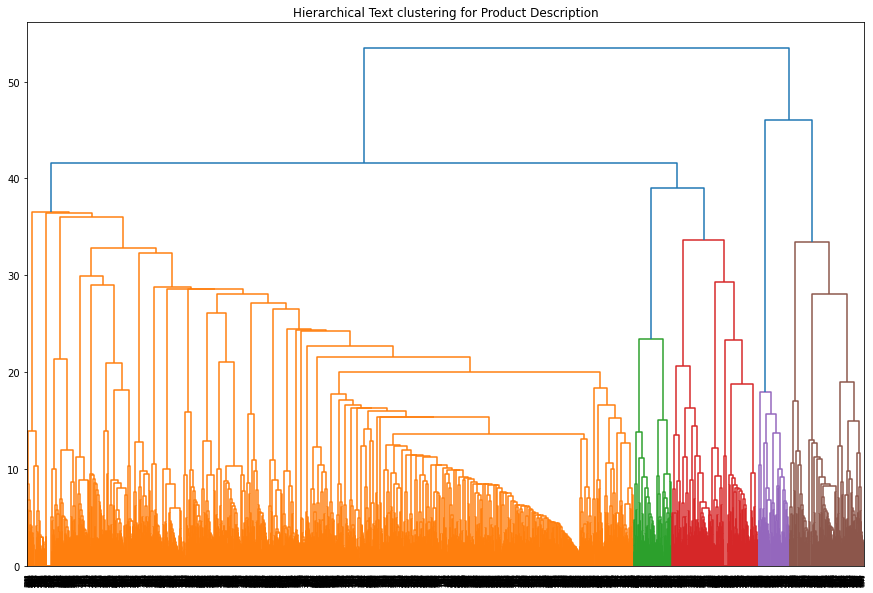

In [25]:
import matplotlib.pyplot as plt
# build a dendrogram from which the number of clusters will be detrmined
linked = linkage(dist, method='ward') #  metric='correlation',method = 'ward',
#The variable linked stores the table with the linked bundles of objects. It can be visualized as a dendrogram:
plt.figure(figsize=(15, 10))  
dendrogram(linked,  orientation="top")# orientation='top',
plt.title('Hierarchical Text clustering for Product Description')
plt.show() 

<b id="-kmean">

### Using Kmean to form the clusters:

In [26]:
# define the k_means model with 5 clusters

n_clusters = 5
km =  KMeans(n_clusters = n_clusters, random_state = 1) # setting the number of clusters as 5
# predict the clusters for observations (the algorithm assigns them a number from 0 to 2)
labels = km.fit_predict(tfidf_matrix)  # applying the algorithm to the data and forming a cluster vector 

# store cluster labels in the field of our dataset

description_df['cluster_km'] = labels
#display(x_sc[1,:])

In [27]:
print()
cluster_desc_grouped_df = description_df.groupby(['cluster_km'])['filtered_corpus'].unique().to_frame()
print()

cluster_desc_grouped_df.reset_index(inplace=True)
#display(cluster_desc_grouped_df)

# Now , to add the groups to event table :Let's create a dictionary with pair: user-group and then add it to events_clean:
cluster_desc_dict = dict(zip(cluster_desc_grouped_df.cluster_km, cluster_desc_grouped_df.filtered_corpus))
#display(cluster_desc_dict)


for key in cluster_desc_dict.keys():
   
    print('cluster ', key, ' descriptions list:') # metal sign , christmas
    print()
    print(len(cluster_desc_dict[key]))
    print(cluster_desc_dict[key])
    print()



cluster  0  descriptions list:

2705
['metal lantern' 'knitted union flag hot water bottle'
 'babushka nesting box' ... 'ribbon party' 'card snowy robin'
 'card swirly xmas tree']

cluster  1  descriptions list:

125
['glass star frosted holder' 'star gift tape' 'paper chain kit christmas'
 'spotty paper plate' 'paper chain kit retrospot'
 'paper chain kit vintage christmas' 'retrospot paper napkin'
 'spotty paper cup' 'star decoration painted zinc' 'star portable table'
 'hanging metal star lantern' 'retrospot paper doily'
 'painted metal star holly bell' 'angel decoration star dress'
 'star card holder' 'wicker star' 'christmas gingham star'
 'cupcake lace paper' 'place setting star' 'star holder'
 'star wooden christmas decoration' 'paper bunting lace'
 'heart paper garland' 'napkin charm star' 'christmas garland star tree'
 'foil star cake case' 'calendar paper cut design' 'paper doily'
 'christmas hanging star bell' 'bell honeycomb paper' 'paper parasol'
 'paper chain kit london

In [28]:
for i in cluster_desc_dict[0]:
    print(i)

metal lantern
knitted union flag hot water bottle
babushka nesting box
hand warmer union jack
hand warmer polka dot
assorted bird ornament
poppy playhouse bedroom
poppy playhouse kitchen
feltcraft princess charlotte doll
knitted mug cosy
box assorted teaspoon
home building block word
love building block word
doormat new england
jam making jar
coat rack paris fashion
bath building block word
alarm clock bakelike
panda bunny sticker sheet
inflatable political globe
retrospot tea towel
round snack box woodland
spaceboy lunch box
lunch box love london
circus parade lunch box
charlotte bag dolly girl design
toadstool led night
tea towel love london
jigsaw circus parade
jigsaw spaceboy
edwardian parasol
retro coffee mug assorted
save planet mug
wood drawer cabinet finish
wood cabinet ant finish
wooden picture frame finish
wooden frame antique
victorian sewing box
hot water bottle tea sympathy
bag polkadot
bag baroque
bag charlie lola toy
strawberry charlotte bag
piece retrospot cutlery
piece

polkadot stacking tin
lavender scent cake candle
wooden box advent calendar
ruby drop chandelier earring
crystal drop earring
midnight drop crystal necklace
turq pendant triple shell necklace
pendant shell necklace
drop diamante earring diamon
lazer cut necklace bead
mop orbit necklace
eau de nile jewelled photoframe
boudoir holder
cream delphinium artificial flower
art flower
anemone artificial flower
candystuft artificial flower
wrap monster fun
toybox wrap
blossom hair clip
strawberry handbag
rabbit flower skippping rope
greeting card square doughnut
birthday banner tape
easter craft chick
mop pendant shell necklace
diamante necklace
dotcomgiftshop gift voucher
cannabis leaf bead curtain
opium scented votive candle
acrylic hanging jewel
glow dolphin
chest natural wood drawer
camouflage dog collar
baking piece retrospot
bird garden design mug
round cutglass candlestick
icon placemat pop art elvis
flower candle plate
popart wooden pencil asst
polkadot beaker
antique cream cutlery cupb

classical table lamp
apothecary measuring jar
tree holder willie winkie
holder petit four
pantry magnetic shopping list
christmas tree hanging
sketchbook magnetic shopping list
retro leaf magnetic notepad
santa place setting
refectory clock
mint diner wall clock
reto leaf magnetic shopping list
candle holder madeline
vegetable magnetic shopping list
easter hen flower
vip passport cover
garage key fob
leaf magnetic shopping list
baroque butterfly earring crystal
round clock sucker
christmas cracker
packing charge
box cracker
copper brass bag charm
metal bag charm
peony table clock
lilac feather curtain
holder saucer
tea time baking case
snack loaf baking case
fairy cake baking case
loaf baking case
antique book mark bead
psychedelic metal sign calendar
round articulated clock suck
enamel jug pantry
enamel bowl pantry
enamel mug pantry
came coded
amber bertie mobile phone charm
bead hand phone charm
pack six led tea light
spotted natural seed necklace
pendant triple shell necklac
wrap al

<b id="-terms_freq">

### Study the term frequencies for each cluster:

In [29]:
# now we calculate the frequency of terms in each cluster to try to categorize the clusters

cluster_term_frequency = 0*tfidf_matrix[:n_clusters,:]

#display(tfidf_cluster_score.toarray())

display(tfidf_matrix.shape[1])

for row_index in range(tfidf_matrix.shape[0]):
    cluster = labels[row_index]
    cluster_term_frequency[cluster,:] += tfidf_matrix[row_index,:]>0


1746

C:\Users\Gome\anaconda3\lib\site-packages\scipy\sparse\_index.py:116: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



In [30]:
# Study the terms frequencies for each cluster:
  
### Based on the term frequencies, identify product category keywords for each cluster.
cluster_terms_dict = {}

for cluster in range(cluster_term_frequency.shape[0]):
    # create a list of values containing the terms belong to each clusrt (and locate it in the dict)
    cluster_terms_list = []
    # Sort each of the cluster's tfidf scores row:
    cluster_term_frequency_sort_ind = np.argsort(cluster_term_frequency[cluster,:].toarray())
    # Use the sorted items indices to sort the cluster term list:
    for term_ind in reversed(cluster_term_frequency_sort_ind[0]):
        # Choose only terms with tf > 0 (the term frequency is greater than zero):
        if cluster_term_frequency[cluster,term_ind]>0:
            # Add the term to an empty ranked term list 
            term = terms[term_ind]
            cluster_terms_list.append(term) 
    # Join all term lists to a dictionary: 
    cluster_terms_dict[cluster] = cluster_terms_list
        

        
# print the first value of dict:        
for key in cluster_terms_dict.keys():
    print('cluster ', key, ' keywords:')
    print()
    print(' '.join(cluster_terms_dict[key][:7]))
    print()


cluster  0  keywords:

box candle flower bag card design christmas

cluster  1  keywords:

paper star lantern christmas point holder garland

cluster  2  keywords:

vintage bag christmas doily tin leaf paisley

cluster  3  keywords:

glass bracelet bead necklace jar charm bag

cluster  4  keywords:

heart decoration hanging holder love zinc beaded



<b id="-keywords">    

### Based on the term frequencies, identify product category keywords for each cluster:

In [31]:
cluster_top_terms_dict ={}    
for key in cluster_terms_dict.keys():
    cluster_top_terms_dict[key] = ' '.join(cluster_terms_dict[key][:10])
    
display(cluster_top_terms_dict)  

description_df['cluster_keywords'] = description_df['cluster_km'].map(cluster_top_terms_dict)
display(description_df.sample(10))

{0: 'box candle flower bag card design christmas metal wall retrospot',
 1: 'paper star lantern christmas point holder garland doily decoration honeycomb',
 2: 'vintage bag christmas doily tin leaf paisley tile number font',
 3: 'glass bracelet bead necklace jar charm bag chunky holder boudicca',
 4: 'heart decoration hanging holder love zinc beaded bell wicker felt'}

description                 filtered_corpus  \
808     retrospot party bag + sticker set     retrospot party bag sticker   
2850    ceramic cake bowl + hanging cakes  ceramic cake bowl hanging cake   
3053      3 gardenia morris boxed candles    gardenia morris boxed candle   
354406                round cactus candle             round cactus candle   
2856               tea time kitchen apron          tea time kitchen apron   
584          rex cash+carry jumbo shopper          rex cash carry shopper   
1505        wash bag vintage rose paisley        wash bag vintage paisley   
1478                ladle love heart red                 ladle love heart   
104143                  diamante necklace               diamante necklace   
439                red  harmonica in box                    harmonica box   

        cluster_km                                   cluster_keywords  
808              0  box candle flower bag card design christmas me...  
2850             0  box candle flower bag card design christmas me...  
3053             0  box candle flower bag card design christmas me...  
354406           0  box candle flower bag card design christmas me...  
2856             0  box candle flower bag card design christmas me...  
584              0  box candle flower bag card design christmas me...  
1505             2  vintage bag christmas doily tin leaf paisley t...  
1478             4  heart decoration hanging holder love zinc bead...  
104143           0  box candle flower bag card design christmas me...  
439              0  box candle flower bag card design christmas me...

Conclusion:

The categories based on the clusterring characterized by keywords. 

In [32]:
cluster_category_kp_dict ={}   

for key in cluster_terms_dict.keys():
    cluster_category_kp_dict[key] = ' '.join(cluster_terms_dict[key][:1])
    
display(cluster_category_kp_dict)  

description_df['category_PK'] = description_df['cluster_km'].map(cluster_category_kp_dict)
display(description_df.sample(10))

{0: 'box', 1: 'paper', 2: 'vintage', 3: 'glass', 4: 'heart'}

description             filtered_corpus  \
318026   sweetheart 3 tier cake stand   sweetheart tier cake stand   
96135           lunch bag suki design        lunch bag suki design   
1143       wooden rounders garden set        wooden rounder garden   
405733  woodland large blue felt heart         woodland felt heart   
898                   card dolly girl              card dolly girl   
333411  painted heart wreath with bell   painted heart wreath bell   
23464     flower purple clock w/sucker         flower clock sucker   
628             christmas gingham star      christmas gingham star   
11601                plasmatronic lamp           plasmatronic lamp   
7130       3 rose morris boxed candles         morris boxed candle   

        cluster_km                                   cluster_keywords  \
318026           0  box candle flower bag card design christmas me...   
96135            0  box candle flower bag card design christmas me...   
1143             0  box candle flower bag card design christmas me...   
405733           4  heart decoration hanging holder love zinc bead...   
898              0  box candle flower bag card design christmas me...   
333411           4  heart decoration hanging holder love zinc bead...   
23464            0  box candle flower bag card design christmas me...   
628              1  paper star lantern christmas point holder garl...   
11601            0  box candle flower bag card design christmas me...   
7130             0  box candle flower bag card design christmas me...   

       category_PK  
318026         box  
96135          box  
1143           box  
405733       heart  
898            box  
333411       heart  
23464          box  
628          paper  
11601          box  
7130           box

In [33]:
# Merging the corpus back to the orginal data frame:
df = pd.merge(df , description_df , on=['description'])

In [34]:
display(list(df.filtered_corpus.unique()))
display(len(list(df.filtered_corpus.unique())))# box, alarm cloc- 3524

# df['item'] = df['filtered_corpus']
# df.rename(columns = {'old_col1':'new_col1', 'old_col2':'new_col2'}, inplace = True)

['hanging heart holder',
 'metal lantern',
 'cream cupid heart coat hanger',
 'knitted union flag hot water bottle',
 'woolly hottie heart',
 'babushka nesting box',
 'glass star frosted holder',
 'hand warmer union jack',
 'hand warmer polka dot',
 'assorted bird ornament',
 'poppy playhouse bedroom',
 'poppy playhouse kitchen',
 'feltcraft princess charlotte doll',
 'knitted mug cosy',
 'box assorted teaspoon',
 'box vintage jigsaw block',
 'box vintage alphabet block',
 'home building block word',
 'love building block word',
 'recipe box metal heart',
 'doormat new england',
 'jam making jar',
 'coat rack paris fashion',
 'bath building block word',
 'alarm clock bakelike',
 'panda bunny sticker sheet',
 'star gift tape',
 'inflatable political globe',
 'vintage head tail card game',
 'retrospot tea towel',
 'round snack box woodland',
 'spaceboy lunch box',
 'lunch box love london',
 'circus parade lunch box',
 'charlotte bag dolly girl design',
 'toadstool led night',
 'tea towel

3374

<b id="-categorization"> 

### Categorizing the products in the store differently in order to get result that enable better understanding of product range:

In [35]:
# description_df['category_PK'] = description_df['cluster_km'].map(cluster_category_kp_dict)
# display(description_df.sample(10))
m = Mystem()

box_category_discriptors = ['box', 'container', 'bubble', 'recipe' ,'boombox','nesting', 'harmonica','cigar', 'snack', 'keepsake', 'sewing' , 'bucket']
bags_category_discriptors = ['bag','washbag','shopper', 'luggage', 'purse', 'tidy', 'shoulder', 'recycling', 'storage', 'lunch']
games_toys_categort_discriptors = [ 'game', 'domino' ,'dominoes', 'building' ,'blocks', 'doll', 'toy', 'helicopter', 'solider', 'catch', 'bingo', 'skipping', 'rope']

#accessories_discriptors = ['hair grip', 'hair' , '']
jewelry_category_discriptors = ['bracelet' ,'trinket','adornment','bauble','piercing', 'earrings','necklace', 'ring','grip', 'hair']
school_categort_discriptors = ['eraser' ,'ruler', 'rubber', 'pen', 'pencil','notebook', 'scissor',  'chalk', 'crayon', 'calendar', 'calculator','chalkboard']
dishes_categort_discriptors= ['cup' ,'teacup', 'mug',' moulds',' popcorn','cakestand','caddy' ,'plate', 'cake', 'tin', 'egg','cutter', 'tray','chopstick','bottle','dish','wine', 'bowl', 'trinket' ,'pot', 'cultery', 'jar', 'hot','bottle', 'food' , 'apron', 'picnic' ,'basket', 'lid', 'frying', 'pan', 'pot', 'oven' , 'tin', 'coaster' ]
decoration_category_discriptors = ['decoration','candle','charm', 'garland', 'butterfiles','trellis', 'ornament', 'tree' ,'wall' , 'flag','christmas','santa', 'vase', 'bell', 'craft', 'feltcraft', 'flower','tattoo', 'star', 'place', 'letter', 'sign', 'canvas', 'incense', 'magnet','bank' ]
bath_category_discriptors = ['towel' , 'bath', 'sponge', 'soap']
furniture_category_discriptors = ['organiser','table' , 'cabinet', 'drawer', 'frame', 'picture', 'photo', 'frame', 'clock', 'mirror', 'knob', 'drawerknob', 'doormat', 'toadstool', 'stool', 'globe', 'doorstop', 'bin']
garden_category_discriptors = ['herb' , 'brush', 'plant', 'ladder', 'peg',  'shed', 'bucket']
party_category_discriptors = ['carnival','wrap','napkin','bunting', 'cone', 'baloon', 'ribbon', 'cloth' , 'card', 'birthday', 'party', 'invite', 'cupcake', 'stand' ,'gift', 'tape' , 'chain', 'disco', 'postage', 'sticker']
holders_category_discriptors = ['holder', 'rack', 'hanger',  'hook']
tools_category_discriptors =['scales', 'plasters','sqeezer', 'doorstop','aid', 'mallet', 'handsaw', 'hammer', 'plunger', 'saw', 'tool', 'toolbox', 'chisel', 'screw', 'screwdriver', 'wrench', 'nails', 'bolt', 'hacksaw', 'stepladder', 'pliers', 'drill']
disposable_category_discriptors =['paper' ,'disposable']
electronics_category_discriptors =['light','bulb', 'lamp', 'lantern' ,'torch','candlestick', 'candlelabrum', 'nightlight']
bedding_clothes_category_discriptors = ['pillow', 'blanket', 'cushion', 'quilt', 'featerbed', 'bolster','curtain', 'pad', 'skirt' , 'dress','hat', 'slipper', 'poncho']#pad?

# 17 categories
category_descriptors = {
    'disposable': disposable_category_discriptors,
    'dishes': dishes_categort_discriptors,
    'holders/hangers' : holders_category_discriptors,
    'boxes' : box_category_discriptors,
    'bags' : bags_category_discriptors,
    'electronics':electronics_category_discriptors,
    'games': games_toys_categort_discriptors,
    'decoration': decoration_category_discriptors,
    'jewelry': jewelry_category_discriptors,
    'party': party_category_discriptors,
    'garden': garden_category_discriptors,
    'school': school_categort_discriptors,
    'furniture': furniture_category_discriptors, 
    'bath': bath_category_discriptors,
    'tools': tools_category_discriptors,
    'clothes/bedding':bedding_clothes_category_discriptors
}


def find_category_func(filtered_string_descirption):
    #lemmatized = m.lemmatize(user_string_descirption)
    #lemmatized = [word.lower() for word in lemmatized]
    for category, descriptor in category_descriptors.items():       
        if any((word in filtered_string_descirption) for word in descriptor):
            return category
    return 'other'

df['category'] = df['filtered_corpus'].apply(find_category_func)

#display(df[df['category']=='others'])# none
display((df[df['category']=='boxes']['description']).unique())# curtain, book
 

array(['box of 6 assorted colour teaspoons',
       'box of vintage jigsaw blocks ', 'box of vintage alphabet blocks',
       'recipe box with metal heart',
       'round snack boxes set of4 woodland ', 'spaceboy lunch box ',
       'lunch box i love london', 'circus parade lunch box ',
       'victorian sewing box large', 'strawberry lunch box with cutlery',
       'enamel fire bucket cream', 'rose cottage keepsake box ',
       'deluxe sewing kit ', 'wooden box of dominoes',
       'travel sewing kit', 'boudoir square tissue box',
       'skulls square tissue box', 'chocolate box ribbons ',
       'red  harmonica in box ', 'blue harmonica in box ',
       'vanilla scent candle jewelled box', 'boom box speaker girls',
       'round snack boxes set of 4 fruits ',
       'round snack boxes set of 4 skulls', 'dolly girl lunch box',
       '12 daisy pegs in wood box', 'ceramic strawberry money box',
       'cosy hour cigar box matches ', 'victorian sewing box small ',
       'victorian se

Conclusion:

Categorizing the products (using the corpus made for Clustering) enables better analysis of the product range. 

In [36]:
df.columns = df.columns.str.replace('filtered_corpus','filtered_corpus')
print('num of stock_code')
display(df['stock_code'].nunique()) # 3910 rows now
print()
print('num of descriptions')
display(df['description'].nunique()) # 4018
print()
print('num of filtered_corpus')
print(df['filtered_corpus'].nunique())# 3379
print()
print('num of invoice_no') # 19780
print(df['invoice_no'].nunique())
print()
print('num of rows') # 520520
print(df.shape[0])
print()


df.rename(columns={"filtered_corpus": "item"}, inplace = True)
df

num of stock_code


3910


num of descriptions


4018


num of filtered_corpus
3374

num of invoice_no
19780

num of rows
520520



invoice_no stock_code                         description  quantity  \
0          536365     85123A  white hanging heart t-light holder         6   
1          536373     85123A  white hanging heart t-light holder         6   
2          536375     85123A  white hanging heart t-light holder         6   
3          536390     85123A  white hanging heart t-light holder        64   
4          536394     85123A  white hanging heart t-light holder        32   
...           ...        ...                                 ...       ...   
520515     581432     85123A  cream hanging heart t-light holder        32   
520516     581439     85123A  cream hanging heart t-light holder         1   
520517     581492     85123A  cream hanging heart t-light holder         3   
520518     581538     85123A  cream hanging heart t-light holder         1   
520519     581483      23843         paper craft , little birdie     80995   

          invoice_datetime  unit_price  customer_id invoice_period  \
0      2018-11-29 08:26:00        2.55      17850.0        2018-11   
1      2018-11-29 09:02:00        2.55      17850.0        2018-11   
2      2018-11-29 09:32:00        2.55      17850.0        2018-11   
3      2018-11-29 10:19:00        2.55      17511.0        2018-11   
4      2018-11-29 10:39:00        2.55      13408.0        2018-11   
...                    ...         ...          ...            ...   
520515 2019-12-06 15:51:00        2.55      13798.0        2019-12   
520516 2019-12-06 16:30:00        5.79          NaN        2019-12   
520517 2019-12-07 10:03:00        5.79          NaN        2019-12   
520518 2019-12-07 11:34:00        2.95      14446.0        2019-12   
520519 2019-12-07 09:15:00        2.08      16446.0        2019-12   

       invoice_date  tot_order  is_refund                        item  \
0        2018-11-29      15.30      False        hanging heart holder   
1        2018-11-29      15.30      False        hanging heart holder   
2        2018-11-29      15.30      False        hanging heart holder   
3        2018-11-29     163.20      False        hanging heart holder   
4        2018-11-29      81.60      False        hanging heart holder   
...             ...        ...        ...                         ...   
520515   2019-12-06      81.60      False  cream hanging heart holder   
520516   2019-12-06       5.79      False  cream hanging heart holder   
520517   2019-12-07      17.37      False  cream hanging heart holder   
520518   2019-12-07       2.95      False  cream hanging heart holder   
520519   2019-12-07  168469.60      False   paper craft little birdie   

        cluster_km                                   cluster_keywords  \
0                4  heart decoration hanging holder love zinc bead...   
1                4  heart decoration hanging holder love zinc bead...   
2                4  heart decoration hanging holder love zinc bead...   
3                4  heart decoration hanging holder love zinc bead...   
4                4  heart decoration hanging holder love zinc bead...   
...            ...                                                ...   
520515           4  heart decoration hanging holder love zinc bead...   
520516           4  heart decoration hanging holder love zinc bead...   
520517           4  heart decoration hanging holder love zinc bead...   
520518           4  heart decoration hanging holder love zinc bead...   
520519           1  paper star lantern christmas point holder garl...   

       category_PK         category  
0            heart  holders/hangers  
1            heart  holders/hangers  
2            heart  holders/hangers  
3            heart  holders/hangers  
4            heart  holders/hangers  
...            ...              ...  
520515       heart  holders/hangers  
520516       heart  holders/hangers  
520517       heart  holders/hangers  
520518       heart  holders/hangers  
520519       paper       disposable  

[520520 rows x 16 

<b id="-revenue">

### Calculating monthly revenue and monthly cumulating revenue to detect the trend: 

In [38]:
rev_df = df.groupby(['invoice_period'])['tot_order'].sum().reset_index()
display(rev_df)

plot_data = [
    go.Scatter(
        x=rev_df['invoice_period'],
        y=rev_df['tot_order'],
        mode='lines+markers'
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Revenue'
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

invoice_period    tot_order
0         2018-11   104988.650
1         2018-12   669860.470
2         2019-01   716245.840
3         2019-02   497858.510
4         2019-03   663374.280
5         2019-04   486678.961
6         2019-05   764514.150
7         2019-06   687346.740
8         2019-07   706776.831
9         2019-08   744911.630
10        2019-09   957867.331
11        2019-10  1162194.600
12        2019-11  1480865.930
13        2019-12   507289.550

Conclusion:

The number of orders started increasing from the very begining , yet it is becoming more dramatic increase from August 2019  and the maximum number of orders are in November 2019!

In [39]:
invoice_period_grouped = df.groupby('invoice_period')
invoice_period_agg = invoice_period_grouped.agg({'description': pd.Series.nunique,
                      'quantity': np.sum,
                      'tot_order': np.sum})
invoice_period_agg.rename(columns ={ 'description':'total_product_types',
                                     'quantity':'total_units',
                                      'tot_order': 'total_order_rev'}, inplace = True)
invoice_period_agg['total_order_rev']= round(invoice_period_agg['total_order_rev'],1)

display(invoice_period_agg)

total_product_types  total_units  total_order_rev
invoice_period                                                   
2018-11                        1589        57917         104988.6
2018-12                        2686       299305         669860.5
2019-01                        2559       411317         716245.8
2019-02                        2342       276697         497858.5
2019-03                        2447       372127         663374.3
2019-04                        2404       290456         486679.0
2019-05                        2508       411031         764514.2
2019-06                        2563       367992         687346.7
2019-07                        2677       419082         706776.8
2019-08                        2584       438667         744911.6
2019-09                        2714       529774         957867.3
2019-10                        2866       655542        1162194.6
2019-11                        2907       769207        1480865.9
2019-12                        2335       257315         507289.6

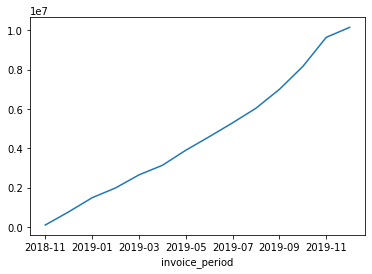

In [40]:
ax = invoice_period_agg['total_order_rev'].cumsum().plot()
ax.set_yscale('linear')
plt.show()


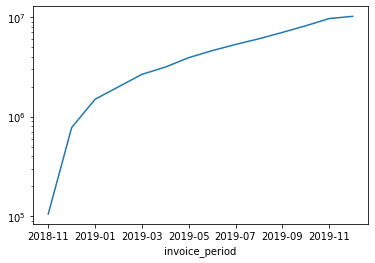

In [41]:
ax2 = invoice_period_agg['total_order_rev'].cumsum().plot()
ax2.set_yscale('log')
plt.show()

Conclusion:

The general trend is clearly a positive one during the all period.

In [42]:
# sort the table by each of the columns:
print('Sorted by number of total units in each month:')
sorted_by_units_invoice_period_agg = invoice_period_agg.sort_values(by='total_units',  ascending=False)
display(sorted_by_units_invoice_period_agg)


Sorted by number of total units in each month:


total_product_types  total_units  total_order_rev
invoice_period                                                   
2019-11                        2907       769207        1480865.9
2019-10                        2866       655542        1162194.6
2019-09                        2714       529774         957867.3
2019-08                        2584       438667         744911.6
2019-07                        2677       419082         706776.8
2019-01                        2559       411317         716245.8
2019-05                        2508       411031         764514.2
2019-03                        2447       372127         663374.3
2019-06                        2563       367992         687346.7
2018-12                        2686       299305         669860.5
2019-04                        2404       290456         486679.0
2019-02                        2342       276697         497858.5
2019-12                        2335       257315         507289.6
2018-11                        1589        57917         104988.6

Conclusion:

The invoice period with the highest units sold is 2019-11. 	769207 units were sold. (out of 2907 product types that were sold then and generated 1480865.9 for revenur rate)

In [43]:
print('Sorted by total revenue in each month:')
sorted_by_revs_invoice_period_agg = invoice_period_agg.sort_values(by='total_order_rev' ,  ascending=False)
display(sorted_by_revs_invoice_period_agg)


Sorted by total revenue in each month:


total_product_types  total_units  total_order_rev
invoice_period                                                   
2019-11                        2907       769207        1480865.9
2019-10                        2866       655542        1162194.6
2019-09                        2714       529774         957867.3
2019-05                        2508       411031         764514.2
2019-08                        2584       438667         744911.6
2019-01                        2559       411317         716245.8
2019-07                        2677       419082         706776.8
2019-06                        2563       367992         687346.7
2018-12                        2686       299305         669860.5
2019-03                        2447       372127         663374.3
2019-12                        2335       257315         507289.6
2019-02                        2342       276697         497858.5
2019-04                        2404       290456         486679.0
2018-11                        1589        57917         104988.6

Conclusion:

The invoice period with the highest revenue(for orders) sold is also 2019-11. Revenue of  1480865.9 was generated then.

In [44]:
print('Sorted by total product type in each month:')
sorted_by_product_type_invoice_period_agg = invoice_period_agg.sort_values(by='total_product_types',  ascending=False)
display(sorted_by_product_type_invoice_period_agg)

Sorted by total product type in each month:


total_product_types  total_units  total_order_rev
invoice_period                                                   
2019-11                        2907       769207        1480865.9
2019-10                        2866       655542        1162194.6
2019-09                        2714       529774         957867.3
2018-12                        2686       299305         669860.5
2019-07                        2677       419082         706776.8
2019-08                        2584       438667         744911.6
2019-06                        2563       367992         687346.7
2019-01                        2559       411317         716245.8
2019-05                        2508       411031         764514.2
2019-03                        2447       372127         663374.3
2019-04                        2404       290456         486679.0
2019-02                        2342       276697         497858.5
2019-12                        2335       257315         507289.6
2018-11                        1589        57917         104988.6

Conclusion:

The invoice period with the largest range of product sold is also 2019-11. 769207 units were sold, out of 2907 product types that were sold then and generated 1480865.9 for revenur rate)

Make sense if the if assortment have not change dramatically.

invoice_period  total_product_types  total_units  total_order_rev
0         2018-11                 1589        57917         104988.6
1         2018-12                 2686       299305         669860.5
2         2019-01                 2559       411317         716245.8
3         2019-02                 2342       276697         497858.5
4         2019-03                 2447       372127         663374.3
5         2019-04                 2404       290456         486679.0
6         2019-05                 2508       411031         764514.2
7         2019-06                 2563       367992         687346.7
8         2019-07                 2677       419082         706776.8
9         2019-08                 2584       438667         744911.6
10        2019-09                 2714       529774         957867.3
11        2019-10                 2866       655542        1162194.6
12        2019-11                 2907       769207        1480865.9
13        2019-12                 2335       257315         507289.6

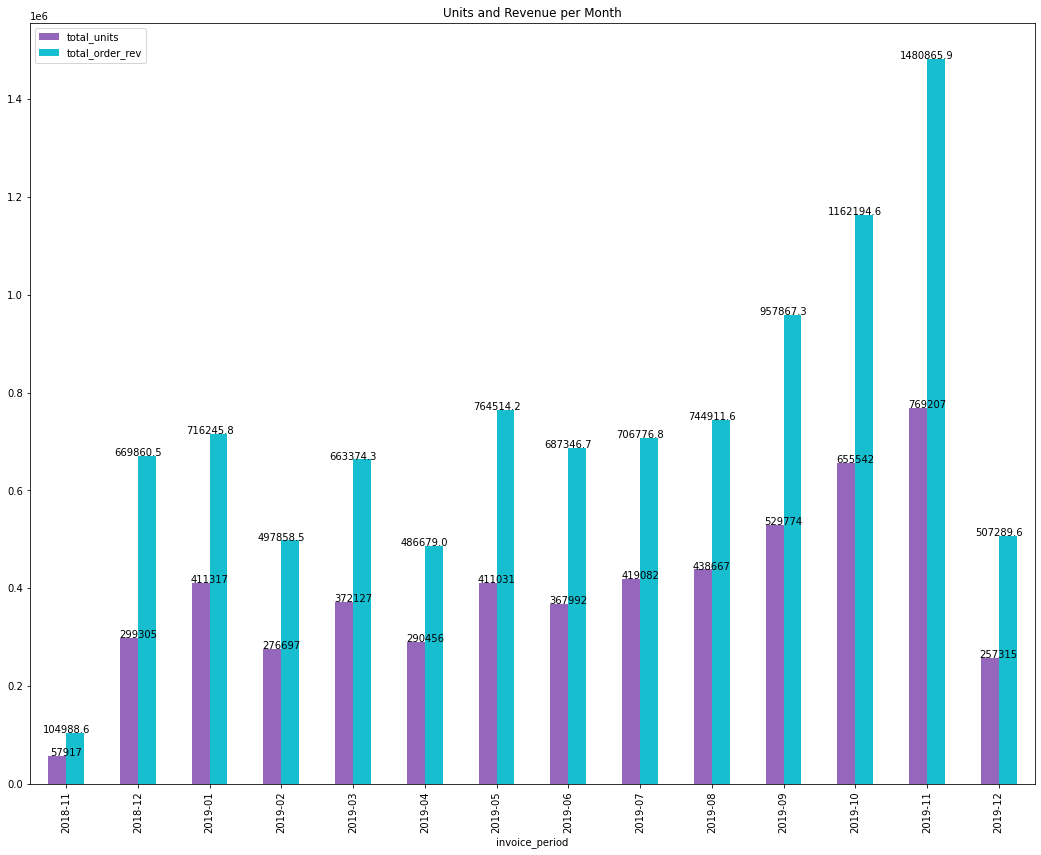

In [45]:
def add_value_label(x_list,y1_list, y2_list):
    for i in range(0, len(x_list)):
        plt.annotate(y1_list[i],(i,y1_list[i]),ha="center")
        plt.annotate(y2_list[i],(i,y2_list[i]),ha="center")


invoice_period_agg.reset_index(inplace=True)
invoice_period_agg.plot(x="invoice_period", y=["total_units", "total_order_rev"], kind="bar", color=["C4","C9"], title='Units and Revenue per Month', figsize= (18,14))
add_value_label(invoice_period_agg.invoice_period, invoice_period_agg.total_order_rev, invoice_period_agg.total_units,)
display(invoice_period_agg)

Conclusion:


The table and the bar above shows how November 2019 has the best sales considering all of three: units, range of product type and amount of generated profit (revenue) that were sold. 

The lowest goes to November 2018! interesting what is the reason to that conspicuous dramatic change.. 

<b id="-split">     

### Splitting products by category and finding: 
 - The leading categories regarding the number of items in each category 
 - The leading categories in sales

In [46]:
# Splitting products by category and finding the leading categories regarding the number of items in each category:

# Proportions of the various types of product
# leading product - most selling :

grouped_items=df.groupby(['category'])['description'].nunique().reset_index()
grouped_items.columns = ['item_category' , 'max_number_items']
display(grouped_items)

fig3 = px.pie(grouped_items, values=grouped_items.max_number_items, names=grouped_items.item_category,
              color=grouped_items.item_category,
color_discrete_map={'Sendo':'cyan', 'Tiki':'royalblue','Shopee':'darkblue'})
fig3.update_layout(
title="<b> Split by Categories</b>")

item_category  max_number_items
0              bags               208
1              bath                17
2             boxes               142
3   clothes/bedding                70
4        decoration               790
5            dishes               975
6        disposable                97
7       electronics                80
8         furniture               178
9             games                70
10           garden                19
11  holders/hangers               198
12          jewelry               291
13            other               539
14            party               227
15           school               104
16            tools                13

Conclusion:

The leading product category in number of items is dishes  (24.3%) with decoration coming second , follwed by decorations (19.7%). 
In other words, the category with the largest range of product is dishes! then decoration..

The category with the smallest range of product is tools with 13 items only!

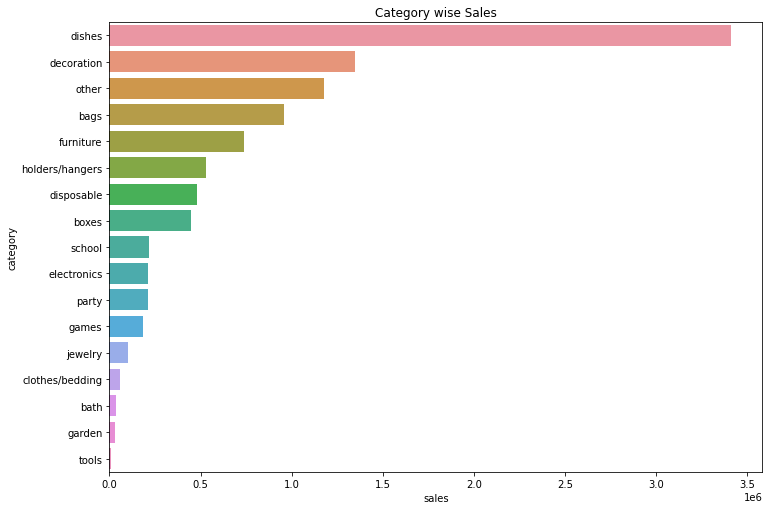

In [47]:
# Splitting products by category and finding the leading categories in sales:

df_item_sales=df.groupby(["category"])['tot_order'].sum().sort_values(ascending=False)
df_item_sales=df_item_sales.to_frame()
# Reset the index of dataframe
modified = df_item_sales.reset_index()
modified.rename(columns={'tot_order':'sales'}, inplace=True)

from matplotlib import pyplot
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = "sales",
            y = "category",
            data = modified)
plt.title("Category wise Sales")
plt.show()

Conclusion:


The leading product category in sales is also dishes with decoration coming second again and tools again last.

<b id="-selling">    

### Finding the top ten selling products:

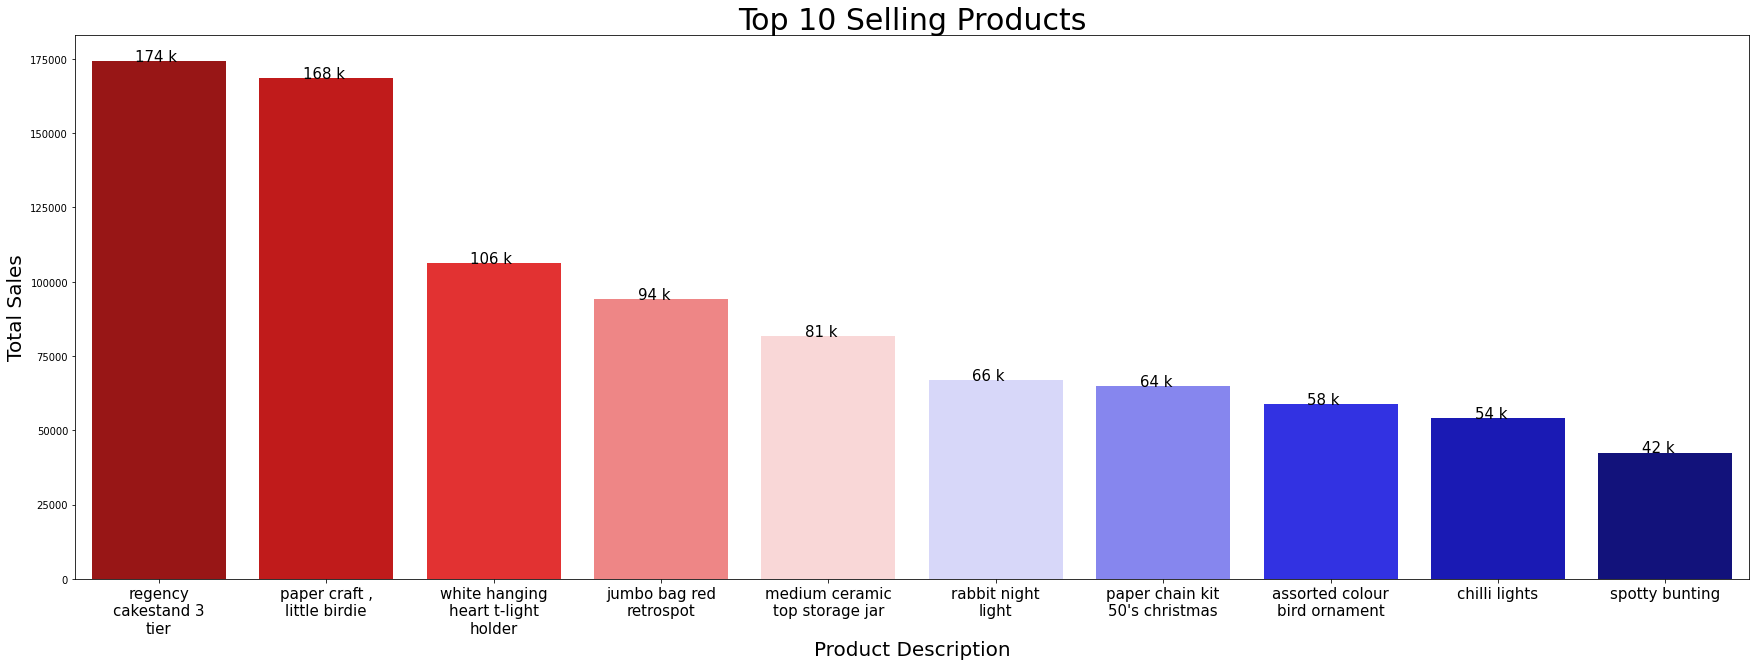

In [48]:
#import missingno as msno
from textwrap import wrap
# top selling items by sales
sales_order = df.groupby('description').sum()['tot_order'].nlargest(10)#description

plt.figure(figsize = (30,10))
ax = sns.barplot(x = sales_order.index, y = sales_order.values, palette = 'seismic_r')
ax.set_xlabel('Product Description', fontsize = 20)
ax.set_ylabel('Total Sales', fontsize = 20)
ax.set_title('Top 10 Selling Products', fontsize = 30)

labels = [ '\n'.join(wrap(l, 15)) for l in sales_order.index ]
ax.set_xticklabels(labels, fontsize = 15)

value_labels = []
for x in sales_order.values:
    value_labels.append(str(int(x/1000))+' k')

for p, label in zip(ax.patches, value_labels):
    ax.annotate(label, (p.get_x() + 0.26, p.get_height() + 2), fontsize = 15)
    

Conclusion:

The leading product in total sales  is cake-stand with paper little birdie coming second and hanging heart t-light holder coming third in sales ..

Jumbo bag, storage jar, rabbit night light , paper chain kit 50's christmas, assorted collo bird ornament, chilly light and spotty bounting are in the top ten as well.

<b id="-refunds">

###  Examining Refunds: by total amount and by frequency:  

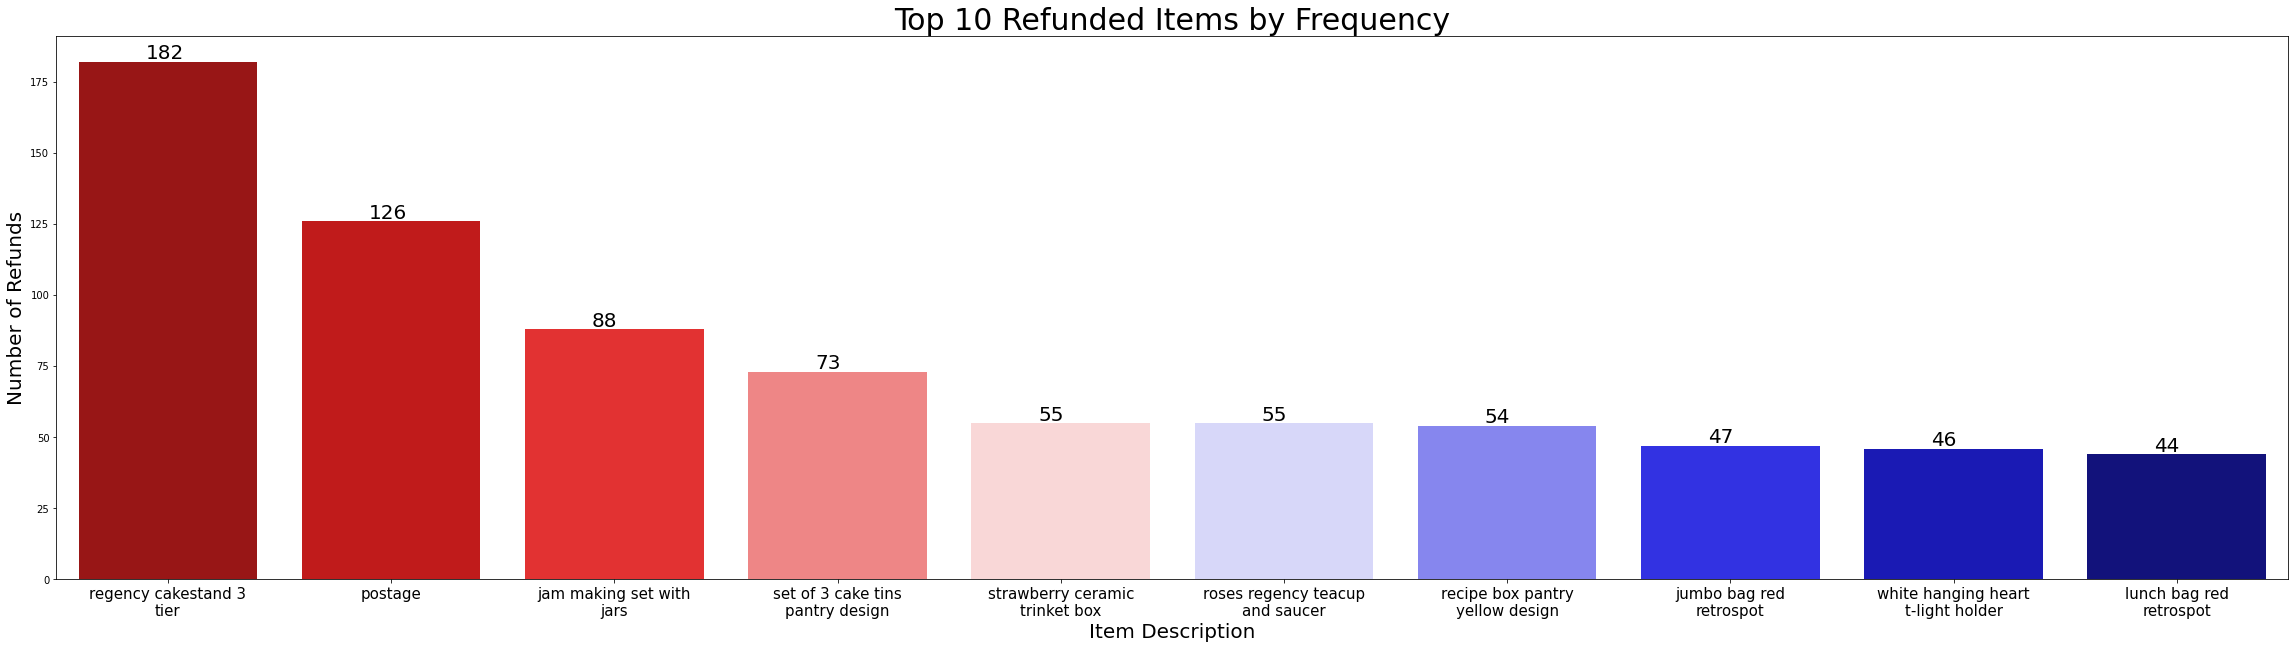

In [49]:
# Examining Refunds by total amount:  
# Refunds/Cancellations:
# Lets take a look at refunds and what the most frequent and largest refunds are.

refund_df = pd.concat([neg_zero_unit_price_df, refunds_df_cancelations])

plt.figure(figsize = (40,10))
ax = sns.barplot(x = refund_df['description'].value_counts().nlargest(10).index, y = refund_df['description'].value_counts().nlargest(10).values, palette = 'seismic_r')
ax.set_xlabel('Item Description', fontsize = 20)
ax.set_ylabel('Number of Refunds', fontsize = 20)
ax.set_title('Top 10 Refunded Items by Frequency', fontsize = 30)

labels = [ '\n'.join(wrap(l, 20)) for l in refund_df['description'].value_counts().nlargest(10).index ]
ax.set_xticklabels(labels, fontsize = 15)

for p, label in zip(ax.patches, refund_df['description'].value_counts().nlargest(10).values):
    ax.annotate(label, (p.get_x() + 0.3, p.get_height() + 1), fontsize = 20)

top_refund_amt = -refund_df.groupby('description').sum()['tot_order'].nsmallest(10)


Conclusion:



Surprisingly, Cake-stand also stars in the first place amont refunded items by frequency , followed by postage and jam making set with jars. 

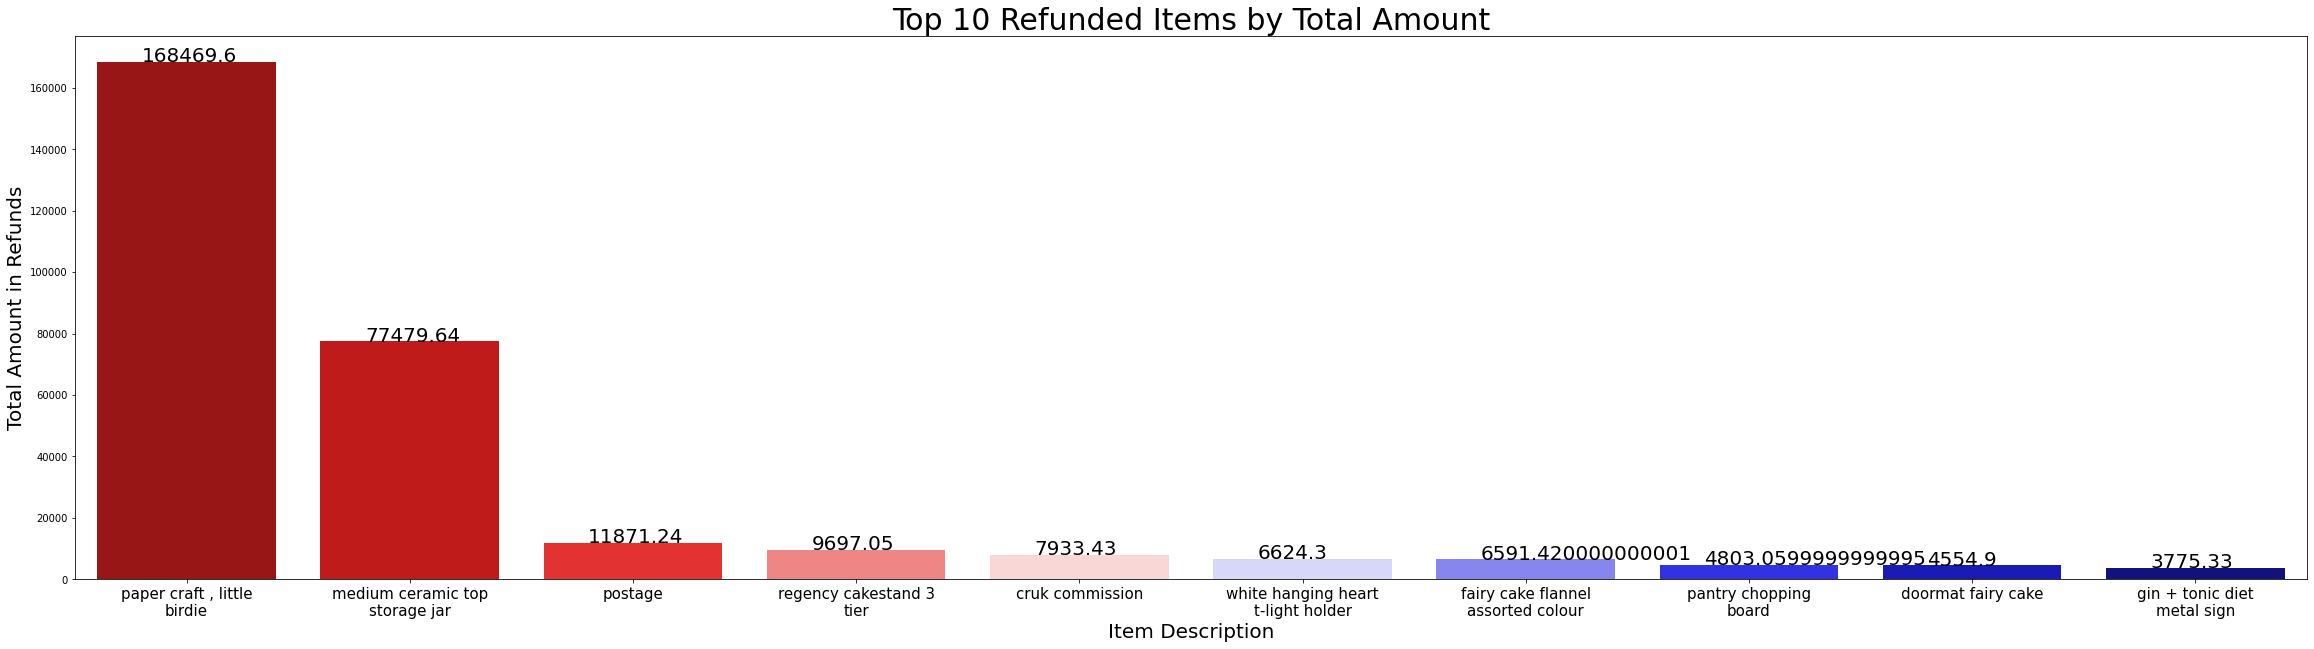

In [50]:
# Examining Refunds by total amount and by frequency:  
plt.figure(figsize = (40,10))
ax = sns.barplot(x = top_refund_amt.index, y = top_refund_amt.values, palette = 'seismic_r')
ax.set_xlabel('Item Description', fontsize = 20)
ax.set_ylabel('Total Amount in Refunds', fontsize = 20)
ax.set_title('Top 10 Refunded Items by Total Amount', fontsize = 30)

labels = [ '\n'.join(wrap(l, 20)) for l in top_refund_amt.index ]
ax.set_xticklabels(labels, fontsize = 15)

for p, label in zip(ax.patches, top_refund_amt.values):
    ax.annotate(label, (p.get_x() + 0.2, p.get_height() + 10), fontsize = 20)

Conclusions:

Paper craft, little birdie is in the first place amont refunded items by total amount. Postage moved to the third place here while medium ceramic top storage jar is in the second place instead!

In [51]:
large_refunds = refund_df['tot_order'].nsmallest(10).index
for refund in large_refunds:
    print(-refund_df.loc[refund]['quantity'], ' units of ', refund_df.loc[refund]['description'])#, ' refunded at ', -refund_df.loc[refund]['tot_order'])

80995  units of  paper craft , little birdie
74215  units of  medium ceramic top storage jar
1  units of  postage
3114  units of  fairy cake flannel assorted colour
1930  units of  white hanging heart t-light holder
670  units of  doormat fairy cake
756  units of  pantry chopping board
2000  units of  gin + tonic diet metal sign
1300  units of  tea time party bunting
318  units of  ivory diner wall clock


conclusion:

Above are the largest refunds products with their names and number of units..

In [52]:
# Adding 
#df['month'] = df['invoice_date'].dt.month_name()
#df['year'] = df['invoice_date'].dt.year

#df['month_year'] = pd.to_datetime(df['birth_date']).dt.to_period('M')
#df['month'] = pd.DatetimeIndex(df['invoice_date']).month
#display(df.head())

<b id="-recommender">


## Product Bundle(Basket) Analysis and Recommender System:

   * Create a basket for each transaction (invoice) and study the popullarity for products to appear (in any transaction/invoice) as well as for their different combinations by using Apriori Algorithm
   * Calculate other Basket metrics using association_rule method in order to realize how to expand sails in the basket level by recommending additional products
   * Studying product similarities in order to realize how to mantain and increase profits (in a basket level) by recommanding sustitutional/interchangable products    
  


<b id="-recommender">

**Support** - popularity of the item overall.To calculate support we need to take all transactions that included item, count them and then divide by the total number of transactions (popularity in the basket).

**Condfidence** - is the probability that a item 2 will be bought together with item 1. <br>
To calculate confidence we take all the transactions when to items were sold together and then divide their number by the number of transactions that had item 1. 

basket - purchase wise get rules of what items are boought together,, what  popular items, what items increase the chances of other items been bought  , or general what to reccomand base on what is already boght (appriori and assosiate. statistic relationships of items) recommed what  recommend base on similarity of what you bought. 

In [54]:
# how many transactions - purchases we have: 19780


<b id="-basket">  

### Create a basket for each transaction (invoice) and study the popullarity for products to appear (in any transaction/invoice) as well as for their different combinations by using Apriori Algorithm


In [55]:
# Group data by transaction and item to calculate how many transactions had our item of interest. creating a basket to each transaction.
purchases_df = df.groupby(['invoice_no', 'item'])['item'].count().reset_index(name ='count')
# in order to realize for any purchase/transaction (invoice_no)  count how many items were bought in each order.
#this is a general df, we will use it for the algorythm itself as well. 

display(purchases_df)
print()
display()
purchases_df.describe()

invoice_no                                 item  count
0          536365                 babushka nesting box      1
1          536365        cream cupid heart coat hanger      1
2          536365            glass star frosted holder      1
3          536365                 hanging heart holder      1
4          536365  knitted union flag hot water bottle      1
...           ...                                  ...    ...
489601     581587              circus parade lunch box      1
489602     581587                 pack spaceboy napkin      1
489603     581587            plaster tin circus parade      1
489604     581587                plaster tin strongman      1
489605     581587                   spaceboy lunch box      1

[489606 rows x 3 columns]

count
count  489606.000000
mean        1.063141
std         0.326747
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        24.000000

Conclusion:

There are 489668 rows meaning there are 489668 purchases!

In [56]:
# First of all we need to create a basket for each transaction/ purchase.

basket_df = (purchases_df
          .groupby(['invoice_no', 'item'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('invoice_no'))

display(basket_df.sample(10))

item        abc treasure book box  abstract circle journal  \
invoice_no                                                   
575360                        0.0                      0.0   
572616                        0.0                      0.0   
539645                        0.0                      0.0   
553527                        0.0                      0.0   
538101                        0.0                      0.0   
578150                        0.0                      0.0   
540953                        0.0                      0.0   
544064                        0.0                      0.0   
546748                        0.0                      0.0   
545928                        0.0                      0.0   

item        abstract circle pocket book  abstract circle sketchbook  \
invoice_no                                                            
575360                              0.0                         0.0   
572616                              0.0                         0.0   
539645                              0.0                         0.0   
553527                              0.0                         0.0   
538101                              0.0                         0.0   
578150                              0.0                         0.0   
540953                              0.0                         0.0   
544064                              0.0                         0.0   
546748                              0.0                         0.0   
545928                              0.0                         0.0   

item        acrylic faceted bangle  acrylic geometric lamp  \
invoice_no                                                   
575360                         0.0                     0.0   
572616                         0.0                     0.0   
539645                         0.0                     0.0   
553527                         0.0                     0.0   
538101                         0.0                     0.0   
578150                         0.0                     0.0   
540953                         0.0                     0.0   
544064                         0.0                     0.0   
546748                         0.0                     0.0   
545928                         0.0                     0.0   

item        acrylic hanging jewel  acrylic jewel angel  acrylic jewel icicle  \
invoice_no                                                                     
575360                        0.0                  0.0                   0.0   
572616                        0.0                  0.0                   0.0   
539645                        0.0                  0.0                   0.0   
553527                        0.0                  0.0                   0.0   
538101                        0.0                  0.0                   0.0   
578150                        0.0                  0.0                   0.0   
540953                        0.0                  0.0                   0.0   
544064                        0.0                  0.0                   0.0   
546748                        0.0                  0.0                   0.0   
545928                        0.0                  0.0                   0.0   

item        acrylic jewel snowflake  ...  zinc holder star  \
invoice_no                           ...                     
575360                          0.0  ...               0.0   
572616                          0.0  ...               0.0   
539645                          0.0  ...               0.0   
553527                          0.0  ...               0.0   
538101                          0.0  ...               0.0   
578150                          0.0  ...               0.0   
540953                          0.0  ...               0.0   
544064                          0.0  ...               0.0   
546748                          0.0  ...               0.0   
545928        

In [57]:
# Since it doesn't matter to us how many items were bought, just the fact that the item was bought in the transactions, use the following 
# function to turn numerical to categorical(1 or 0. exist in basket or not. to calculate probab..)

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket_df.applymap(encode_units)# 19780 
display(basket_sets)# all optional item sets. for later..comb for appriori use

item        abc treasure book box  abstract circle journal  \
invoice_no                                                   
536365                          0                        0   
536366                          0                        0   
536367                          0                        0   
536368                          0                        0   
536369                          0                        0   
...                           ...                      ...   
581583                          0                        0   
581584                          0                        0   
581585                          0                        0   
581586                          0                        0   
581587                          0                        0   

item        abstract circle pocket book  abstract circle sketchbook  \
invoice_no                                                            
536365                                0                           0   
536366                                0                           0   
536367                                0                           0   
536368                                0                           0   
536369                                0                           0   
...                                 ...                         ...   
581583                                0                           0   
581584                                0                           0   
581585                                0                           0   
581586                                0                           0   
581587                                0                           0   

item        acrylic faceted bangle  acrylic geometric lamp  \
invoice_no                                                   
536365                           0                       0   
536366                           0                       0   
536367                           0                       0   
536368                           0                       0   
536369                           0                       0   
...                            ...                     ...   
581583                           0                       0   
581584                           0                       0   
581585                           0                       0   
581586                           0                       0   
581587                           0                       0   

item        acrylic hanging jewel  acrylic jewel angel  acrylic jewel icicle  \
invoice_no                                                                     
536365                          0                    0                     0   
536366                          0                    0                     0   
536367                          0                    0                     0   
536368                          0                    0                     0   
536369                          0                    0                     0   
...                           ...                  ...                   ...   
581583                          0                    0                     0   
581584                          0                    0                     0   
581585                          0                    0                     0   
581586                          0                    0                     0   
581587                          0                    0                     0   

item        acrylic jewel snowflake  ...  zinc holder star  \
invoice_no                           ...                     
536365                            0  ...                 0   
536366                            0  ...                 0   
536367                            0  ...                 0   
536368                            0  ...                 0   
536369                            0  ...         

Now , this basket can be passed to apriori algorithm that can calculate support for all items and their combinations.
This algorithm requires to define min_support which is the minimum support that we consider. 
Let's define low min_support which means that only items and combinations that appeared at least 3% of a time will be included.
    
 **Note**: min_support in apriori will later influence our other calculations, it's ok to set lower min_support, but to have more combinations later    

Appriori returns items and pairs of items sorted by support .

Appriori calculates 'support' values for all product and their combinations. (all possible combinations (baskets sets) in a basket)

analayzing basket look in every purchase..(weather we have x in basket-purchases or not. (and not how many..) 
Thus, Appriori help to find the (strong) and weak links then use Association Rule to uplift sales 

In [58]:
frequent_itemsets = apriori(basket_sets, min_support=0.03, use_colnames=True)
frequent_itemsets.sort_values(by='support',ascending=False)
# min_support of 3% means that item appeared on atleast 3% of buskets


support                      itemsets
47   0.127098        (hanging heart holder)
53   0.108342                (heart wicker)
10   0.105763               (bag retrospot)
101  0.100556      (regency cakestand tier)
0    0.087664        (alarm clock bakelike)
..        ...                           ...
78   0.030384     (pack dinosaur cake case)
35   0.030334         (doormat new england)
26   0.030334  (childrens cutlery polkadot)
8    0.030081                    (bag pear)
90   0.030030           (pencil tube skull)

[144 rows x 2 columns]

Appriori returns items and pairs of items sorted by support 

Appriori calculates 'support' values for all product and their combinations. (all possible combinations (baskets sets) in a basket)

analayzing basket look in every purchase..(weather we have x in basket-purchases or not. (and not how many..) 
Thus, Appriori help to find the (strong) and weak links then use Association Rule to uplift sales 

In [59]:
# support for x: (subsetting)count number of purchases that has x in it then devide it by num of total purchases there are
# the result of suport is the share of baskets with the item.

print('The top leading products regarding support:')
display(frequent_itemsets.sort_values(by='support', ascending=False).head(20))


The top leading products regarding support:


support                          itemsets
47   0.127098            (hanging heart holder)
53   0.108342                    (heart wicker)
10   0.105763                   (bag retrospot)
101  0.100556          (regency cakestand tier)
0    0.087664            (alarm clock bakelike)
69   0.079070             (lunch bag retrospot)
2    0.073559          (assorted bird ornament)
96   0.071183                  (popcorn holder)
23   0.070020          (cake tin pantry design)
81   0.066734        (pack retrospot cake case)
72   0.064965           (lunch bag suki design)
70   0.064358                 (lunch bag skull)
77   0.063145  (natural slate heart chalkboard)
9    0.061577                    (bag polkadot)
119  0.059858                (storage bag suki)
113  0.059403         (shopper vintage paisley)
61   0.058746              (jam making printed)
86   0.058645       (paper chain kit christmas)
71   0.058493       (lunch bag spaceboy design)
66   0.058140                   (lunch bag car)

Conclusion:

Hanging heart holder appears in 12.7% of the baskets, heart wicker appears in 10.8%, bag retrospot in 10.5% and regency cakestand tier with 10% etc..

Those are the 20 leading popular products (support wize): 

hanging heart holder, heart wicker, bag retrospot, regency cakestand tier, alarm clock bakelike, lunch bag retrospot, assorted bird ornament, popcorn holder, cake tin pantry design, pack retrospot cake case, lunch bag suki design, lunch bag skull,natural slate heart chalkboard, bag polkadot, storage bag suki, shopper vintage paisley, jam making printed, paper chain kit christmas, lunch bag spaceboy design, lunch bag car.  

In [60]:
print('The least  popular products regarding support:')

# Creating a list of unpopular items (regarding 'support') in order to treat them later on..
unpopular_product_list = ['pencil tube skull', 'bag pear', 'doormat new england', 'childrens cutlery polkadot', 'pack dinosaur cake case', 'hanging heart zinc holder', 'edwardian parasol', 'lunch bag retrospot', 'lunch bag polkadot', 'vintage head tail card game', 'hot bath metal sign',' traditional knitting nancy' ,'wicker star', 'paper chain kit retrospot', 'vintage christmas napkin', 'stripe ceramic drawer knob',
'bread bin diner style', 'sweetheart fairy cake case', 'doormat union flag', 'cream felt craft trinket box' , 'cake case vintage christmas']

display(frequent_itemsets.sort_values(by='support',ascending=True).head(20))

The least  popular products regarding support:


support                                   itemsets
90   0.030030                        (pencil tube skull)
8    0.030081                                 (bag pear)
35   0.030334                      (doormat new england)
26   0.030334               (childrens cutlery polkadot)
78   0.030384                  (pack dinosaur cake case)
49   0.030485                (hanging heart zinc holder)
38   0.030586                        (edwardian parasol)
140  0.030637  (lunch bag polkadot, lunch bag retrospot)
129  0.030738              (vintage head tail card game)
56   0.030789                      (hot bath metal sign)
126  0.030789               (traditional knitting nancy)
131  0.030789                              (wicker star)
87   0.030839                (paper chain kit retrospot)
128  0.030839                 (vintage christmas napkin)
122  0.030940               (stripe ceramic drawer knob)
20   0.030991                    (bread bin diner style)
123  0.031092               (sweetheart fairy cake case)
37   0.031143                       (doormat union flag)
31   0.031143             (cream felt craft trinket box)
22   0.031294              (cake case vintage christmas)

Conclusion:

Those are the 20 least leading ones: 

pencil tube skull, bag pear, doormat new england, childrens cutlery polkadot, pack dinosaur cake case, hanging heart zinc holder, edwardian parasol, lunch bag retrospot, lunch bag polkadot, vintage head tail card game, hot bath metal sign, traditional knitting nancy ,wicker star, paper chain kit retrospot, vintage christmas napkin, stripe ceramic drawer knob,
bread bin diner style, sweetheart fairy cake case, doormat union flag, cream felt craft trinket box and cake case vintage christmas.

All of them with popularity rate('support' value) of 3% in baskets. 

<b id="-additional">

### Calculate other Basket metrics using association_rule method in order to realize how to expand sails in the basket level by recommending additional products:

 **Lift** - in what ratio is the purchase of items bought together is more likely than separately?

General rule of thumb for lift:
- If lift>1 than products have high chance to be bough together and "uplift" each other <br> 
- If lift=1 than products don't really influence each other <br> 
- If lift<1 than products there is no connection between products<br> 

In [61]:
# calculating it to combination of items and their lift - to find the top comb which lift each other up..
# sort by confidence in descending order:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)#48 sec
rules.sort_values('confidence', ascending = False, inplace = True)
display(rules.head(10))

antecedents                   consequents  \
14  (rose regency teacup saucer)       (regency teacup saucer)   
15       (regency teacup saucer)  (rose regency teacup saucer)   
1                 (bag polkadot)               (bag retrospot)   
5             (storage bag suki)               (bag retrospot)   
3      (shopper vintage paisley)               (bag retrospot)   
8           (lunch bag polkadot)         (lunch bag retrospot)   
13       (lunch bag suki design)         (lunch bag retrospot)   
11             (lunch bag skull)         (lunch bag retrospot)   
12         (lunch bag retrospot)       (lunch bag suki design)   
10         (lunch bag retrospot)             (lunch bag skull)   

    antecedent support  consequent support   support  confidence       lift  \
14            0.053893            0.058038  0.041709    0.773921  13.334635   
15            0.058038            0.053893  0.041709    0.718641  13.334635   
1             0.061577            0.105763  0.041709    0.677340   6.404294   
5             0.059858            0.105763  0.036603    0.611486   5.781646   
3             0.059403            0.105763  0.034378    0.578723   5.471869   
8             0.055106            0.079070  0.030637    0.555963   7.031301   
13            0.064965            0.079070  0.033064    0.508949   6.436713   
11            0.064358            0.079070  0.032406    0.503535   6.368236   
12            0.079070            0.064965  0.033064    0.418159   6.436713   
10            0.079070            0.064358  0.032406    0.409847   6.368236   

    leverage  conviction  
14  0.038581    4.166519  
15  0.038581    3.362635  
1   0.035196    2.771451  
5   0.030272    2.301687  
3   0.028095    2.122683  
8   0.026280    2.073996  
13  0.027927    1.875428  
11  0.027318    1.854975  
12  0.027927    1.607028  
10  0.027318    1.585422

Here we see on top our "pair" Toast and Coffee, and their metrics. Let's take a look at them one more time and get to know some new metrics: <br>
- **antecedents** - means the "if" part of the sentence "IF I buy 'roses regency teacup and saucer , pink regenc.'(Toast),..." <br>
- **consequents** -  "then" part of the sentence "...,then the probability of buying 'green regency teacup and saucer'(Coffee..."- is confidence(90%
- **antecedent/consequent support** -  corresponding supports of the items. Do not change depending on the pair.
- **leverage** - another measure of independence. leverage=0 equals 0 independence
- **conviction** - Similar as lift, but means that consequent is highly depending on the antecedent. Rules of thumb the same as for lift

Conclusions :

The highest confidence  77.4% of the baskets goes to: 'rose regency teacup saucer'	and 'regency teacup saucer'. meaning that if a customer buys a rose regency teacup saucer 77.4% that he'll also buy regency teacup saucer. 
Their total support is 4.1% , antecedent support (of the first) is 5.3% ,consequent support (of the last) is 5.8%. 
This pair has the highest lift (13.3%) meaning that buying the first uplift the prop of buying the other. 
  
Another pair with  pretty high confidence of 67.7% of the baskets is: 'bag polkadot' and 'storage bag suki'. meaning that if a customer buys a bag polkadot 67.7% that he'll also buy regency storage bag suki. 
Their total support is 4.1% , antecedent support (of the first) is 6.1% ,consequent support (of the last) is 10.5%. 
This pair also has the high lift (6.4%) meaning that buying the first uplift the prop of buying the other. 
Lift is the ratio that the products are bought together more likely than seperately. (Lift(x+y) = (Confidence (x+y))/(Support (x)))

Note : The order may change the reasult: for example 'support same, 'confidece' values chage when changing the order of items.
Yet the overall support does not change and nither does the lift (since the setting here is to keep the higher in this case)


 meaning:if i buy y how purchase of it uplift the prop of buying of x
 That means that the ratio of increase of Coffe sales if Toast is bought is  0.1, which means that it doesn't matter to "Coffee" whether it's sold alone or together with toast

  conf_coffee_toast/sup_cofee. if low it wouldnt uplift coffee
 That means that the ratio of increase of Coffe sales if Toast is bought is  0.1, which means that it doesn't matter to "Coffee" wheth        
        

Association Rules vs Recommender System: ( here, Similarity System specificly)  

While the first allow expanding the basket and understand how to increse sales of an item knowing the item that already exist in the basket, the last detect similar items (in the basket) which "behaves" the same way , thus maximizing profit. 

The  first can be used for suggesting additional items while the last can be used for applying the same marketing strategies to similar items in the basket or suggesting simmilar items whem a specific wanted item is missing (the business is ruuning out of it)  

In other words, adding additional items vs interchangable items in basket. 

 we can reccommend 'green regency teacup and saucer' wheever we sell :roses regency teacup and saucer , pink regenc..., green regency teacup and saucer, pink regency.., pink regency teacup and saucer). leverage not high -do not influence the overall no of transactions. you can look vice versa . (support same, confidece - changes, lift - same cause they keep the highlift, conviction -1 - no rela

<b id="-interchangable">


### Studying product similarities in order to realize how to mantain and increase profits (in a basket level) by recommanding sustitutional/interchangable products:


In [62]:
# recommendder system-Similiarity: cosine similary(there aaaere diffrent kinds than that.)

basket_new_df=basket_df
basket_new_df = basket_new_df.fillna(0).reset_index()
basket_new_df=basket_new_df.drop('invoice_no', axis=1)
basket_new_df

item   abc treasure book box  abstract circle journal  \
0                        0.0                      0.0   
1                        0.0                      0.0   
2                        0.0                      0.0   
3                        0.0                      0.0   
4                        0.0                      0.0   
...                      ...                      ...   
19775                    0.0                      0.0   
19776                    0.0                      0.0   
19777                    0.0                      0.0   
19778                    0.0                      0.0   
19779                    0.0                      0.0   

item   abstract circle pocket book  abstract circle sketchbook  \
0                              0.0                         0.0   
1                              0.0                         0.0   
2                              0.0                         0.0   
3                              0.0                         0.0   
4                              0.0                         0.0   
...                            ...                         ...   
19775                          0.0                         0.0   
19776                          0.0                         0.0   
19777                          0.0                         0.0   
19778                          0.0                         0.0   
19779                          0.0                         0.0   

item   acrylic faceted bangle  acrylic geometric lamp  acrylic hanging jewel  \
0                         0.0                     0.0                    0.0   
1                         0.0                     0.0                    0.0   
2                         0.0                     0.0                    0.0   
3                         0.0                     0.0                    0.0   
4                         0.0                     0.0                    0.0   
...                       ...                     ...                    ...   
19775                     0.0                     0.0                    0.0   
19776                     0.0                     0.0                    0.0   
19777                     0.0                     0.0                    0.0   
19778                     0.0                     0.0                    0.0   
19779                     0.0                     0.0                    0.0   

item   acrylic jewel angel  acrylic jewel icicle  acrylic jewel snowflake  \
0                      0.0                   0.0                      0.0   
1                      0.0                   0.0                      0.0   
2                      0.0                   0.0                      0.0   
3                      0.0                   0.0                      0.0   
4                      0.0                   0.0                      0.0   
...                    ...                   ...                      ...   
19775                  0.0                   0.0                      0.0   
19776                  0.0                   0.0                      0.0   
19777                  0.0                   0.0                      0.0   
19778                  0.0                   0.0                      0.0   
19779                  0.0                   0.0                      0.0   

item   ...  zinc holder star  zinc metal heart decoration  \
0      ...               0.0                          0.0   
1      ...               0.0                          0.0   
2      ...               0.0                          0.0   
3      ...               0.0                          0.0   
4      ...               0.0                          0.0   
...    ...               ...                          ...   
19775  ...               0.0                          0.0   
19776  ...               0.0                          0.0   
19777  ...               1.0                          0.0   
19778  ...               0

In [63]:
co_matrix = basket_new_df.T.dot(basket_new_df)
np.fill_diagonal(co_matrix.values, 0)
display(co_matrix)#looking for same pattern. complementary items. give back items behave 

item                              abc treasure book box  \
item                                                      
abc treasure book box                               0.0   
abstract circle journal                             3.0   
abstract circle pocket book                         3.0   
abstract circle sketchbook                          2.0   
acrylic faceted bangle                              1.0   
...                                                 ...   
zinc sweetheart wire letter rack                    4.0   
zinc top door wooden shelf                          0.0   
zinc willie winkie candle stick                    14.0   
zinc wire kitchen organiser                         0.0   
zinc wire sweetheart letter tray                    0.0   

item                              abstract circle journal  \
item                                                        
abc treasure book box                                 3.0   
abstract circle journal                               0.0   
abstract circle pocket book                           8.0   
abstract circle sketchbook                           13.0   
acrylic faceted bangle                                3.0   
...                                                   ...   
zinc sweetheart wire letter rack                      3.0   
zinc top door wooden shelf                            2.0   
zinc willie winkie candle stick                      16.0   
zinc wire kitchen organiser                           0.0   
zinc wire sweetheart letter tray                      0.0   

item                              abstract circle pocket book  \
item                                                            
abc treasure book box                                     3.0   
abstract circle journal                                   8.0   
abstract circle pocket book                               0.0   
abstract circle sketchbook                                8.0   
acrylic faceted bangle                                    0.0   
...                                                       ...   
zinc sweetheart wire letter rack                          1.0   
zinc top door wooden shelf                                0.0   
zinc willie winkie candle stick                           0.0   
zinc wire kitchen organiser                               1.0   
zinc wire sweetheart letter tray                          0.0   

item                              abstract circle sketchbook  \
item                                                           
abc treasure book box                                    2.0   
abstract circle journal                                 13.0   
abstract circle pocket book                              8.0   
abstract circle sketchbook                               0.0   
acrylic faceted bangle                                   4.0   
...                                                      ...   
zinc sweetheart wire letter rack                         4.0   
zinc top door wooden shelf                               1.0   
zinc willie winkie candle stick                          7.0   
zinc wire kitchen organiser                              1.0   
zinc wire sweetheart letter tray                         0.0   

item                              acrylic faceted bangle  \
item                                                       
abc treasure book box                                1.0   
abstract circle journal                              3.0   
abstract circle pocket book                          0.0   
abstract circle sketchbook                           4.0   
acrylic faceted bangle                               0.0   
...                                                  ...   
zinc sweetheart wire letter rack                     1.0   
zinc top door wooden shelf                           0.0   
zinc willie winkie candle stick                      5.0   
zinc wire kitchen organiser                          0.0   
zinc wire sweetheart letter tray       

In [64]:
cos_score_df = pd.DataFrame(cosine_similarity(co_matrix))
cos_score_df.index = co_matrix.index
cos_score_df.columns = np.array(co_matrix.index)

In [65]:
cos_score_df=cos_score_df.reset_index()
display(cos_score_df)

item  abc treasure book box  \
0                abc treasure book box               1.000000   
1              abstract circle journal               0.762992   
2          abstract circle pocket book               0.659806   
3           abstract circle sketchbook               0.878119   
4               acrylic faceted bangle               0.798555   
...                                ...                    ...   
3369  zinc sweetheart wire letter rack               0.839221   
3370        zinc top door wooden shelf               0.520867   
3371   zinc willie winkie candle stick               0.896895   
3372       zinc wire kitchen organiser               0.714187   
3373  zinc wire sweetheart letter tray               0.734308   

      abstract circle journal  abstract circle pocket book  \
0                    0.762992                     0.659806   
1                    1.000000                     0.553483   
2                    0.553483                     1.000000   
3                    0.799892                     0.688020   
4                    0.845988                     0.537734   
...                       ...                          ...   
3369                 0.744984                     0.623153   
3370                 0.752609                     0.352715   
3371                 0.899037                     0.626958   
3372                 0.634724                     0.543241   
3373                 0.627835                     0.533520   

      abstract circle sketchbook  acrylic faceted bangle  \
0                       0.878119                0.798555   
1                       0.799892                0.845988   
2                       0.688020                0.537734   
3                       1.000000                0.837609   
4                       0.837609                1.000000   
...                          ...                     ...   
3369                    0.820580                0.741398   
3370                    0.576343                0.604576   
3371                    0.916499                0.868327   
3372                    0.706123                0.634783   
3373                    0.702366                0.619502   

      acrylic geometric lamp  acrylic hanging jewel  acrylic jewel angel  \
0                   0.488784               0.559717             0.075073   
1                   0.739861               0.481319             0.077788   
2                   0.322897               0.461534             0.037573   
3                   0.553598               0.572814             0.061842   
4                   0.614678               0.482197             0.068623   
...                      ...                    ...                  ...   
3369                0.472525               0.561060             0.066454   
3370                0.803510               0.375528             0.024719   
3371                0.648278               0.589635             0.069108   
3372                0.417690               0.488422             0.045492   
3373                0.397646               0.490441             0.060996   

      acrylic jewel icicle  ...  zinc holder star  \
0                 0.574882  ...          0.876524   
1                 0.604186  ...          0.784833   
2                 0.468584  ...          0.635645   
3                 0.622530  ...          0.853176   
4                 0.561504  ...          0.787369   
...                    ...  ...               ...   
3369              0.564573  ...          0.894616   
3370              0.457617  ...          0.539829   
3371              0.661582  ...          0.903024   
3372              0.488976  ...          0.740743   
3373              0.510000  ...          0.754474   

      zinc metal heart decoration  zinc plant pot holder  zinc star holder  \
0                        0.836501               0.101545          0.844425   
1                        0.804165               0.052515          0.748583   
2  

In [66]:
#creating recommender system: items that behave the same as.. 

display(cos_score_df[cos_score_df.item=='cake case vintage christmas'].T)

def find_top_in(check):
    subset=cos_score_df[cos_score_df.filtered_corpus==check]
    subset=subset.T.reset_index()
    subset.columns=['pairs','correlation']
    #removing item itself from dataset
    subset=subset[subset.correlation!=check]
    subset=subset[subset.pairs!=check]
    subset_top=subset.sort_values(by='correlation',ascending=False).head(10)
    return subset_top


#for product in df['description'].values:
#    find_top_in(product)
# pencil tube skull, bag pear, doormat new england, childrens cutlery polkadot, pack dinosaur cake case, hanging heart zinc holder, edwardian parasol, lunch bag retrospot, lunch bag polkadot, vintage head tail card game, hot bath metal sign, traditional knitting nancy ,wicker star, paper chain kit retrospot, vintage christmas napkin, stripe ceramic drawer knob,
# bread bin diner style, sweetheart fairy cake case, doormat union flag, cream felt craft trinket box and cake case vintage christmas.

#All of them with popularity rate('support' value) of 3% in baskets.

357
item                              cake case vintage christmas
abc treasure book box                                0.893556
abstract circle journal                              0.782481
abstract circle pocket book                          0.668134
abstract circle sketchbook                           0.909834
...                                                       ...
zinc sweetheart wire letter rack                     0.822014
zinc top door wooden shelf                           0.572785
zinc willie winkie candle stick                      0.928882
zinc wire kitchen organiser                          0.718695
zinc wire sweetheart letter tray                     0.724716

[3375 rows x 1 columns]

Conclusion:

The online store can use this function to find the top 10 products that resamble items which are missing or to imply marketing strategy on them.. (Perhaps for some of the product with the lowest support or the ones we consider unpopular for other reasons)

For example one of the product with the lowest support is cake case vintage christmas when applying the function on this it returns product product with similar behavior. 'abc treasure book box' is the one that resamble it the  most. 


<b id="-market"> 

## Product Market Values Analysis:

   * Calculate product recency-frequency-monetary (RFM Metrics)
   * Study product RFM distributions (in order to determine the segmentation split
   * Categorize products based on RFM frame
   * Charactarize the product clusters based on R, F and M scores   

<b id="-market">

<b id="-rfm">    

### Calculate product recency-frequency-monetary (RFM Metrics):

In [68]:
# Determine recency:
from datetime import date
today=date.today()
display(today)


import datetime as dt
NOW=dt.datetime(2019,12,8)# 2018-11-29   2019-12-07

datetime.date(2022, 5, 6)

datetime.datetime(2019, 12, 8, 0, 0)

In [87]:
# Calculating recency, frequency and monetary for each item (using the filtered corpus):
rfm=df.groupby('item').agg({
    'invoice_date': lambda x: (NOW-x.max()).days, # last date of purchase for product. max date for product 
    'stock_code': 'count', #nuinque #invoice_no
    'unit_price':'sum'
}).reset_index()

rfm.rename(columns=
                    {'invoice_date':'recency',
                    'stock_code':'frequency',
                   'unit_price':'monetary'},inplace=True)


display(rfm.describe())
display(rfm.info())

recency    frequency      monetary
count  3374.000000  3374.000000   3374.000000
mean     47.165086   154.273859    506.596151
std      89.824118   235.056359   1142.073889
min       1.000000     1.000000      0.004000
25%       1.000000    18.250000     40.247500
50%       3.000000    77.000000    154.365000
75%      33.000000   196.000000    505.242500
max     374.000000  3865.000000  28091.260000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3374 entries, 0 to 3373
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   item       3374 non-null   object 
 1   recency    3374 non-null   int64  
 2   frequency  3374 non-null   int64  
 3   monetary   3374 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 105.6+ KB


None

Conclusion:

There  3374 4ows and 4 columns. no missing values or duplicates

description-product	recency	frequency	monetary_value
recency - how many days passed since the last purchase. min:1, max: 374, mean:47.16.
frequency - how often the product is bought. min:1,  max: 3865, mean:154.27.
monetary -  how much money the product produced. min : 0.004, max: 28091, mean: 506.60. 


<b id="-split">   

### Study product RFM distributions (in order to determine the segmentation split):

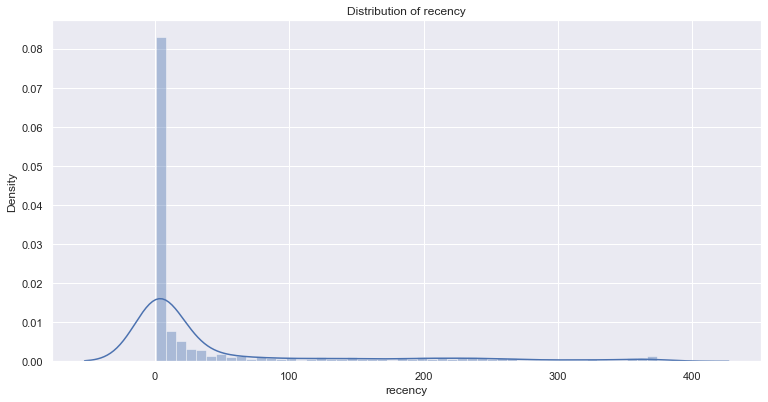

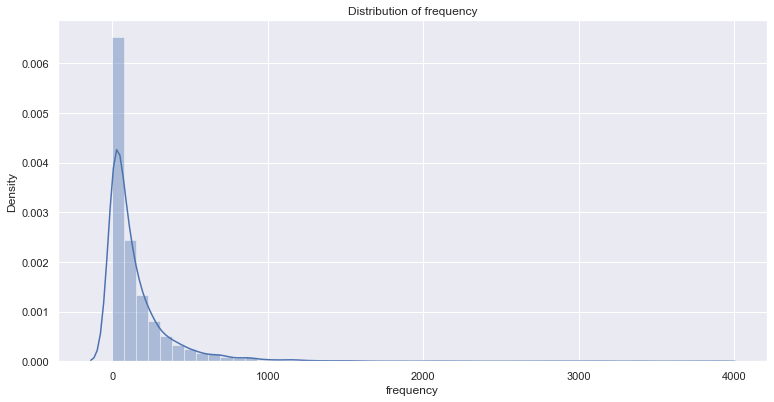

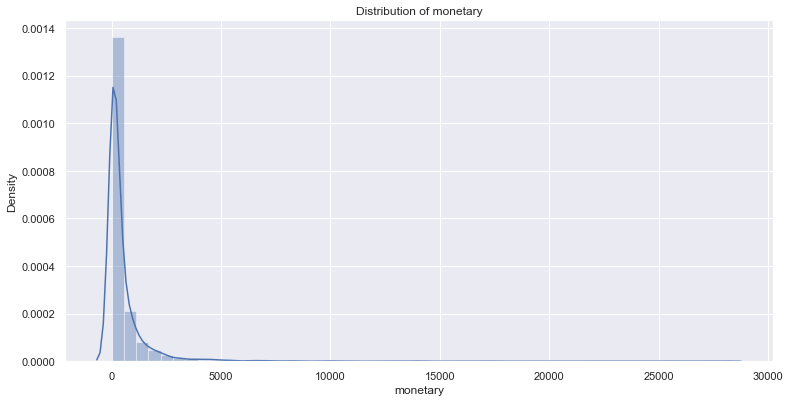

In [90]:
## Function to check skewness of rfm df:
def check_skew(rfm_df, column):
    skew = stats.skew(rfm_df[column])
    skewtest = stats.skewtest(rfm_df[column])
    plt.title('Distribution of ' + column)
    sns.distplot(rfm_df[column])
    sns.set(rc={'figure.figsize':(12.7,6.27)} )
    plt.show()
    return


check_skew(rfm ,'recency')
check_skew(rfm,'frequency')
check_skew(rfm,'monetary')


Conclusion: The recency, frequency and monatery are highly skewed, so we will have to log-scale them in order to get a good segmentation split.

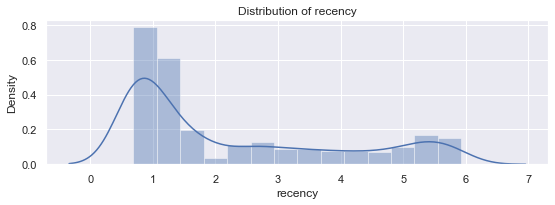

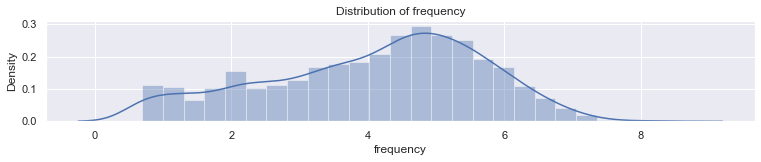

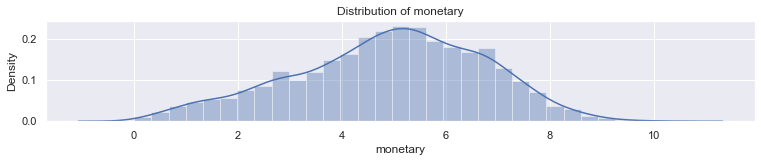

recency    frequency      monetary
count  3374.000000  3374.000000   3374.000000
mean     47.165086   154.273859    506.596151
std      89.824118   235.056359   1142.073889
min       1.000000     1.000000      0.004000
25%       1.000000    18.250000     40.247500
50%       3.000000    77.000000    154.365000
75%      33.000000   196.000000    505.242500
max     374.000000  3865.000000  28091.260000

<Figure size 914.4x451.44 with 0 Axes>

In [92]:
#Removing skewness by log-scaling
rfm_log = rfm.copy()
rfm_log['recency'] = np.log(rfm_log['recency']+1)
rfm_log['frequency'] = np.log(rfm_log['frequency']+1)
rfm_log['monetary'] = np.log(rfm_log['monetary']+1)

plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
check_skew(rfm_log,'recency')
plt.subplot(3, 1, 2)
check_skew(rfm_log,'frequency')
plt.subplot(3, 1, 3)
check_skew(rfm_log,'monetary')
plt.tight_layout()

rfm.describe()

Conclusions:
After log-scaling we are ready for segmentation. We will choose K-means to find good segmentation of the recency, frequency and monetery. 

item   recency  frequency  monetary
0                abc treasure book box -0.663957   0.849967  0.830231
1              abstract circle journal  0.221165   0.132353  0.166021
2          abstract circle pocket book -0.498658  -0.172488 -0.686523
3           abstract circle sketchbook -0.663957   0.174097  0.545104
4               acrylic faceted bangle -0.896933  -0.449334 -0.441004
...                                ...       ...        ...       ...
3369  zinc sweetheart wire letter rack -0.663957   0.271228  0.577301
3370        zinc top door wooden shelf  0.677923  -0.954894  0.352731
3371   zinc willie winkie candle stick -0.896933   0.963465  0.439327
3372       zinc wire kitchen organiser -0.896933  -0.785860  0.097846
3373  zinc wire sweetheart letter tray -0.498658  -0.568576 -0.203288

[3374 rows x 4 columns]

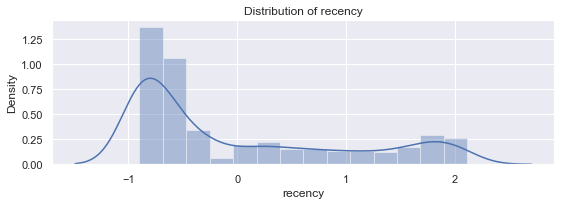

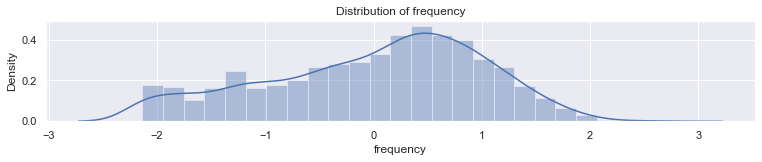

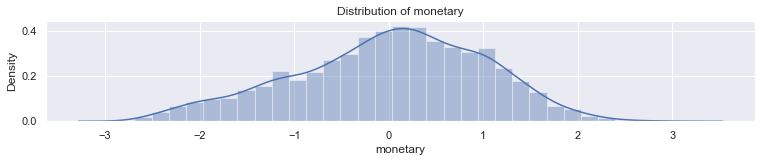

<Figure size 914.4x451.44 with 0 Axes>

In [106]:
# first step for k-means is to fit-transform the 'recency','frequency' and 'monetary' distributions: 

rfm_log_scaled = rfm_log.copy()
scaler = StandardScaler()
trans_array = scaler.fit_transform(rfm_log_scaled[['recency','frequency','monetary']])
rfm_log_scaled[['recency','frequency','monetary']] = trans_array

display(rfm_log_scaled)

plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
check_skew(rfm_log_scaled,'recency')
plt.subplot(3, 1, 2)
check_skew(rfm_log_scaled,'frequency')
plt.subplot(3, 1, 3)
check_skew(rfm_log_scaled,'monetary')
plt.tight_layout()

<b id="-categorize">

## Categorize products based on K-MEANS:

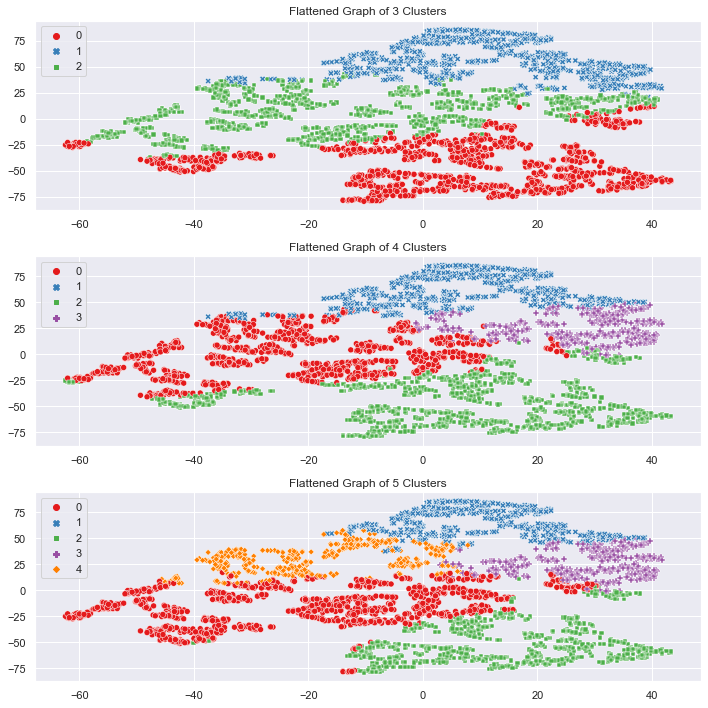

In [105]:
# Let's see how many clusters, 3, 4 or 5, provide good clustering. 

from sklearn.manifold import TSNE

def kmeans(rfm_log_scaled_df, clusters_number):    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(rfm_log_scaled_df[['recency','frequency','monetary']])
    # Extract cluster labels
    cluster_labels = kmeans.labels_
    cluster_center = kmeans.cluster_centers_
    # Create a cluster label column
    rfm_log_scaled_df = rfm_log_scaled_df.assign(Cluster = cluster_labels)
    
    # TSNE is a tool to visualize high-dimensional data
    # We will use TSNE to give us a 2-d visualization of the clusters (which are 3-d)
    
    model = TSNE(random_state=1) # Initialise TSNE
    transformed = model.fit_transform(rfm_log_scaled_df[['recency','frequency','monetary']])
    # Plot TSNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return [cluster_labels, cluster_center]


plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
labels_k3, centers_k3 = kmeans(rfm_log_scaled, 3)
plt.subplot(3, 1, 2)
labels_k4, centers_k4 = kmeans(rfm_log_scaled, 4)
plt.subplot(3, 1, 3)
labels_k5, centers_k5 = kmeans(rfm_log_scaled, 5)
plt.tight_layout()

Conclusion:

The KMEANS of the RFM (log-scaled and fitted) produces 5 well distinguished clusters.

In [94]:
# add the cluster labels to the rfm df:
rfm['cluster'] = labels_k5 + 1
# let's look at the centroids of the clusters in order to charecterize each of them:
display(centers_k5)
print()



array([[-0.62096991,  0.31957735,  0.16170834],
       [ 1.54734331, -1.56634933, -1.4861345 ],
       [-0.73316876,  1.10442494,  1.17390136],
       [ 1.24687082, -0.11261946,  0.07937848],
       [-0.136012  , -0.7714177 , -0.79153267]])

Conclusions:

From the centroids we get that
* 1: m-high, f-high. 
* 2: all bad, 
* 3: r-very low, m-avg or above avg, 
* 4:all pretty low 1-2 (f 2),
* 5: m and f together pretty not bad(always)

<b id="-RFM_scores">

## Charactarize the product clusters based on R, F and M scores

Next we calculate the R, F and M from the quantiles and find the RFM segments.

In [98]:
r_labels=range(2,0, -1) # the R lables are inverted!
rfm['R_score'] = pd.qcut(rfm_log_scaled['recency'], q=2, labels=r_labels,  duplicates = 'drop')
f_labels=range(1,4+1)
rfm['F_score'] = pd.qcut(rfm_log_scaled['frequency'], q=4, labels=f_labels, duplicates = 'drop')
m_labels=range(1,4+1)
rfm['M_score'] = pd.qcut(rfm_log_scaled['monetary'], q=4, labels=m_labels, duplicates = 'drop')

#Let's take a look at the segments we got.
rfm['RFM_segment']=rfm['R_score'].astype(str)+rfm['F_score'].astype(str)+rfm['M_score'].astype(str)

display(rfm['RFM_segment'].unique())
display(rfm['RFM_segment'].nunique())
display(rfm['RFM_segment'].value_counts())

rfm.head()

array(['244', '123', '221', '223', '222', '121', '111', '122', '243',
       '234', '233', '112', '133', '211', '212', '232', '132', '224',
       '143', '144', '124', '242', '231', '134', '113', '114', '131',
       '213', '241', '142'], dtype=object)

30

111    629
244    523
233    258
122    255
243    193
232    167
234    153
222    149
123    135
112    123
133    120
223    107
121    102
132     77
144     59
134     54
221     52
211     50
242     46
124     26
212     25
224     25
143     17
113     10
231      7
114      4
131      3
213      3
241      1
142      1
Name: RFM_segment, dtype: int64

item  recency  frequency  monetary  cluster  \
0        abc treasure book box        2        227    604.55        3   
1      abstract circle journal       13         72    179.97        1   
2  abstract circle pocket book        3         44     37.40        5   
3   abstract circle sketchbook        2         77    359.56        1   
4       acrylic faceted bangle        1         28     59.01        5   

                        group R_score F_score M_score RFM_segment  
0  Potential with Low Recency       2       4       4         244  
1                 Best Seller       1       2       3         123  
2        Avg Up - Prommissing       2       2       1         221  
3                 Best Seller       2       2       3         223  
4        Avg Up - Prommissing       2       2       2         222

In [99]:
# Let's plot the RFM segments for each cluster we found with k-means

grouped_rfm = rfm.groupby(['cluster'])

for name, group in grouped_rfm:
    print('cluster: ', name)
    display(group)
    display(group.RFM_segment.unique())
    print()
    #display(group.RFM_segment.mode()[0])
    print(f'cluster {name} :' , group.RFM_segment.mode()[0] )
    print()
    
    

cluster:  1


item  recency  frequency  monetary  cluster  \
1              abstract circle journal       13         72    179.97        1   
3           abstract circle sketchbook        2         77    359.56        1   
10           adult apron apple delight        4         45    286.29        1   
21        alphabet heart sticker sheet        5         59     60.74        1   
22              alphabet stencil craft        2        186    252.43        1   
...                                ...      ...        ...       ...      ...   
3362         zinc heart wall organiser        2         83    555.87        1   
3367                  zinc star holder        2         47     71.43        1   
3369  zinc sweetheart wire letter rack        2         90    381.30        1   
3371   zinc willie winkie candle stick        1        272    296.47        1   
3372       zinc wire kitchen organiser        1         16    158.87        1   

            group R_score F_score M_score RFM_segment  
1     Best Seller       1       2       3         123  
3     Best Seller       2       2       3         223  
10    Best Seller       1       2       3         123  
21    Best Seller       1       2       2         122  
22    Best Seller       2       3       3         233  
...           ...     ...     ...     ...         ...  
3362  Best Seller       2       3       4         234  
3367  Best Seller       2       2       2         222  
3369  Best Seller       2       3       3         233  
3371  Best Seller       2       4       3         243  
3372  Best Seller       2       1       3         213  

[1086 rows x 10 columns]

array(['123', '223', '122', '233', '133', '232', '132', '234', '224',
       '222', '124', '243', '242', '231', '134', '213', '241', '143',
       '221', '131', '121'], dtype=object)


cluster 1 : 233

cluster:  2


item  recency  frequency  monetary  \
7                   acrylic jewel angel      116          2      0.76   
9               acrylic jewel snowflake       75          7      6.55   
20             allium artificial flower      122          5      8.45   
24                      aluminium heart      162          6     14.94   
27    amber bertie glass bead bag charm      198         10     19.42   
...                                 ...      ...        ...       ...   
3340                 wrap summer design       61          5      2.10   
3341                wrap vintage doiley      123          2      0.84   
3348           yuletide image paper box      330          7     17.85   
3359       zinc heart lattice tray oval      227          7     41.65   
3366              zinc plant pot holder      211          1      2.89   

      cluster         group R_score F_score M_score RFM_segment  
7           2  Unprofitable       1       1       1         111  
9           2  Unprofitable       1       1       1         111  
20          2  Unprofitable       1       1       1         111  
24          2  Unprofitable       1       1       1         111  
27          2  Unprofitable       1       1       1         111  
...       ...           ...     ...     ...     ...         ...  
3340        2  Unprofitable       1       1       1         111  
3341        2  Unprofitable       1       1       1         111  
3348        2  Unprofitable       1       1       1         111  
3359        2  Unprofitable       1       1       2         112  
3366        2  Unprofitable       1       1       1         111  

[547 rows x 10 columns]

array(['111', '121', '112'], dtype=object)


cluster 2 : 111

cluster:  3


item  recency  frequency  monetary  cluster  \
0             abc treasure book box        2        227    604.55        3   
11     advent calendar gingham sack        1        247   1415.17        3   
13                aged glass holder        1        346    283.73        3   
14          airline bag vintage jet        1        522   2556.90        3   
15        airline bag vintage tokyo        1        398   2070.28        3   
...                             ...      ...        ...       ...      ...   
3301  world war glider asstd design        1        536    171.91        3   
3351       zinc folkart sleigh bell        1        465   1123.64        3   
3363     zinc herb garden container       30        205   1382.52        3   
3364               zinc holder star        1        445    442.97        3   
3365    zinc metal heart decoration        2        545    743.77        3   

                           group R_score F_score M_score RFM_segment  
0     Potential with Low Recency       2       4       4         244  
11    Potential with Low Recency       2       4       4         244  
13    Potential with Low Recency       2       4       3         243  
14    Potential with Low Recency       2       4       4         244  
15    Potential with Low Recency       2       4       4         244  
...                          ...     ...     ...     ...         ...  
3301  Potential with Low Recency       2       4       3         243  
3351  Potential with Low Recency       2       4       4         244  
3363  Potential with Low Recency       1       4       4         144  
3364  Potential with Low Recency       2       4       3         243  
3365  Potential with Low Recency       2       4       4         244  

[841 rows x 10 columns]

array(['244', '243', '234', '224', '144', '233', '124', '134', '143'],
      dtype=object)


cluster 3 : 244

cluster:  4


item  recency  frequency  monetary  cluster  \
5               acrylic geometric lamp       13         21    376.92        4   
30    amber chunky glass bead necklace       51          8     95.25        4   
65         antique cream cutlery shelf       18         19    169.98        4   
69      antique glass heart decoration      110         38     94.04        4   
80            antique tea glass etched      197        220    356.20        4   
...                                ...      ...        ...       ...      ...   
3350           zinc finish planter pot      197         57     80.70        4   
3352            zinc garden decoration      132         33     27.29        4   
3354         zinc heart design planter       39         28    278.60        4   
3360   zinc heart lattice wall planter      116         11     69.85        4   
3370        zinc top door wooden shelf       30         12    253.13        4   

                          group R_score F_score M_score RFM_segment  
5     At Risk - Needs Attention       1       2       3         123  
30    At Risk - Needs Attention       1       1       2         112  
65    At Risk - Needs Attention       1       2       3         123  
69    At Risk - Needs Attention       1       2       2         122  
80    At Risk - Needs Attention       1       4       3         143  
...                         ...     ...     ...     ...         ...  
3350  At Risk - Needs Attention       1       2       2         122  
3352  At Risk - Needs Attention       1       2       1         121  
3354  At Risk - Needs Attention       1       2       3         123  
3360  At Risk - Needs Attention       1       1       2         112  
3370  At Risk - Needs Attention       1       1       3         113  

[412 rows x 10 columns]

array(['123', '112', '122', '143', '133', '132', '121', '144', '134',
       '124', '113', '111', '114', '131', '142'], dtype=object)


cluster 4 : 122

cluster:  5


item  recency  frequency  monetary  cluster  \
2          abstract circle pocket book        3         44     37.40        5   
4               acrylic faceted bangle        1         28     59.01        5   
6                acrylic hanging jewel       10         34     18.00        5   
8                 acrylic jewel icicle        5         22     14.25        5   
12            afghan slipper sock pair       13         22     75.40        5   
...                                ...      ...        ...       ...      ...   
3346                   xmas card badge       12          6     14.94        5   
3353           zinc glass candleholder        2         19     55.91        5   
3357        zinc heart lattice charger       15         26    106.26        5   
3368         zinc sweetheart soap dish        1         21     47.03        5   
3373  zinc wire sweetheart letter tray        3         23     91.46        5   

                     group R_score F_score M_score RFM_segment  
2     Avg Up - Prommissing       2       2       1         221  
4     Avg Up - Prommissing       2       2       2         222  
6     Avg Up - Prommissing       1       2       1         121  
8     Avg Up - Prommissing       1       2       1         121  
12    Avg Up - Prommissing       1       2       2         122  
...                    ...     ...     ...     ...         ...  
3346  Avg Up - Prommissing       1       1       1         111  
3353  Avg Up - Prommissing       2       2       2         222  
3357  Avg Up - Prommissing       1       2       2         122  
3368  Avg Up - Prommissing       2       2       2         222  
3373  Avg Up - Prommissing       2       2       2         222  

[488 rows x 10 columns]

array(['221', '222', '121', '122', '112', '111', '211', '123', '212',
       '213', '113'], dtype=object)


cluster 5 : 111



Conclusions:

* cluster 1 forms the "Best Seller" group: (contains 842 rows) : ['244', '243', '234', '224', '144', '233', '124', '134', '143'] 

* cluster 2 is  "Unprofitable": (contains 551 rows): ['111', '121', '112'] 

* cluster 3 the "Potential with Low Recency": (contains 412 rows) :['123', '112', '122', '143', '133', '132', '121', '144', '134','124', '113', '111', '114', '131', '142']

* cluster 4 is "At Risk - Needs Attention": (contains 492 rows) : ['221', '222', '121', '122', '112', '111', '211', '123', '212','213', '113']

* cluster 5 is "Avg Up - Prommissing" (contains 488): 1082 rows: ['123', '223', '122', '233', '133', '232', '132', '234', '224','222', '124', '243', '242', '231', '213', '241', '134', '143','221', '131']



In [103]:
cluster_seg_score_dict = {1: "Best Seller",
                          2: "Unprofitable" ,
                          3: "Potential with Low Recency" ,
                          4: "At Risk - Needs Attention" ,
                          5: "Avg Up - Prommissing"}

display(cluster_seg_score_dict)
rfm['group']=rfm['cluster'].map(cluster_seg_score_dict)
display(rfm.head(7))

{1: 'Best Seller',
 2: 'Unprofitable',
 3: 'Potential with Low Recency',
 4: 'At Risk - Needs Attention',
 5: 'Avg Up - Prommissing'}

item  recency  frequency  monetary  cluster  \
0        abc treasure book box        2        227    604.55        3   
1      abstract circle journal       13         72    179.97        1   
2  abstract circle pocket book        3         44     37.40        5   
3   abstract circle sketchbook        2         77    359.56        1   
4       acrylic faceted bangle        1         28     59.01        5   
5       acrylic geometric lamp       13         21    376.92        4   
6        acrylic hanging jewel       10         34     18.00        5   

                        group R_score F_score M_score RFM_segment  
0  Potential with Low Recency       2       4       4         244  
1                 Best Seller       1       2       3         123  
2        Avg Up - Prommissing       2       2       1         221  
3                 Best Seller       2       2       3         223  
4        Avg Up - Prommissing       2       2       2         222  
5   At Risk - Needs Attention       1       2       3         123  
6        Avg Up - Prommissing       1       2       1         121

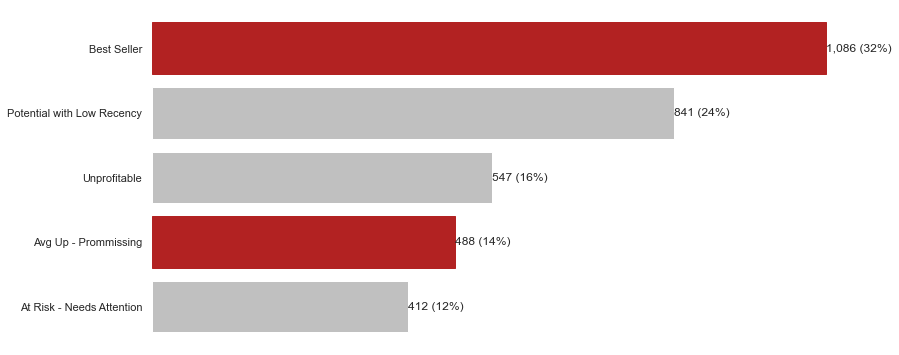

In [104]:
# Next we count the number of customers in each segment
segments_counts = rfm['group'].value_counts().sort_values(ascending=True)

# let's bar-plot each cluster's ratio

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Best Seller','Avg Up - Prommissing']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()


## Conclusion:

There are a lot of products which are not bought frequently or recently and do not generate a good profit  (16% are unprofitable and 14% are at risk). 
However, 32% of the items are best sellers meaning that they are bought frequently, generate great profit and their recency is also high. 
24% of the products are prommising and with an appropriaate strategy will become even more profitable. Their monetary and freqecy are mostly above average!

In [83]:
#df.to_csv(file_name, sep='\t')
rfm.to_csv('rfm_final.csv')

<b id="-conclusions">

## Conclusions and Suggestions

* Product Description Analysis

The number of orders increases from August 2019 until November 2019 which has the best sales considering units, range of product type and revenue. It is suggested to further investigate why November 2018 is the worst month.

The leading product in total sales is cake-stand with paper little birdie coming second and hanging heart t-light holder coming third in sales.

* Basket Analysis

The basket pair with the highest lift (13.3%) is 'rose regency teacup saucer' and 'regency teacup saucer'. Another strong basket pair is: 'bag polkadot' and 'storage bag suki'.
The online store can use a similar basket tool to find the top 10 products that resemble items which are missing or to imply marketing strategy on them. It is suggested to also investigate the products with the lowest support or the ones we consider unpopular for other reasons.

* RFM
The RFM analysis identified almost 1/3 of the products as best sellers meaning that they are bought frequently, generate great profit and their recency is also high. Another 24% of the products are promising and and it is suggested to find a strategy to make them more profitable. 
There are also a lot of products (30%) which are not bought frequently or recently and do not generate a good profit, these perhaps should removed from the store or require a drastic change in marketing or pricing.


In [84]:
#df.to_csv(file_name, sep='\t')
rfm.to_csv('rfm_final.csv')

In [85]:
#writer = pd.ExcelWriter('rfm.xlsx')
#rfm.to_excel(writer,'RFM')
#writer.save()
rfm

item  recency  frequency  monetary  cluster  \
0                abc treasure book box        2        227    604.55        3   
1              abstract circle journal       13         72    179.97        1   
2          abstract circle pocket book        3         44     37.40        5   
3           abstract circle sketchbook        2         77    359.56        1   
4               acrylic faceted bangle        1         28     59.01        5   
...                                ...      ...        ...       ...      ...   
3369  zinc sweetheart wire letter rack        2         90    381.30        1   
3370        zinc top door wooden shelf       30         12    253.13        4   
3371   zinc willie winkie candle stick        1        272    296.47        1   
3372       zinc wire kitchen organiser        1         16    158.87        1   
3373  zinc wire sweetheart letter tray        3         23     91.46        5   

     R_score F_score M_score RFM_segment                       group  
0          2       4       4         244  Potential with Low Recency  
1          1       2       3         123                 Best Seller  
2          2       2       1         221       Avg Up - Prommissing   
3          2       2       3         223                 Best Seller  
4          2       2       2         222       Avg Up - Prommissing   
...      ...     ...     ...         ...                         ...  
3369       2       3       3         233                 Best Seller  
3370       1       1       3         113   At Risk - Needs Attention  
3371       2       4       3         243                 Best Seller  
3372       2       1       3         213                 Best Seller  
3373       2       2       2         222       Avg Up - Prommissing   

[3374 rows x 10 columns]

In [86]:

#iterating over the columns and getting back the optimal number of clusters
for i in rfm[['recency','frequency','monetary_value']].columns:
    print(i, cluster_solution(i))
    needed_cluster_num = cluster_solution(i)
    new_seg_name = i.split()[0].upper()[0] # R, F ,M
    print(needed_cluster_num ,new_seg_name)# 2 R.. 
    #x.split('FRANCHISE')[0]  
    #rfm['R']=pd.qcut(rfm.recency,q=4,labels=r_labels)
    #rfm[new_seg_name] = create_labels_rfm(needed_cluster_num, i)
    n_cluster = needed_cluster_num
    #km =  KMeans(n_clusters = n_clusters, random_state = 1) # setting the number of clusters as 5
    # predict the clusters for observations (the algorithm assigns them a number from 0 to 2)
    kmeans = KMeans(n_clusters=n_cluster).fit(rfm[[i]])
    
    #label = kmeans.fit_predict(rfm[[i]])+1  # applying the algorithm to the data and forming a cluster vector 
    centers = kmeans.cluster_centers_.sum(axis=1)
    labels = kmeans.labels_
    #print('labels', labels)
    print('centers', centers)
    lut = np.arange(n_cluster)  # [0,1,....,n_cluster-1]
    if i == 'recency':
        lut = lut[::-1]   # flip lut  
    print('label_names = ', lut)
    idx = np.argsort(centers)    
    print('sort_labels =', idx)
    dict_lables = dict(zip(lut,idx))
    display('dict_lables - ',dict_lables)
    labels = [dict_lables[k] for k in labels]
    rfm[new_seg_name] = [label+1 for label in labels]
    
    #print('labels_vec =', labels_vec)
    #lut[idx] = np.arange(n_cluster)
    #print(lut[idx])
    #if i == 'recency':
    #    labels_range=range(needed_cluster_num,0, -1)
    #else: 
    #    labels_range=range(1,needed_cluster_num+1)
    #print(kmeans.labels_)
    # store cluster labels in the field of our dataset
    #rfm[new_seg_name] = label
    #rfm[new_seg_name] = pd.cut(rfm[i], bins=needed_cluster_num, labels=labels_range, include_lowest=True)
    #rfm[new_seg_name] = pd.qcut(rfm[i], q=needed_cluster_num, duplicates = 'drop')
    


KeyError: "['monetary_value'] not in index"

In [ ]:
display(df[df['unit_price']==0]) # 974 rows with zero values .. 
display(df[df['unit_price']==0].count()) # 974 rows with zero values .. 
# change user_score to float, so first, treat 'tbd' as missing - nan then..
#df.loc[(df['unit_price'] == 0 ), 'user_score'] = np.nan

#display(df[df['stock_code']=='85123A' & df['quantity']==1]  )#['unit_price'])#.unique()) # 974 rows with zero values .. 
#display(df[df['stock_code']=='85123A']['unit_price'].unique()) # 974 rows with zero values .. [2.55, 2.95, 5.91, 0.  , 3.24, 5.79, 2.4 , 3.2 ]

#df[(df['date'] > '2013-01-01') & (df['date'] < '2013-02-01')]
display(df[(df['stock_code']== '85123A') & (df['quantity'] == 1)]  )
display(df[(df['stock_code']== '85123A') & (df['quantity'] == 1)]['unit_price'])
df.loc[(df['unit_price'] == 0 )  & (df['stock_code']== '85123A') & (df['quantity'] == 1), 'unit_price'] = df[(df['stock_code']== '85123A') & (df['quantity'] == 1)]['unit_price'].mode()[0]


#display(df[(df['stock_code']== '85123A') & (df['quantity'] == 1)]['unit_price'].mode()[0])# 2.95


desc_customer_missing_df = df.loc[(df['customer_id'].isnull()) & (df['description'].isnull())]
#print(f'Duplicated rows ratio: {dup_ratio} %')
print(len(desc_customer_missing_df)/len(df)*100)

display(desc_customer_missing_df)

# drop rows that both model_year and odometer are null. 
#data = data.loc[(data['model_year'].notna()) | (data['odometer'].notna())]
#df = data.loc[(data['model_year'].isnull()) & (data['odometer'].isnull())]
#print(len(df)/len(data)*100)




display(df.loc[(df['unit_price']==0)])  
print()
print('The rows with missing customer_id and description and zero value for unit_price:')
display(df.loc[(df['unit_price']==0) & (df['customer_id'].isnull()) & (df['description'].isnull())])
row_count = len(df.loc[(df['unit_price']==0) & (df['customer_id'].isnull()) & (df['description'].isnull())]) 
print(f'There are {row_count} such rows')
share = round((len(df.loc[(df['unit_price']==0) & (df['customer_id'].isnull()) & (df['description'].isnull())]))/ len(df),3)
print(f'Their share is:', share)
#display(df.loc[(df['unit_price']==0) & (data_df['jp_sales']==0) & (data_df['eu_sales']==0) & (data_df['other_sales']==0)
#when there are no sales -  we have nothing to do with those rows 
#display(data_df.loc[(data_df['na_sales']==0) & (data_df['jp_sales']==0) & (data_df['eu_sales']==0) & (data_df['other_sales']==0) ])
#print()
#drop data where there are no sales at all: 
#data_df = data_df.loc[~((data_df['na_sales']==0) & (data_df['jp_sales']==0) & (data_df['eu_sales']==0) & (data_df['other_sales']==0))]
#display(data_df.stb.missing(style=True))







display(df[data_df['name'].isnull()])

display(df.loc[(df['name'].isnull()) & (data_df['genre'].isnull())]) 
# the the genre and game are missing together. there are only two so, I dropped them. 
data_df.dropna(subset= ['genre', 'name'], inplace=True)
data_df.dropna(subset= ['year_of_release'], inplace=True)
data_df.info()
display(data_df.loc[(data_df.critic_score.isnull()) & (data_df.user_score.isnull()) & (data_df.rating.isnull())])

display(data_df.loc[(data_df.critic_score.isnull()) & (data_df.user_score.notna())])



# change user_score to float, so first, treat 'tbd' as missing - nan then..
data_df.loc[(data_df['user_score'] == 'tbd' ), 'user_score'] = np.nan
print(any(data_df['user_score'] == 'tbd'))
data_df['user_score']= pd.to_numeric(data_df['user_score'], errors='ignore')
#data_df['user_score'] = data_df['user_score'].replace(np.NaN, -5)

#data_df['critic_score'] = data_df['critic_score'].replace(np.NaN, -5)
data_df['critic_score'] = data_df['critic_score'].fillna(0).astype('int')
data_df['critic_score'] = data_df['critic_score'].astype('int')
data_df.loc[(data_df['critic_score'] == 0 ), 'critic_score'] = np.nan

# first filling the years by median of same names from other pltforms then the rest with the median of same platform
# data_df['year_of_release'] = data_df['year_of_release'].fillna(data_df.groupby(['name'])['year_of_release'].transform('median'))
# then the rest ..
# data_df['year_of_release'] = data_df['year_of_release'].fillna(data_df.groupby(['platform'])['year_of_release'].transform('median'))

# changing data types:
# Convert the data to the required types: change data type to int since years are int:
data_df['year_of_release'] = data_df['year_of_release'].astype('int')
# Convert data types to int 
#data_df['critic_score'] = data_df['critic_score'].astype('int')
data_df['user_score'] = 10* data_df['user_score']
data_df['user_score'] = data_df['user_score'].fillna(0).astype('int')
data_df['user_score'] = data_df['user_score'].astype('int')

data_df.loc[(data_df['user_score'] == 0 ), 'user_score'] = np.nan

# data_df['user_score'] = data_df['user_score'].astype('int')

# for those scores that only one out of two is missing: create another column for ratio then then fill null with agv ratio



# in order to take a look at the shares representing how the items are distributed.
# besides the most common(top)

#df.stb.freq(['description'], style = True, cum_cols = False) # cum_cols=false otherwiseit sum up the persentages



# Check zero values in order to find and elimenate errors in analysis:
def check_zeroes(dataframe: pd.core.frame.DataFrame, title: str):
    for column in dataframe.columns:
        num_zero = len(dataframe[dataframe[column]==0])
        num_tot = len(dataframe[column])
        if num_zero>0:
            print(f'There are {num_zero} elements in {column.upper()} column with zero values')
            print(f'Zero values ratio is: {round(num_zero * 100 / num_tot, 2)} %')
        print()
    

# Check zero values in order to find and elimenate errors in analysis:
for column in data_df.columns:
    num_zero = len(data_df[data_df[column]==0])
    num_tot = len(data_df[column])
    if num_zero>0:
        print(f'There are {num_zero} elements in {column.upper()} column with zero values')
        print(f'Zero values ratio is: {round(num_zero * 100 / num_tot, 2)} %')
        print()
#when there are no sales -  we have nothing to do with those rows 
display(data_df.loc[(data_df['na_sales']==0) & (data_df['jp_sales']==0) & (data_df['eu_sales']==0) & (data_df['other_sales']==0) ])
print()
#drop data where there are no sales at all: 
data_df = data_df.loc[~((data_df['na_sales']==0) & (data_df['jp_sales']==0) & (data_df['eu_sales']==0) & (data_df['other_sales']==0))]
display(data_df.stb.missing(style=True))    
    
    

# Find and eliminate errors in the data: check for errors in dates range. make sure events are in period:
def check_date_range(row,colname):
    # period = 14 days. s_reg: 7-12-2020 , e_reg: 21-12-2020, end_test: 1-1-2021
    start_range_date = pd.to_datetime('2020-12-07 00:00:00',format ='%Y-%m-%d %H:%M:%S')
    #end_range_date =pd.to_datetime('2020-12-21 00:00:00',format ='%Y-%m-%d %H:%M:%S')
    end_range_date =pd.to_datetime('2021-01-01 00:00:00',format ='%Y-%m-%d %H:%M:%S')
    event_date = row[colname] #.astype('datetime64[M]')
 
    if event_date < start_range_date or event_date > end_range_date: # check that the time ranges for all data correspond with the project description
        return False
    else:
        return True
    
    
    
    
# checking the data for missing values , their rashio ad other possible errors:
def preprocess_df(dataframe: pd.core.frame.DataFrame, title: str):
    print(f'df: {title}')
    # look at a random sample of the data and study the information given:
    display(dataframe.sample(10))
    print()
    dataframe.info(memory_usage='deep')
    print()
    display(dataframe.describe().T)# include ='all'
    display(dataframe.describe(include ='object').T)
    print()
    # Using sidetable method to look at the missing values per column, how many there are and their share (presentage).
    display(dataframe.stb.missing(style = True))
    print()
    print(f'There are { dataframe.duplicated().sum()} duplicated rows' )
    
    # looking for duplicates:
    dup_no = dataframe.duplicated().sum()
    if dup_no > 0:
        display(dup_no)
        dup_ratio = round(dup_no * 100 / len(dataframe),2)
        print(f'Duplicated rows ratio: {dup_ratio} %')
        display(dataframe[dataframe.duplicated()])
        print()
    # Why do we need to check that? It is important to understand that due to technical thing (a/b- test) one group can cause problems in the product and data. so that's why it's important to check where exactly we have problems. I would also check when the duplicates appeared? Maybe it was a certain date. I had a problem like that

    # if there are dup - something happenrd in the logging process ('gilch')- the  problem in the server
    # what to de with it: -check when and where (what columns, for what users, what groups have dup)it occurs
    # if it happen only begginning of test ,for 2 hours for 20 users we can delete them
    # but here, to all event , for 237, the whole week in three groups. --> go to programmers and engeneers  ask what happened ,is the data is ..was the glich i the database(some disconnection to the database. so the server tried to send same info again) side or the server
    # in that case - no biggie . cause te data is safe -remove the dup. otherwise - the time icorrect or.. -then maybe the data cannot be trusted/ 
    # dup can influence the integrity of the overall data and test
        for i in dataframe[dataframe.duplicated()].columns:
            print(i,':', dataframe[dataframe.duplicated()][i].nunique())

            # Let's figure out maybe all duplicates were created on the same problematic day or maybe two (since 'invoice_date' include both time  and date, the fact that there are 352 uniques doesn't mean that it's impossible that all of them occur on the same date)
            display(dataframe[dataframe.duplicated()]['invoice_datetime'].dt.date.unique())

    # Unfortunately, the duplicates creation date is absolutely random !

    print('\n'*2)
    for colname in dataframe.columns:
        print(f'column: {colname.upper()}')
        
        #print(f'The frequencies of unique values of column {colname.upper()} in descending order are:')
        #display(dataframe.stb.freq([colname], style = True, cum_cols = False))
        print(f'The unique values of column {colname.upper()} are:')
        display(dataframe[colname].unique())
        print(f'The number of NULL values in {colname} are:')
        display(dataframe[colname].isnull().sum())
        #print('share of missing values regarding their column' in order to figure out how significant their absence is for their category or column 
        print(f'Null values ratio: {round(dataframe[colname].isnull().sum() * 100 / len(dataframe[colname]),3)} %')
        if dataframe[colname].isnull().sum() > 0 :
            print(f'The rows with the missing values for {colname} column are the following:')
            display(dataframe[dataframe[colname].isnull()])
        display(dataframe[colname].describe(include ='all').to_frame().T)
        print('\n'*3)
# if (colname not in ['CustomerID', 'InvoiceNo','StockCode', 'Quantity', 'InvoiceDate']):
# print(f'The frequencies of unique values of column {colname.upper()} in descending order are:')
#           display(dataframe.stb.freq([colname], style = True, cum_cols = False))




# function for dealind with prefix and sufix in object names that won't consider establishments with different names as same chain :
# The function makes it possible to distinguish the chain and add a column for the chain name. 
def clean_obj_name(quan):
    name = x
    if '-' in x:
        name = name.replace('-',' ')    
    if '#' in name:
        if name.split('#')[0]!='':
            name = x.split('#')[0]
    if 'FRANCHISE' in name:
        name = x.split('FRANCHISE')[0]   
    return name


#for index, row in neg_quantity_df.iterrows():
#    neg_value = row['quantity']
#    description = row['description']
#    invoice_date = row['invoice_date']
    
#    df_date = grouped_by_dt_df.get_group(invoice_date)
#    identify_refunds(df_date, neg_value, description)
#    identify_refunds(df_date, neg_value, description)
 
# Study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
params_to_study = ['unit_price','quantity']
                
#Plot histograms for each of these parameters. 
#Study how outliers affect the form and readability of the histograms
#for colname in data.columns:
#    if colname in params_to_study:
#       show_histogram(data, colname)

# Determine the upper limits of outliers, 
# remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data. 
def determine_whiskers_limits(dataframe: pd.core.frame.DataFrame, colname:str):
        hist_data = dataframe[colname]
        Q1 = df[colname].quantile(0.25)
        Q3 = df[colname].quantile(0.75)
        IQR = Q3 - Q1
        # Determine the upper and lower limits of whiskers (outliers)
        lower_limit = Q1-1.5*IQR
        upper_limit =  Q3+1.5*IQR
        return lower_limit, upper_limit

    
# Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data.

df['outliers']= False # default value for this new column, meaning there are no outliers so far.

for colname in df.columns:
    if colname in params_to_study:
        print(colname)
        limits = determine_whiskers_limits(df, colname)
        display(limits)
        #col_outliers = df[colname]>limits[1] #& df[colname]<limits[0]# | df[colname]<limits[0]
        col_outliers1 = df[colname]>limits[1]
        col_outliers2 = df[colname]<limits[0]
        #display(col_outliers1)
        print()
        #display(col_outliers2)
        df['outliers'] = df['outliers'].where(~(col_outliers1 | col_outliers2) ,True) # one distorted column is enough to ruin the all row
        
        display(f'{colname} whiskers upper limit :{limits[1]}')
        display(f'{colname} whiskers lower limit :{limits[0]}')
        print()
        #display(col_outliers.sum())
        #display(data['outliers'].sum())
                
#any(data['outliers']) #check for change in the content 
#all(data['outliers'])



# filter the data excessively. remove the outlier and store them in a seperate DataFrame and continue with the filltered data:

filltered_df = df.query('outliers==False')
bad_df = df.query('outliers==True')

# check the share of the lost..
print('filltered data:')
print(len(filltered_df))
print('destorted data:')
print(len(bad_df))
print('Share of lost data:')
print(round(len(bad_df)/len(df)*100,1),'%' )        
    

    
#### conclusions

Dispersion: how far values tend to be from the average.
The easiest way to get a sense of the dispersion is to look at the minimum and maximum values, but if there are outliers, this won't tell you much. 

It's much better to look at the interquartile range:
Q1 is the value such that 25% of the values fall below it, Q2 is the value such that 50% fall below and 50% above, and Q3 is the value such that 25% of data values are above it. 

Quartiles divide a numeric variable into four sections such that the number of data points in each portion is the same.
The interquartile range (IQR) is everything that falls between Q1 and Q3: IQR = Q3 - Q1.
To find the quartiles, put your data in order from smallest to greatest. Then find the median (Q2). 
Now find the median of each of the two halves (with the median included). This will give you Q1 and Q3.

The upper whisker limits in this case are listed above. The outliers were filtered out from the data and stored.




# looking for duplicates:
dup_no = df.duplicated().sum()
if dup_no > 0:
    display(dup_no)
    dup_ratio = round(df.duplicated().sum() * 100 / len(df),2)
    print(f'Duplicated rows ratio: {dup_ratio} %')
    display(df[df.duplicated()])
    print()
    # Why do we need to check that? It is important to understand that due to technical thing (a/b- test) one group can cause problems in the product and data. so that's why it's important to check where exactly we have problems. I would also check when the duplicates appeared? Maybe it was a certain date. I had a problem like that

    # if there are dup - something happenrd in the logging process ('gilch')- the  problem in the server
    # what to de with it: -check when and where (what columns, for what users, what groups have dup)it occurs
    # if it happen only begginning of test ,for 2 hours for 20 users we can delete them
    # but here, to all event , for 237, the whole week in three groups. --> go to programmers and engeneers  ask what happened ,is the data is ..was the glich i the database(some disconnection to the database. so the server tried to send same info again) side or the server
    # in that case - no biggie . cause te data is safe -remove the dup. otherwise - the time icorrect or.. -then maybe the data cannot be trusted/ 
    # dup can influence the integrity of the overall data and test

for i in df[df.duplicated()].columns:
    print(i,':', df[df.duplicated()][i].nunique())

    # Let's figure out maybe all duplicates were created on the same problematic day or maybe two (since 'invoice_date' include both time  and date, the fact that there are 352 uniques doesn't mean that it's impossible that all of them occur on the same date)
    display(df[df.duplicated()]['invoice_date'].dt.date.unique())

    # Unfortunately, the duplicates creation date is absolutely random !


# Drop duplicated rows : (less then 1% )
df = df[~(df.duplicated())].reset_index(drop=True)
#display(df.duplicated().sum())

preprocess_df(df, 'Ecommerce')




if (colname not in ['invoice_date','user_id', 'invoice_datetime','invoice_no', 'stock_code', 'quantity', 'description']):
            print(f'The frequencies of unique values of column {colname.upper()} in descending order are:')
            display(dataframe.stb.freq([colname], style = True, cum_cols = False))

In [ ]:

#purchases_df = df.groupby(['invoice_no', 'category'])['category'].count().reset_index(name ='count')
# to realize for any purchase(transaction) (invoice_no)  we know how many items were bought
# we have 529504 purchases
#display(purchases_df)
#print()
#display()
#purchases_df.describe()
basket_df = (purchases_df
          .groupby(['invoice_no', 'filtered_corpus'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('invoice_no'))
display(basket_df.sample(10)) # 24364 rows × 4182 columns

basket_sets = basket_df.applymap(encode_units)# 19780 
frequent_itemsets = apriori(basket_sets, min_support=0.025, use_colnames=True)
frequent_itemsets.sort_values(by='support',ascending=False)





#Function to plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Orders', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.show()
#plotting
plot_df(df_agg, x=df_agg.Date, y=df_agg.Quantity,title='Orders in 2011')

plot_df(df, x=df.date, y=df_.quantity,title='Orders in 2011')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    









df_cumulate = df.groupby(['invoice_period']).sum()

def plot_df(df, x, y, title="", xlabel='date', ylabel='orders', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    #plt.savefig('graph.png')
    plt.show()

plot_df(df_cumulate, x=df_cumulate.index, y=df_cumulate.quantity, title='Orders Over Time')


def rfm_total(x):
    if x>=8:
        return 'Best_Seller'
    elif x>=7 and x<10:
        return 'profitable'
    elif x>=6 and x<9:
        return 'Potential'
    elif x>=5 and x<8:
        return 'Promising'
    elif x>=4 and x<7:
        return 'Needs_Attention'
    elif x>=3 and x<6:
        return 'At risk'
    else:
        return 'Unprofitable'

    
    
#df[df['description']=='wet?'].index


 # Study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
params_to_study = ['unit_price','quantity']
                
#Plot histograms for each of these parameters. 
#Study how outliers affect the form and readability of the histograms
#for colname in data.columns:
#    if colname in params_to_study:
#       show_histogram(data, colname)

# Determine the upper limits of outliers, 
# remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data. 
def determine_whiskers_limits(dataframe: pd.core.frame.DataFrame, colname:str):
        hist_data = dataframe[colname]
        Q1 = df[colname].quantile(0.25)
        Q3 = df[colname].quantile(0.75)
        IQR = Q3 - Q1
        # Determine the upper and lower limits of whiskers (outliers)
        lower_limit = Q1-1.5*IQR
        upper_limit =  Q3+1.5*IQR
        return lower_limit, upper_limit

    
# Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data.

df['outliers']= False # default value for this new column, meaning there are no outliers so far.

for colname in df.columns:
    if colname in params_to_study:
        print(colname)
        limits = determine_whiskers_limits(df, colname)
        display(limits)
        #col_outliers = df[colname]>limits[1] #& df[colname]<limits[0]# | df[colname]<limits[0]
        col_outliers1 = df[colname]>limits[1]
        col_outliers2 = df[colname]<limits[0]
        #display(col_outliers1)
        print()
        #display(col_outliers2)
        df['outliers'] = df['outliers'].where(~(col_outliers1 | col_outliers2) ,True) # one distorted column is enough to ruin the all row
        
        display(f'{colname} whiskers upper limit :{limits[1]}')
        display(f'{colname} whiskers lower limit :{limits[0]}')
        print()
        #display(col_outliers.sum())
        #display(data['outliers'].sum())
                
#any(data['outliers']) #check for change in the content 
#all(data['outliers'])



# filter the data excessively. remove the outlier and store them in a seperate DataFrame and continue with the filltered data:

filltered_df = df.query('outliers==False')
bad_df = df.query('outliers==True')

# check the share of the lost..
print('filltered data:')
print(len(filltered_df))
print('destorted data:')
print(len(bad_df))
print('Share of lost data:')
print(round(len(bad_df)/len(df)*100,1),'%' )        
    
    
#### conclusions

Dispersion: how far values tend to be from the average.
The easiest way to get a sense of the dispersion is to look at the minimum and maximum values, but if there are outliers, this won't tell you much. 

It's much better to look at the interquartile range:
Q1 is the value such that 25% of the values fall below it, Q2 is the value such that 50% fall below and 50% above, and Q3 is the value such that 25% of data values are above it. 

Quartiles divide a numeric variable into four sections such that the number of data points in each portion is the same.
The interquartile range (IQR) is everything that falls between Q1 and Q3: IQR = Q3 - Q1.
To find the quartiles, put your data in order from smallest to greatest. Then find the median (Q2). 
Now find the median of each of the two halves (with the median included). This will give you Q1 and Q3.

The upper whisker limits in this case are listed above. The outliers were filtered out from the data and stored.


cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_group', 'cohort_period'], inplace=True)

unstacked_order = cohorts['tot_revenue'].unstack(0)
plt.figure(figsize=(20,5))
ax = sns.heatmap(unstacked_order, annot=True,cmap='Blues', fmt='g')
ax.set_ylabel('Cohort Period', fontsize = 15)
ax.set_xlabel('Cohort Group', fontsize = 15)
ax.set_title('Monthly Total Sales Across Cohorts', fontsize = 20)



unstacked_cust = cohorts['total_items'].unstack(0)
plt.figure(figsize=(20,5))
ax = sns.heatmap(unstacked_cust, annot = True, cmap='Blues', fmt = 'g')
ax.set_ylabel('Cohort Period', fontsize = 15)
ax.set_xlabel('Cohort Group', fontsize = 15)
ax.set_title('Monthly Sold Items Across Cohorts', fontsize = 20)





#pos_quantity_df = df.query('quantity > 0')
#stock_code =df.groupby(['stock_code'])
#pos_quantity_df_grouped_by_dt =pos_quantity_df.groupby(['invoice_date', 'description'])

#display(stock_code.get_group('21258'))# 2018-11-29

#ddd=stock_code.get_group('21258')
#display(ddd[ddd['quantity']==5].head(20))



#data['model_year'] = data['model_year'].fillna(data.groupby(['model'])['model_year'].transform('median'))

#data['cylinders'] = data.groupby(['model'])['cylinders'].transform(lambda grp: grp.fillna(grp.mode()[0]))
# transform with unit price- most frequent -whith same stock code: (when quantity is 1- a single product)

#df['unit_price'] = df[df['quantity'] ==1].groupby(['stock_code'])['unit_price'].transform(lambda grp: grp.fillna(grp.mode()[0]))

#data['odometer_clean'] = data['odometer'].fillna(data.groupby(['model_year'])['odometer'].transform('median'))

#credit_data['income_clean'] = credit_data['total_income'].fillna(
 #   credit_data.groupby(['income_type', 'agegrp', 'education'])['total_income'].transform('median'))

# trans_unit_price_zero_by_same_stock_code(df,df['stock_code'] )            
# df['unit_price']= df['unit_price'].apply(trans_unit_price_zero_by_same_stock_code , (df['stock_code'].values([0])))

#display(df[df['unit_price']==0]['stock_code'].nunique()) # 970 rows now

#display(df[df['unit_price'].isnull()])




#def identify_refunds(df_date: pd.core.frame.DataFrame, neg_val:int , desc:str):
#    abs_val = -1* neg_value
#    display(df_date[(df_date['quantity']==abs_val) & (df_date['description']== desc)])

    
#for index, row in neg_quantity_df.iterrows():
#    neg_value = row['quantity']
#    description = row['description']
#    #print(desc)
#    identify_refunds(neg_value, description)

#neg_quantity_df = df.query('quantity < 0')
#pos_quantity_df = df.query('quantity > 0')
#display(neg_quantity_df['invoice_date'].nunique())# 302 dates with  negative..
#display(neg_quantity_df['invoice_date'].unique())
#grouped_by_dt_df =df.groupby(['invoice_date'])
#display(grouped_by_dt_df.get_group('2018-12-01'))# 2018-11-29

#print('unit price is negative  or with high absolute value or with high quantity absolute value :') # 122 
#unit_price_problematic_df = df[(df['unit_price']<0) | (df['unit_price'].abs()>1000) | (df['unit_price'].abs()>1000)] 
#display(unit_price_problematic_df['quantity'].unique())# 3 unique: 1, -1, -2
#print()
#display(unit_price_problematic_df['description'].unique())# 8 unique: 
# ['amazon fee', 'manual', 'bank charges', 'discount', 'postage', 'dotcom postage', 'adjust bad debt', 'cruk commission']
# can drop 



#negative_quantity_price = df.loc[(df['quantity']<=0) & (df['unit_price']<=0)]
#high_abs_values_quantity_price = df.loc[(df['quantity'].abs()>500) & (df['unit_price'].abs()>1000)]
#print('negative_quantity_price:')
#display(negative_quantity_price)
#print()
#display(high_abs_values_quantity_price)
#display(df.loc[(df['quantity']<=0) & (data_df['jp_sales']==0) & (data_df['eu_sales']==0) & (data_df['other_sales']==0) ])
#pos_quantity_df = df.query('quantity > 0')
#neg_quantity_df_grouped_by_dt =neg_quantity_df.groupby(['invoice_date','description'])
#pos_quantity_df_grouped_by_dt =pos_quantity_df.groupby(['invoice_date', 'description'])

#display(neg_quantity_df_grouped_by_dt.get_group('2018-11-29'))# 2018-11-29

#display(pos_quantity_df_grouped_by_dt.get_group('2018-11-29'))


# def trans_unit_price_zero_by_same_stock_code(data: pd.core.frame.DataFrame,code:str): # data: pd.core.frame.DataFrame, 
#    if (data.loc[(df['unit_price'] == 0 )  & (data['stock_code']== code) & (data['quantity'] == 1)]):
#              df.loc[(df['unit_price'] == 0 )  & (df['stock_code']== code) & (df['quantity'] == 1), 'unit_price'] = df[(df['stock_code']== code) & (df['quantity'] == 1)]['unit_price'].mode()[0]

#for df[df['unit_price']==0]:
#    if (data.loc[(df['unit_price'] == 0 )  & (data['stock_code']== code) & (data['quantity'] == 1)]):
#        df.loc[(df['unit_price'] == 0 )  & (df['stock_code']== code) & (df['quantity'] == 1), 'unit_price'] = df[(df['stock_code']== code) & (df['quantity'] == 1)]['unit_price'].mode()[0]

# dropping all rows with null in descriprion. it's only 0.2% and ..:
#df = df[df['description'].notna()]

#df['quantity'] = df['quantity'].abs()
#df['unit_price'] = df['unit_price'].abs()            


#df.dropna(subset= ['unit_price'], inplace=True)

#df['quantity'] = df['quantity'].abs()
#df['unit_price'] = df['unit_price'].abs()


#pos_quantity_df = df.query('quantity > 0')
#stock_code =df.groupby(['stock_code'])
#pos_quantity_df_grouped_by_dt =pos_quantity_df.groupby(['invoice_date', 'description'])

#display(stock_code.get_group('21258'))# 2018-11-29

#ddd=stock_code.get_group('21258')
#display(ddd[ddd['quantity']==5].head(20))

In [ ]:
#from matplotlib import pyplot as plt
#a4_dims = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
#import seaborn as sns
#sns.barplot(x = "tot_order",
  #          y = "invoice_period",
 #           data = df)
#plt.title("Month wise Sale")
#plt.show()

#ecommerce_2018_df = df[df['year']==2018]
#ecommerce_2018_df.columns = ['tot_order':'sales']
#ecommerce_2018_df.rename(columns={'tot_order':'sales'}, inplace=True)


#from matplotlib import pyplot as plt
#a4_dims = (3.7, 1.27)
#fig, ax = plt.subplots(figsize=a4_dims)
#sns.barplot(x = "sales",
#            y = "month",
#            data = ecommerce_2018_df)
#plt.title("Month wise Sale in 2018")
#plt.show()

#ecommerce_2019_df = df[df['year']==2019]
#ecommerce_2018_df.columns = ['tot_order':'sales']
#ecommerce_2019_df.rename(columns={'tot_order':'sales'}, inplace=True)


#from matplotlib import pyplot as plt
#a4_dims = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
#sns.barplot(x = "sales",
#            y = "month",
#            data = ecommerce_2019_df)
#plt.title("Month wise Sale during 2019")
#plt.show()

#from matplotlib import pyplot as plt
#a4_dims = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
#import seaborn as sns
#sns.barplot(x = "tot_order",
  #          y = "invoice_period",
 #           data = df)
#plt.title("Month wise Sale")
#plt.show()

#display(df['invoice_no'].nunique()) #24364

# we will group data by transaction and item to calculate how many transactions had our item of interest.

#purchases_df = df.groupby(['invoice_no', 'stock_code'])['stock_code'].count().reset_index(name ='count')
#display(purchases_df)


# category_PK




#calculating support for Coffee
sup_cofee=purchases[purchases.item=='Coffee']['transaction'].nunique()/purchases['transaction'].nunique()
sup_cofee

#calculating confidence for  Coffee + Toast
conf_coffee_toast=needed_transactions['transaction'].nunique()/purchases[purchases.item=='Coffee']['transaction'].nunique()
conf_coffee_toast

Lift(Coffe+Toast) = (Confidence (Coffe+Toast))/(Support (Cofee))

#print('negative unit price:')
#display(df.query('unit_price < 0'))# zero ..-)
# 2 weird (dup, one after the other): delete 'adjust bad debt' desc is not a product . -11062.06	
#print('negative unit price description:')
#display(df.query('unit_price < 0').describe().T)
#print('zero unit price:')
#zero_unit_price_df = df.query('unit_price == 0')
#display(zero_unit_price_df)# 9762 zero price when neg quantity. min quantity: -9600.0 max quantity: 12540.0
#print('zero unit price description:')
#display(df.query('unit_price ==0').describe().T)# now 415 rows zero unit price
#print()
#display(list(df.query('unit_price == 0')['description'].unique()))
# display(neg_quantity_df.shape[0])


dff = df.copy()
dff.set_index('item', inplace = True)
dff.head()

dff['cohort_group'] = dff.groupby(level=0)['invoice_date'].min().apply(lambda x: x.strftime('%Y-%m'))
dff.head()

dff = df.copy() #invoice_no	stock_code	description	quantity	invoice_datetime	unit_price	customer_id	invoice_year_month	invoice_period	invoice_date	is_refund	revenue	color	size	cluster_km	category_keywords	category
dff.set_index('item', inplace = True)

dff['cohort_group']= dff.groupby(level=0)['invoice_datetime'].min().apply(lambda x: x.strftime('%Y-%m'))

grouped = dff.groupby(['cohort_group','invoice_date'])
dff.reset_index(inplace = True)
dff.head()

grouped = dff.groupby(['cohort_group','invoice_period'])
cohorts = grouped.agg({'item': pd.Series.nunique,
                       #'description': pd.Series.nunique,
                      'quantity': np.sum,
                      'tot_order': np.sum})
cohorts.rename(columns ={'item':'total_items',
                         'tot_order':'tot_revenue',
                        'quantity':'total_units'}, inplace = True)
cohorts.head()

def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts


#from matplotlib import pyplot as plt
#a4_dims = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
#import seaborn as sns
#sns.barplot(x = "tot_order",
  #          y = "invoice_period",
 #           data = df)
#plt.title("Month wise Sale")
#plt.show()

#ecommerce_2018_df = df[df['year']==2018]
#ecommerce_2018_df.columns = ['tot_order':'sales']
#ecommerce_2018_df.rename(columns={'tot_order':'sales'}, inplace=True)


#from matplotlib import pyplot as plt
#a4_dims = (3.7, 1.27)
#fig, ax = plt.subplots(figsize=a4_dims)
#sns.barplot(x = "sales",
#            y = "month",
#            data = ecommerce_2018_df)
#plt.title("Month wise Sale in 2018")
#plt.show()

#ecommerce_2019_df = df[df['year']==2019]
#ecommerce_2018_df.columns = ['tot_order':'sales']
#ecommerce_2019_df.rename(columns={'tot_order':'sales'}, inplace=True)


#from matplotlib import pyplot as plt
#a4_dims = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
#sns.barplot(x = "sales",
#            y = "month",
#            data = ecommerce_2019_df)
#plt.title("Month wise Sale during 2019")
#plt.show()

#from matplotlib import pyplot as plt
#a4_dims = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
#import seaborn as sns
#sns.barplot(x = "tot_order",
  #          y = "invoice_period",
 #           data = df)
#plt.title("Month wise Sale")
#plt.show()



Classical RFM: QUANTILES
- after calculating the values of RFM we need to assign the group rfm params. 
split roduct to quaantile. each product needed to be  assigned to quantile group depanding on rfm values( instead of values asign segment to every column. so that each product has 3 num..  

But : since data is not distributed normally (check each colum for that) therefore splitting the data into quantile can be misleading. 

splitting into quantiles works perfectly when the data is distributed more or less normally. 
otherwise, the problem is that a lot( skewd ) segment quantile will be on one side - no diff in terms of values in quantiles.

how many quantile? use DA to determine how many segments, quantile we need.. ? when related to money -always skewed to the right (for example if min=1=25% = 50%=75% , max = 149 in F)

classical approach - QUANTILES:
 in order to split RFM values into Quantile we use qcut() func in python. (limilar to range syntax. params: 'start', 'stop'(not included) and 'step'-  can be negative value too. direction of step..
 First, we'll creat the labels - from 1 to 5 (four numbers: 1,2,3,4)-the names of the segments.
 then, creating columns R , F, M by taking frequency column cuuting into 4 equal parts, q=4 (define no of quantiles) the labels are 1,2,..4 . so unique values are 1-->2-->3-->4 (1<2<3<4) 
 F - 4 best 1-worse-(lowes frequency) and same way  also for M. (less than.. not math definition) in Recency - do if other way around : why? cause in R highest(4) is yhe worst (purchase long time ago)and so - switch labels . range: 4 to 0 (not included) then same logic(lowest to highest) so 4 still best! but 4 here is the "lowest in terms of recency. lowest amount- just made purchase) 
 (without labels  - gives the range -to what group it belong) so 4 always bestttttttttt(not always low or high)


now, we have "111" -all rfm value are low. "444" all high. - it is just a string combination of 3 columns (maybe some can 
here we get 16 segment. 

what do we do with those segments? there are diff approach:
apprach 1: each segment will be group:champion, loyal.. 
approac..

how do we know  how many segment (when dist not normal) - not using QUANTILES:
by kmean we figure out how many segment we need :clustering (kmean)teq 
cluster-union of values that are  close to each other by set of characteristic

calculating the no of clusters based on 2  rules: 2 ways to do so:
1. Silhouette Score
2. elbow teq







# purchases_df = df.groupby(['invoice_no', 'description'])['description'].count().reset_index(name ='count')
# display(purchases_df)

# apprioro or other basket analysis: metrics lift,support, confidence. 

# support - popularity of item overall(all transaction with the item devided by num of dransaction there are. how often it was  boght )
# #calculating support for Coffee
# sup_cofee=purchases[purchases.item=='Coffee']['transaction'].nunique()/purchases['transaction'].nunique()
# 47% -the share, item appears in 47% of baskets.
# As we see, the support for Coffee is almost 48%, that means, that coffee will appear in 48% of our transactions 
# support caculat the top product we need to  pay attention to. (may be do so to each category..)

# lift: in what ratio the purchases are boght together more likely than seperately. 
# meaning:if i buy y how purchase of it uplift the prop of buying of x
# That means that the ratio of increase of Coffe sales if Toast is bought is  0.1, which means that it doesn't matter to "Coffee" whether it's sold alone or together with toast
# Lift(Coffe+Toast) = (Confidence (Coffe+Toast))/(Support (Cofee))
#  conf_coffee_toast/sup_cofee. if low it wouldnt uplift coffee
# That means that the ratio of increase of Coffe sales if Toast is bought is  0.1, which means that it doesn't matter to "Coffee" whether it's sold alone or together with toast

# confidence.
# #take only needed transactions, that had both coffee and Toast AT least
# needed_transactions=purchases[purchases.item.isin(['Coffee','Toast'])].\
#                    groupby(['transaction'])['item'].count().reset_index().query('item>1')
# That means, that there is a 5% chance, that if a customer bought Coffee, he'd buy a Toast
# #calculating confidence for Toast+Coffee
#conf_toast_coffee=needed_transactions['transaction'].nunique()/purchases[purchases.item=='Toast']['transaction'].nunique()
# conf_toast_coffee
# Wow! there is a 70% chance, that if a customer bought a Toast, he'd also buy Coffee
# conffidence in order to recommend. way to upsale !!

<b id="-Analysis"> 

## Product Description Analysis:
   * Create a corpus out of product descriptions.
   * Clean up the corpus and removed stopwords etc, Eliminate grammatical variations via stemming
   * Create a Term-Frequency Inverse Document Frequency (TF-IDF) matrix.
   * Clculate from the TF-IDF the corpus distance matrix comparing the relative similarity.
   * Use the distance matrix to build a dendrogram from which the number of clusters will be detrmined 
   * Using Kmean to form the clusters
   * Study the term frequencies for each cluster.
   * Based on the term frequencies, identify product category keywords for each cluster.
   * Categorizing the products in the store differently in order to get result that enable better understanding of product range. 
   * Calculating monthly revenue and monthly cumulating revenue to detect the trend
   * Splitting products by category and finding: 1. the leading categories regarding the number of items in each category 2. the leading categories in sales
   * Finding the top ten selling products
   * Examining Refunds: by total amount and by frequency)
       

<b id="-corpus">    
### Create a corpus out of product descriptions.
       
<b id="-clean">
### Clean up the corpus and removed stopwords etc, Eliminate grammatical variations via stemming

<b id="-tfidf">    
### Create a Term-Frequency Inverse Document Frequency (TF-IDF) matrix
       
<b id="-distance">
### Clculate from the TF-IDF the corpus distance matrix comparing the relative similarity.
    
<b id="-dendrogram">
### Use the distance matrix to build a dendrogram from which the number of clusters will be detrmined
    
<b id="-kmean">
### Using Kmean to form the clusters

<b id="-terms_freq">
### Study the term frequencies for each cluster:

<b id="-keywords">    
### Based on the term frequencies, identify product category keywords for each cluster:
       
<b id="-categorization">
### Categorizing the products in the store differently in order to get result that enable better understanding of product: range. 
    
<b id="-revenue">
### Calculating monthly revenue and monthly cumulating revenue to detect the trend: 

<b id="-split">    
### Splitting products by category and finding: 1. the leading categories regarding the number of items in each category 2. the leading categories in sales
       
<b id="-selling">
### Finding the top ten selling products:
    
<b id="-refunds">
### * Examining Refunds: by total amount and by frequency:    
  
    
    
    
2. [Product Description Analysis:](#-Analysis)
   * [Create a corpus out of product descriptions.](#-corpus)
   * [Clean up the corpus and removed stopwords etc,Eliminate grammatical variations via stemming](#-clean)
   * [Create a Term-Frequency Inverse Document Frequency (TF-IDF) matrix.](#-tfidf)
   * [Clculate from the TF-IDF the corpus distance matrix comparing the relative similarity.](#-distance)
   * [Use the distance matrix to build a dendrogram from which the number of clusters will be detrmined](#-dendrogram)
   * [Using Kmean to form the clusters](#-kmeans)
   * [Study the term frequencies for each cluster.](#-terms_freq)
   * [Based on the term frequencies, identify product category keywords for each cluster.](#-keywords)
   * [Categorizing the products in the store differently in order to get result that enable better understanding of product range.](#-categorization)
   * [Calculating monthly revenue and monthly cumulating revenue to detect the trend](#-revenue) 
   * [Splitting products by category and finding: 1. the leading categories regarding the number of items in each category 2. the leading categories in sales](#-split)
   * [Finding the top ten selling products](#-selling)
   * [Examining Refunds: by total amount and by frequency](#-refunds)

    
   

<b id="-recommender"> 
## Product Bundle(Basket) Analysis and Recommender System:
   * Create a basket for each transaction (invoice) and study the popullarity for products to appear (in any transaction/invoice) as well as for their different combinations by using Apriori Algorithm
   * Calculate other Basket metrics using association_rule method in order to realize how to expand sails in the basket level by recommending additional products
   * Studying product similarities in order to realize how to mantain and increase profits (in a basket level) by recommanding sustitutional/interchangable products    
   * 
   * 
   * 
   * 
  

<b id="-basket">    
### Create a basket for each transaction (invoice) and study the popullarity for products to appear (in any transaction/invoice) as well as for their different combinations by using Apriori Algorithm
    
<b id="-additional">
### Calculate other Basket metrics using association_rule method in order to realize how to expand sails in the basket level by recommending additional products
    
<b id="-interchangable">
### Studying product similarities in order to realize how to mantain and increase profits (in a basket level) by recommanding sustitutional/interchangable products
    

<b id="-market"> 4.
## Product Market Values Analysis:
   * Calculate product recency-frequency-monetary (RFM Metrics)
   * Study product RFM distributions (in order to determine the segmentation split)
   * Categorize products based on RFM frame
   * 
   * 
   * 
   * 
  

<b id="-rfm">    
### Calculate product recency-frequency-monetary (RFM Metrics)
    
<b id="-split">
### Study product RFM distributions (in order to determine the segmentation split
    
<b id="-categorize">
### Categorize products based on RFM frame
    
<b id="-">    
### 
       
<b id="-">
### 
    
<b id="">
### 
    
<b id="-">
### 

<b id="-">
### 

<b id="-">    
### 
       
<b id="-">
### 
    
<b id="-">
### 
<b id="-conclusions"> 5.
## Conclusions and Suggestions: